In [1]:
pwd

'/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/python'

In [2]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/proseplots' 

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/proseplots


In [3]:
import nbformat
#prose_img_path = 'figures/proseplots/'

In [4]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [5]:
# preface - imports

In [6]:
import numpy as np
import pandas as pd
import math
from itertools import combinations
from itertools import product
from sklearn.datasets import load_iris 

# matplotlib specific
import matplotlib as mpl
import matplotlib.pyplot as plt

# For Special Topics
# import ternary # requires install
# from ternary.helpers import simplex_iterator
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy import stats

# Made redundant in the text
from matplotlib import colors
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.dates as mdates
from matplotlib import font_manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
savepy('imports')

In [8]:
# versions

In [9]:
!python --version

Python 3.9.13


In [10]:
mpl.__version__

'3.7.1'

In [11]:
# OOP

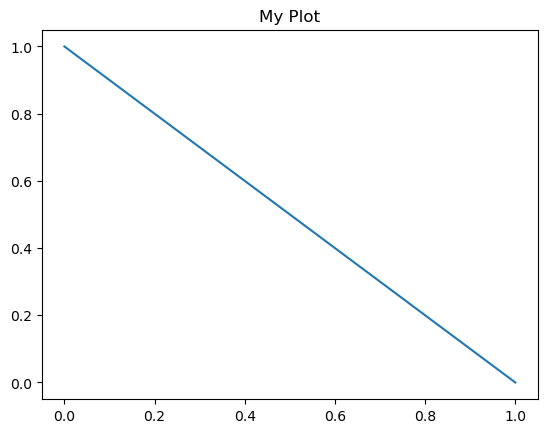

In [12]:
import matplotlib.pyplot as plt
x = 1,0
y = 0,1

plt.plot(x,y)
plt.title("My Plot")
#truncate
plt.savefig('matlab-plot.pdf')
plt.show()

In [13]:
savepy('matlab-plot')

In [14]:
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)
ax.set_title("My Plot")
#truncate
plt.tight_layout()
plt.savefig('oop-plot.pdf')
plt.close()

In [15]:
savepy('oop-plot')

In [16]:
fig = plt.figure(figsize = (2,3),
                 facecolor = 'gray') 
ax = plt.axes(facecolor = 'lightyellow')
#truncate
plt.tight_layout()
plt.savefig('figparams.pdf')
plt.close()

In [17]:
savepy('figparams')

Text(0.5, 1.0, 'My Chart')
My Chart
My Wholesome Chart


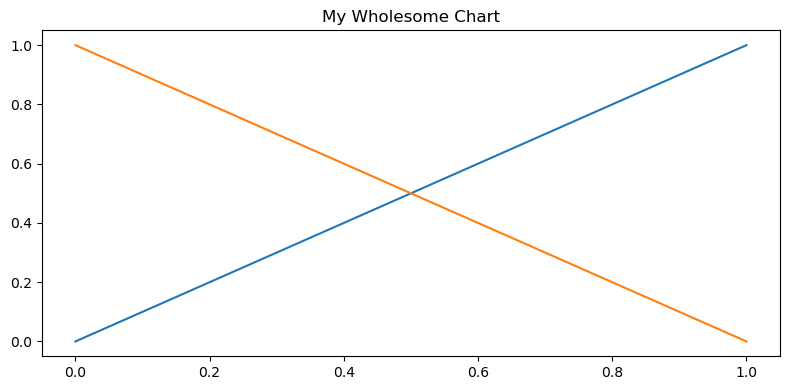

In [18]:
x = np.linspace(0,1,2)   
fig, ax = plt.figure(figsize = (8,4)), plt.axes()
ax.plot(x, x)
ax.plot(x, 1 - x)
ax.set_title("My Chart")
print(ax.title)
print(ax.get_title())  # Similar to above line
ax.set_title("My Wholesome Chart")
print(ax.get_title())  # long      
#truncate
plt.tight_layout()
plt.savefig('gettersetter.pdf')
plt.show()

In [19]:
savepy('gettersetter')

In [20]:
# OOP - mixing the interfaces

Text(0.5, 1.0, 'My Chart')
Text(0.5, 1.0, 'My Wholesome Chart')


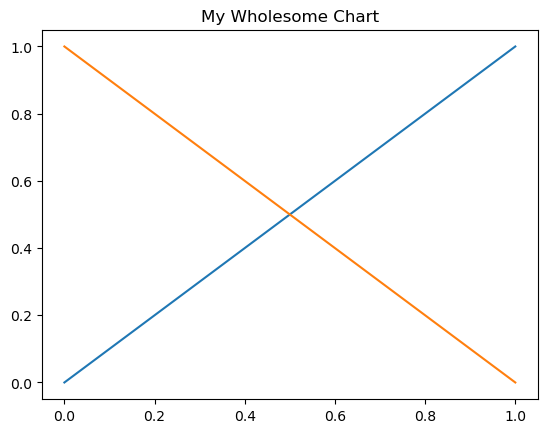

In [21]:
x = np.linspace(0,1,2) 
plt.plot(x,x)
plt.title("My Chart")

ax = plt.gca()
print(ax.title)

ax.plot(x, 1 - x)
ax.set_title('My Wholesome Chart')
print(ax.title)
#truncate
fig = plt.gcf()
fig.savefig('chart.pdf') # same as plt.savefig

In [22]:
savepy('chart')

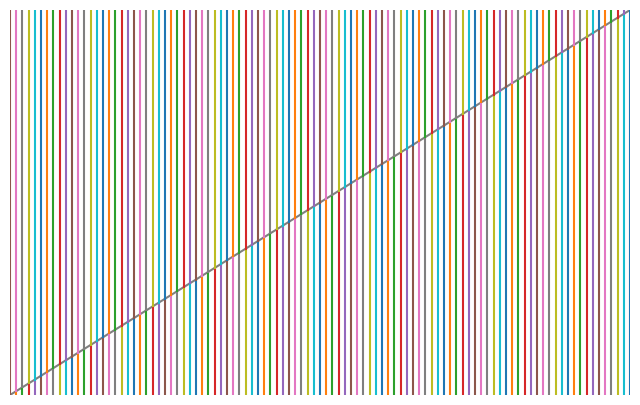

In [23]:
# OOP Start 
fig, ax = plt.figure(figsize = (8,5)), plt.axes()

x = np.linspace(0,100,2)
ax.plot(x, x, color = 'gray')

ax.set_xlim([0,100])
ax.set_ylim([0,100])

# Back to pyplot functions
for i in range(101):
    plt.axvline(i,0, i / 100, color = 'C' + str(i))
    plt.axvline(i, i/100, 1, color = 'C' + str(i+5))
    
plt.axis('off')
plt.savefig('colorful.pdf')
#truncate
fig.savefig('chart.pdf')

In [24]:
savepy('colorful')

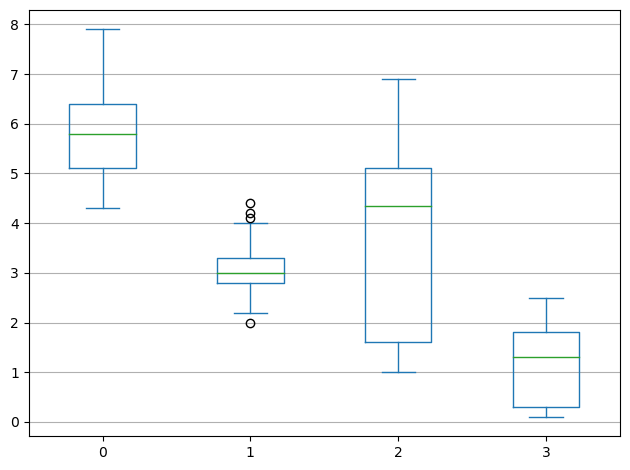

In [25]:
from sklearn.datasets import load_iris 
data = load_iris()['data']
df = pd.DataFrame(data)

fig, ax = plt.figure(), plt.axes()

df.plot.box(ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.tight_layout()
plt.savefig('irisbox.pdf')

In [26]:
savepy('irisbox')

In [27]:
# Chapter 2 Ticks

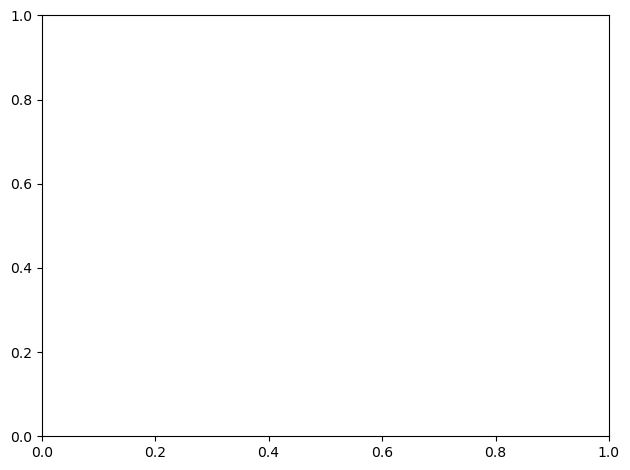

In [28]:
fig, ax = plt.figure(), plt.axes()
#truncate
plt.tight_layout()
plt.savefig("empty.pdf")

In [29]:
savepy('empty')

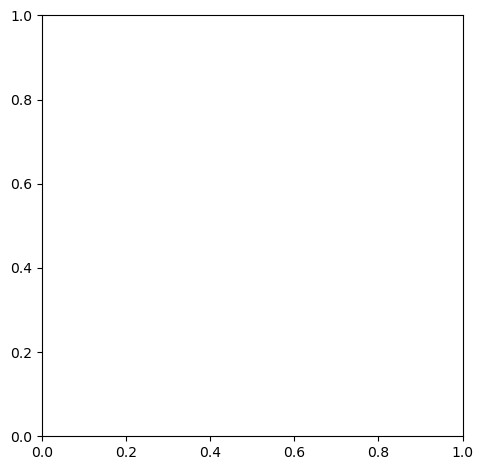

In [30]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect('equal')
#truncate
plt.tight_layout()
plt.savefig("empty-square.pdf")

In [31]:
savepy('empty-square')

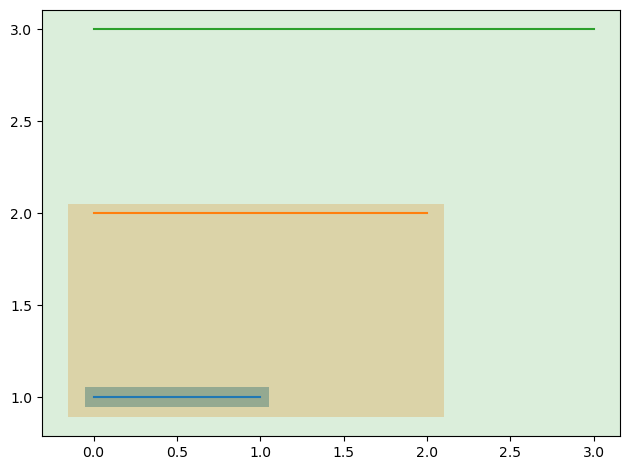

In [32]:
fig, ax = plt.figure(), plt.axes()

for i in range(1,4):
    ax.plot([0,i], [i,i])
    bottom_y, top_y = ax.get_ylim()
    left_x, right_x = ax.get_xlim()
    ax.fill_between(x = [left_x,right_x], 
                    y1 = bottom_y, 
                    y2 = top_y, 
                    alpha = 0.5/i)

# Prevent limits from automatically stretching further
# The last fill_between would stretch limits again
ax.set_ylim(bottom_y, top_y)
ax.set_xlim(left_x, right_x)
#truncate
plt.tight_layout()
plt.savefig("expanding-lims.pdf")

In [33]:
savepy('expanding-lims')

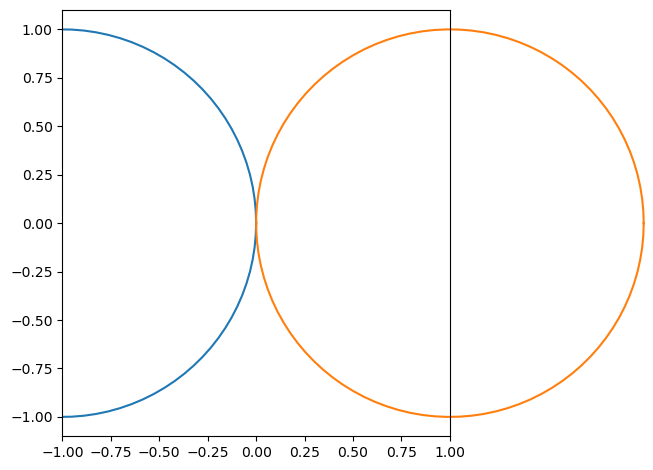

In [34]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)

# Create a unit circle
u = np.linspace(0,2*np.pi,100)
x = np.cos(u)
y = np.sin(u)

# Default, clip_on = True
ax.plot(x-1, y)

# Unclipped, extends beyond the axes
ax.plot(x+1, y, clip_on = False)

ax.set_xlim(-1,1)
#truncate
plt.tight_layout()
plt.savefig("circle-clip.pdf")

In [35]:
savepy('circle-clip')

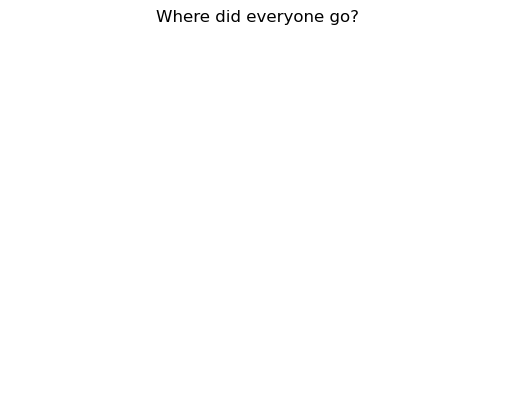

In [36]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Where did everyone go?")
ax.axis('off')
#truncate
plt.savefig("no-axis.pdf")
plt.show()

In [37]:
savepy("no-axis")

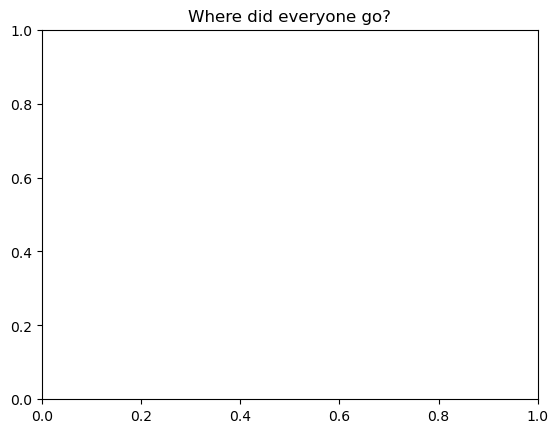

In [38]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Where did everyone go?")
#truncate
plt.savefig("yes-axis.pdf")
plt.show()

In [39]:
savepy('yes-axis')

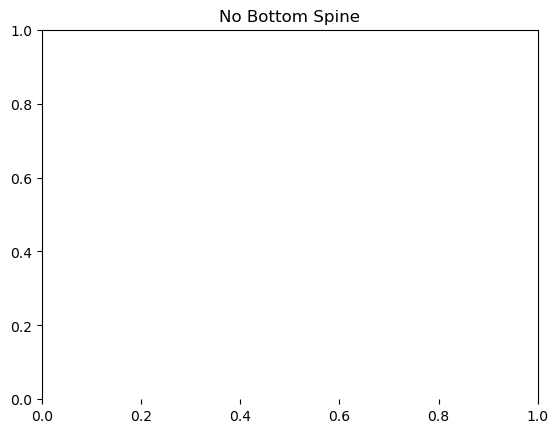

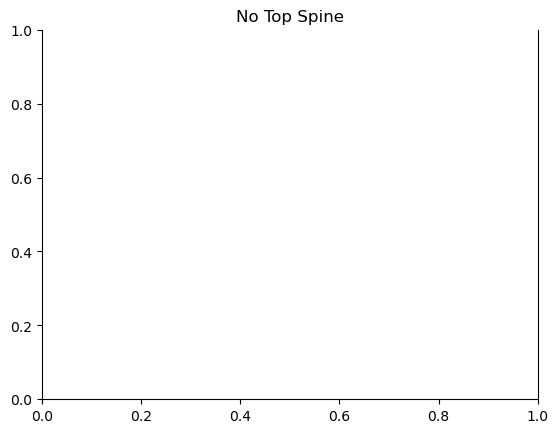

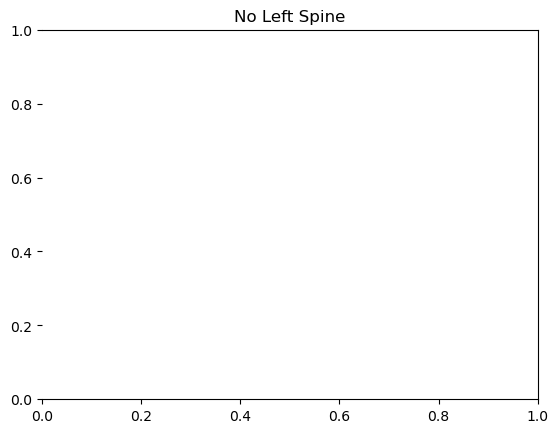

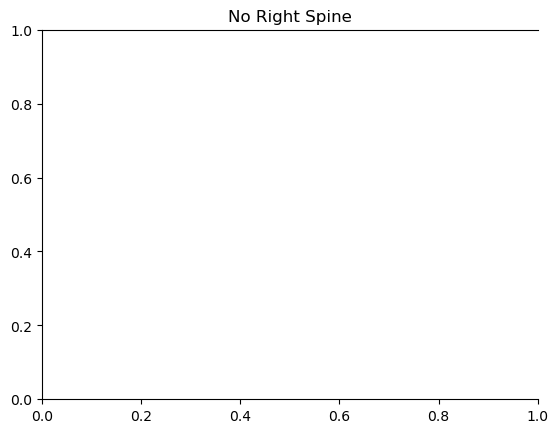

In [40]:
for spine in 'bottom', 'top', 'left', 'right':
    fig, ax = plt.figure(), plt.axes()
    ax.set_title("No " + spine.title() + " Spine")
    ax.spines[spine].set_visible(False)
    plt.show()
    #truncate
    fig.savefig(f"spine-vis-{spine}.pdf")

In [41]:
savepy('spine-vis')

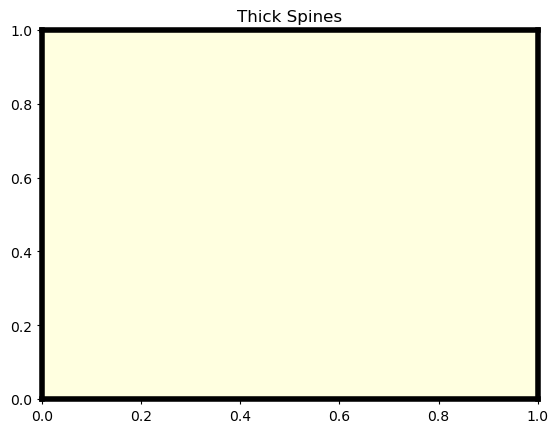

In [42]:
fig, ax = plt.figure(), plt.axes(facecolor = 'lightyellow')
ax.set_title("Thick Spines")
for spine in 'bottom', 'top', 'left', 'right':
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(4)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#truncate
plt.savefig("thick-spines.pdf")
plt.show()

In [43]:
savepy('thick-spines')

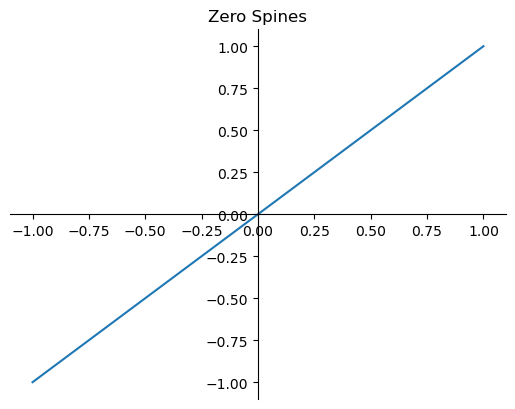

In [44]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Zero Spines")
ax.plot([-1,1], [-1,1]) 
for spine in 'top',  'right':
    ax.spines[spine].set_visible(False)
for spine in 'bottom',  'left':
    ax.spines[spine].set_position('zero')
#truncate
plt.savefig("zero-spines.pdf")
plt.show()

In [45]:
savepy("zero-spines")

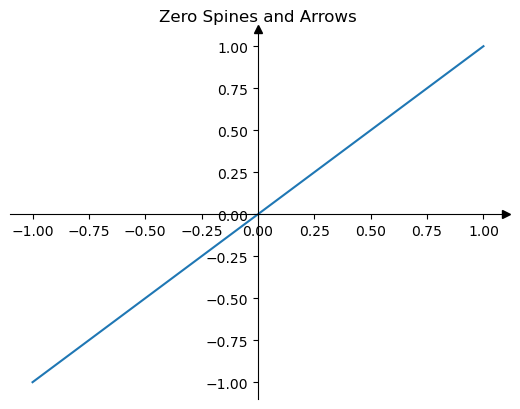

In [46]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Zero Spines and Arrows")
ax.plot([-1,1], [-1,1])
for spine in 'top',  'right':
    ax.spines[spine].set_visible(False)
for spine in 'bottom',  'left':
    ax.spines[spine].set_position('zero')

# get current limits
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# Add arrows
ax.plot(xlims[1], 0, ">k", clip_on = False)
ax.plot(0, ylims[1], "^k", clip_on = False)

# revert limits to before the arrows
ax.set_xlim(xlims)
ax.set_ylim(ylims)
#truncate
plt.savefig("arrow-axes.pdf")

In [47]:
savepy('arrow-axes')

In [48]:
# ticks

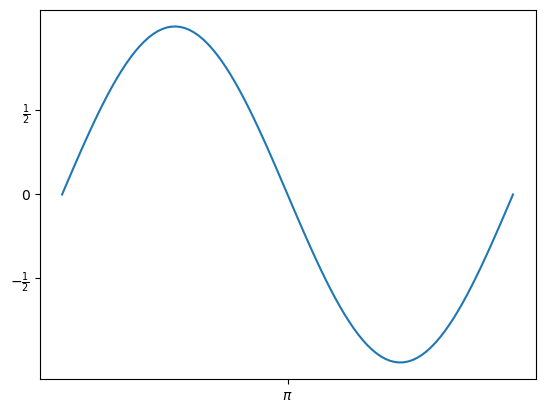

In [49]:
x = np.linspace(0, np.pi * 2, 100)

fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))

# Y axis
ax.set_yticks( [-0.5, 0, 0.5] )
ax.set_yticklabels( [r"$-\frac{1}{2}$", 0,  r"$\frac{1}{2}$"] )

# X axis
ax.xaxis.set_ticks([np.pi])
ax.xaxis.set_ticklabels([r"$\pi$"])
#truncate
plt.savefig("ticks1.pdf")

In [50]:
savepy('ticks1')

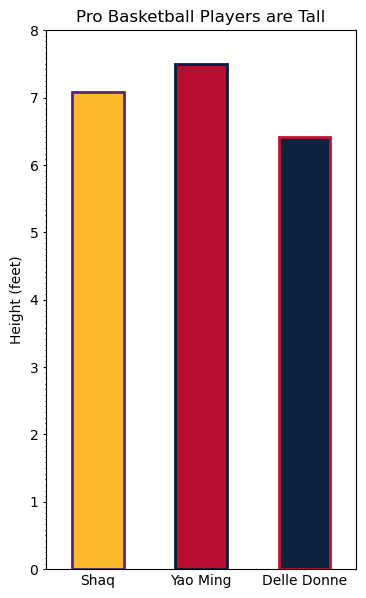

In [51]:
heights = pd.Series( {'Shaq': 7 + (1/12),
                     'Yao Ming': 7.5,
                     'Delle Donne': 6 + (5/12)})

fig, ax = plt.figure(figsize = (4,7)), plt.axes()

heights.plot.bar(ax = ax, 
        color = ['#FDB927', '#BA0C2F', '#0C2340'], 
        edgecolor = ['#552583', '#041E42', '#C8102E'],
        linewidth = 2)
# https://teamcolorcodes.com/ 
# LA Lakers and Houston Rockets and DC Mystics

# Get rid of ticks on x-axis, rotate text
ax.xaxis.set_tick_params(length = 0, which = 'major', 
                         rotation = 0)

ylim0, ylim1 = 0,8
ax.set_ylim([ylim0, ylim1])

ax.set_yticks(range(ylim0, ylim1+1))
#ax.yaxis.set_major_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(1/12))
ax.yaxis.set_tick_params(length = 1, which = 'minor')
ax.yaxis.set_tick_params(length = 2, which = 'major')

ax.set_ylabel("Height (feet)")
ax.set_title("Pro Basketball Players are Tall")
#truncate
plt.savefig("tall-ballers.pdf")

In [52]:
savepy('tall-ballers')

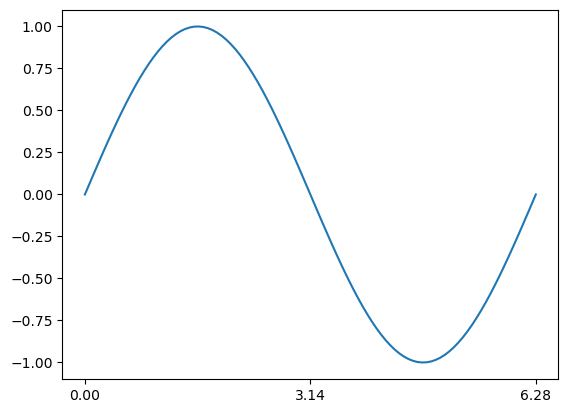

In [53]:
x = np.linspace(0, np.pi * 2, 100)

fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))

ax.xaxis.set_major_locator(MultipleLocator(np.pi))
#truncate
plt.savefig("mult-locator.pdf")
plt.show()

In [54]:
savepy('mult-locator')

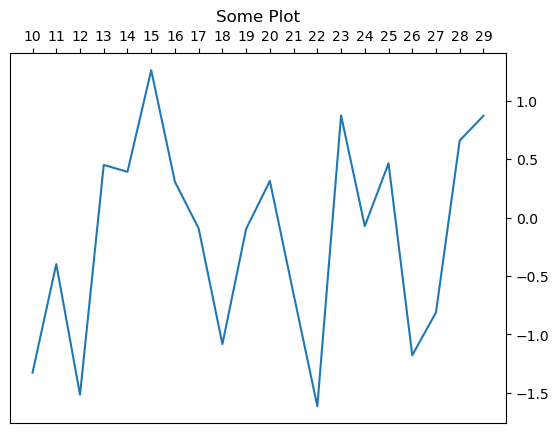

In [55]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(10, 30, 1)
y = np.random.normal(size = len(x))
ax.plot(x,y)

# set what ticks are shown
ax.xaxis.set_ticks(x)

# move the ticks
ax.yaxis.tick_right()
ax.xaxis.set_ticks_position('top')

ax.set_title("Some Plot")
#truncate
plt.savefig('tick-right.pdf')
plt.show()

In [56]:
savepy('tick-right')

In [57]:
## ticks - grids

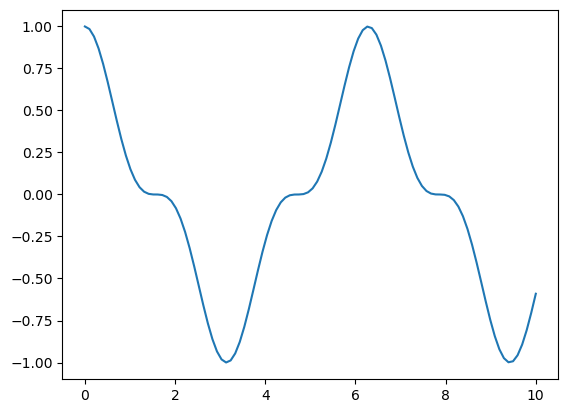

In [58]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,10,100)
ax.plot(x, np.cos(x)**3)
ax.grid(False)
#truncate
plt.savefig("grid-false.pdf")

In [59]:
savepy('grid-false')

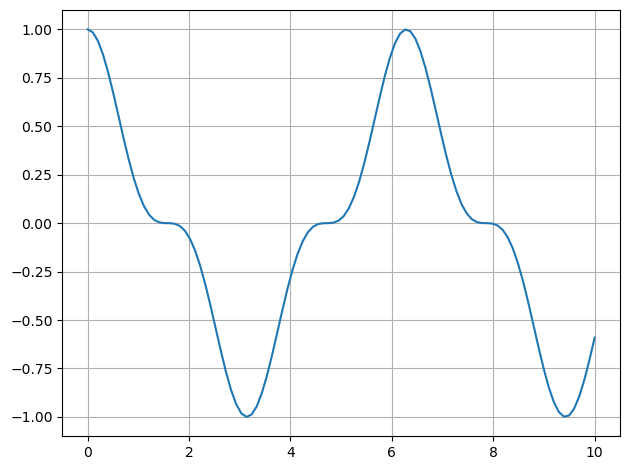

In [60]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,10,100)
ax.plot(x, np.cos(x)**3)
ax.grid(True)
#truncate
plt.tight_layout()
plt.savefig("grid-true.pdf")
plt.show()

In [61]:
savepy('grid-true')

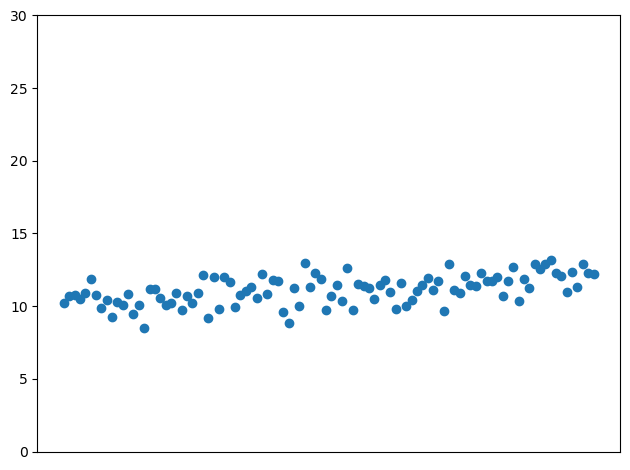

In [62]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0, 10, 100)
y = 10 + .2*x
points = y + np.random.normal(size = len(x))
ax.scatter(x,points)

ax.set_ylim(0,30)
ax.set_xticks([])
#truncate
plt.tight_layout()
plt.savefig("y-grid-false.pdf")
plt.show()

In [63]:
savepy('y-grid-false')

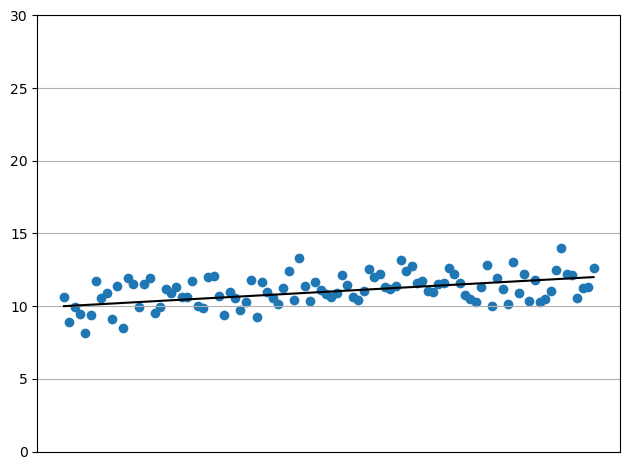

In [64]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,10, 100)
y = 10 + .2*x
points = y + np.random.normal(size = len(x))
ax.scatter(x,points)

ax.set_ylim(0,30)
ax.set_xticks([])

# Add grid and line of best fit
ax.yaxis.grid(True)
ax.plot(x, y, color = 'black')
#truncate
plt.tight_layout()
plt.savefig("y-grid-true.pdf")
plt.show()

In [65]:
savepy('y-grid-true')

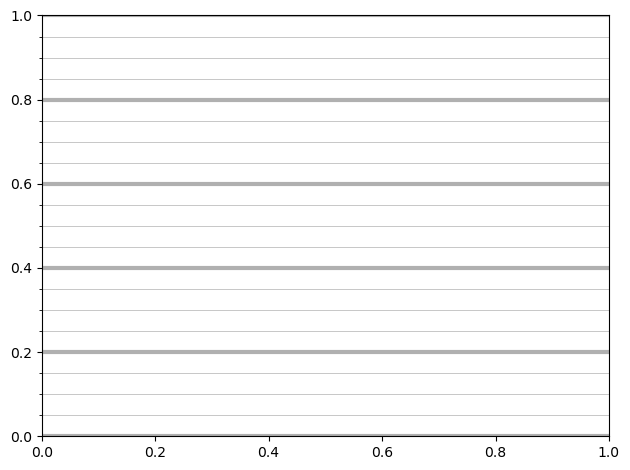

In [66]:
fig, ax = plt.figure(), plt.axes()
ax.xaxis.grid(False)
ax.yaxis.grid(True, linewidth = 3)
ax.yaxis.grid(True, which = 'minor', linewidth = 0.5) 
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
#truncate
plt.tight_layout()
plt.savefig("grids-auto.pdf")
plt.show()

In [67]:
savepy('grids-auto')

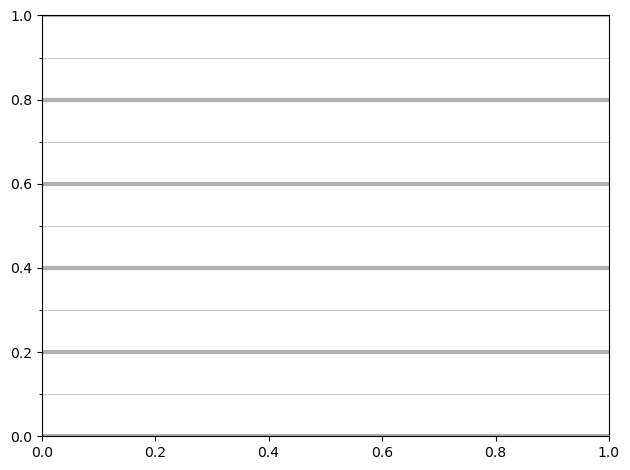

In [68]:
fig, ax = plt.figure(), plt.axes()
ax.xaxis.grid(False)
ax.yaxis.grid(True, linewidth = 3)
ax.yaxis.grid(True, which = 'minor', linewidth = 0.5) 
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#truncate
plt.tight_layout()
plt.savefig("grids-multi.pdf")
plt.show()

In [69]:
savepy('grids-multi')

In [70]:
# ELEMENTS 

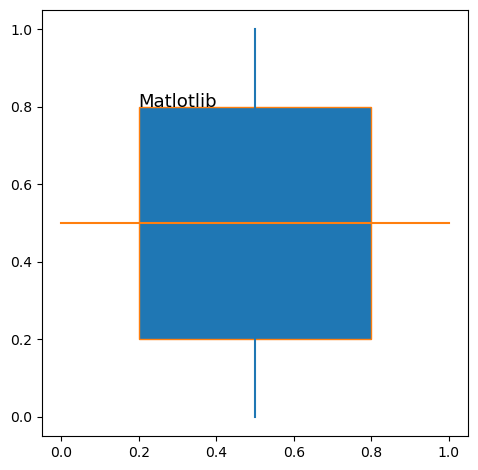

In [71]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)

# Patches
rect = plt.Rectangle(xy = (0.2, 0.2),
                     width = 0.6,
                     height = .6,
                     facecolor = 'C0',
                     edgecolor = 'C1')
patch = ax.add_artist(rect)

# Lines
x, y = [0.5, 0.5], [0, 1]
line, = ax.plot(x, y) 
lines = ax.plot(y,x)

# Text
text = ax.text(0.2, 0.8, 'Matlotlib', size = 13)
#truncate
plt.tight_layout()
plt.savefig("artists.pdf")
plt.show()

In [72]:
savepy("artists")

3
2
2
1
1


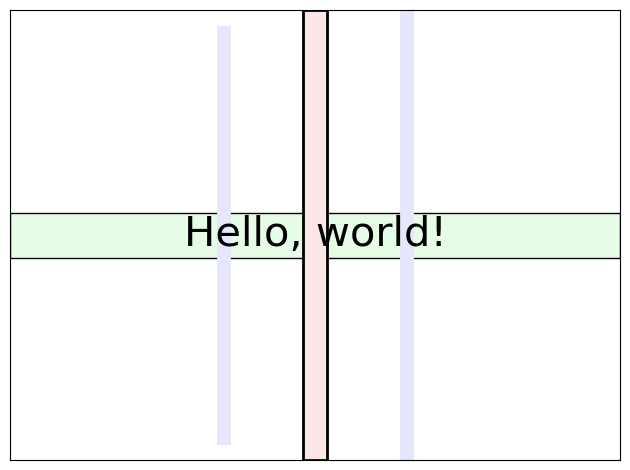

In [73]:
fig, ax = plt.figure(), plt.axes()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_yticks([])

# make colors
green = (.9, .99, .9)
blue = (.9, .9, .99)
red = (.99, .9, .9)

# Text with default zorder of 3
text = ax.text(0.5, 0.5, "Hello, world!",
               size = 30,
               ha = 'center',
               va = 'center')

# Lines with default zorder of 2
line1 = ax.axvline(0.65,
                   linewidth = 10,
                   color = blue)
line2 = ax.plot([0.35, 0.35], [.05, .95],
                linewidth = 10, 
                color = blue)

# Patches with default zorder of 1
patch1 = ax.fill_between([0,1], 0.45, .55,
                         facecolor = green,
                         edgecolor = 'black')
patch2 = ax.fill_between([.48,.52], 0, 1,
                         facecolor = red, 
                         edgecolor = 'black',
                         linewidth = 2)

# Check zorders
print(text.get_zorder())
print(line1.get_zorder())
print(line2[0].get_zorder())
print(patch1.get_zorder())
print(patch2.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("default-z.pdf")
plt.show()

In [74]:
savepy('default-z')

0
0
1
0.75
0.5
0.25


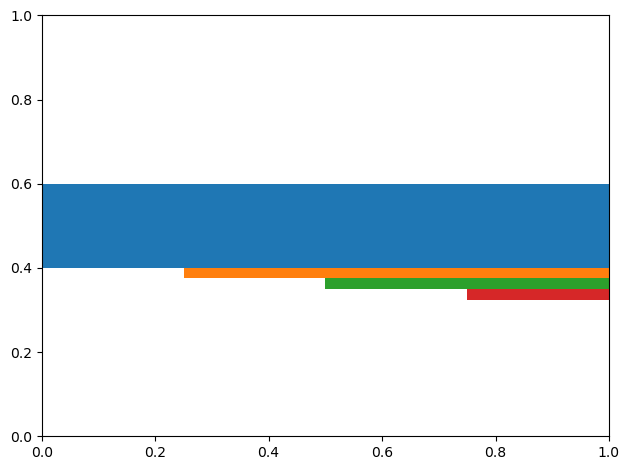

In [75]:
fig, ax = plt.figure(), plt.axes()

print(fig.get_zorder())
print(ax.get_zorder())

for i in [0, 0.25, .5, .75]:
    
    t = ax.fill_between([i, 1], 0.4 - i/10, .6 - i/20,
                        zorder = 1 - i)
    print(t.get_zorder())

ax.set_xlim(0,1)
ax.set_ylim(0,1)
#truncate
plt.tight_layout()
plt.savefig("reverse-z.pdf")
plt.show()

In [76]:
savepy('reverse-z')

0


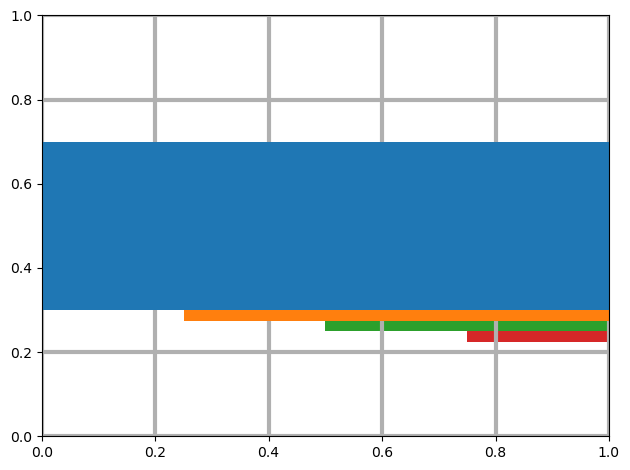

In [77]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
print(ax.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("default-axes.pdf")
plt.show()

In [78]:
savepy('default-axes')

0


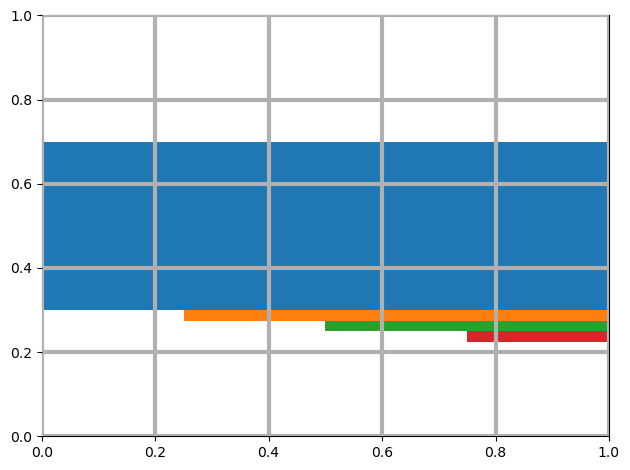

In [79]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_axisbelow(False)
print(ax.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("front-axes.pdf")
plt.show()

In [80]:
savepy('front-axes')

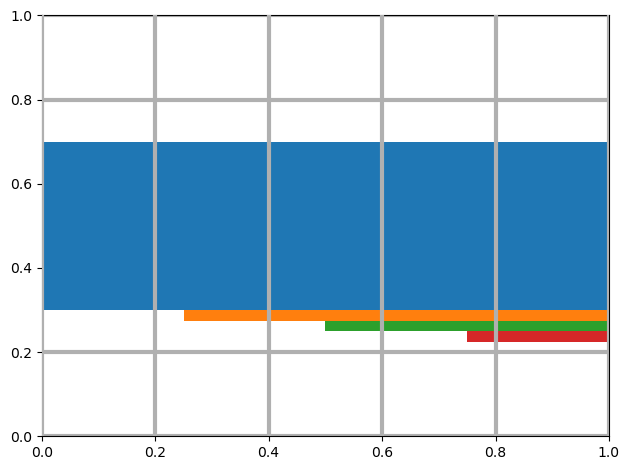

In [81]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.xaxis.set_zorder(3)
#truncate
plt.tight_layout()
plt.savefig("front-xaxis.pdf")
plt.show()

In [82]:
savepy("front-xaxis")


In [83]:
## coordinate systems

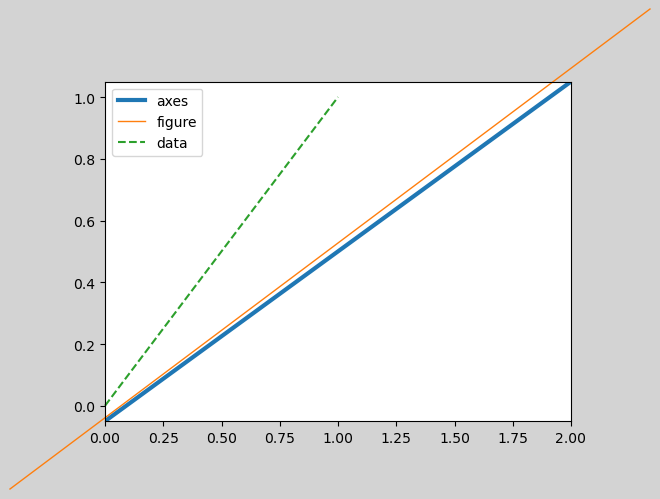

In [84]:
fig, ax = plt.figure(facecolor = 'lightgray'), plt.axes()

ax.plot([0, 1], [0, 1],
        linewidth = 3,
        transform = ax.transAxes,
        label = 'axes')

ax.plot([0, 1], [0, 1],
        color = 'C1',
        linewidth = 1,
        transform = fig.transFigure,
        clip_on = False,
        label = 'figure')

ax.plot([0, 1], [0, 1],
        color = 'C2',
        linestyle = 'dashed',
        clip_on = False,
        label = 'data')

ax.set_xlim(0,2)
ax.legend()
#truncate
plt.tight_layout()
plt.savefig('coords.pdf', facecolor = 'lightgray')
plt.show()

In [85]:
savepy('coords')

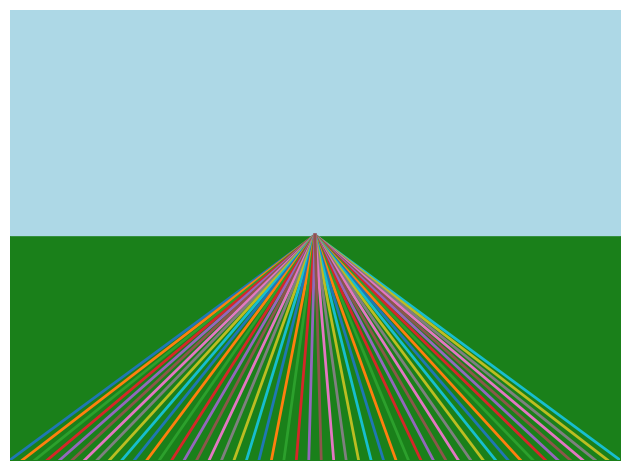

In [86]:
fig, ax = plt.figure(), plt.axes()
ax.axis('off')
# lines to horizon
for i in np.linspace(0,1,50):
    ax.plot([i,.5], [0.00, .5], 
            transform = ax.transAxes,
            linewidth = 2,
            zorder = 10-(i-0.5)**2)

# fill bottom half
green = (.1, .5, .1)
ax.fill_between(x = (0,1),
                y1 = 0,
                y2 = 0.5,
                transform = ax.transAxes,
                color = green)

# fill top half
ax.fill_between(x = (0,1),
                y1 = 0.5,
                y2 = 1,
                transform = ax.transAxes,
                color = 'lightblue')
#truncate
plt.tight_layout()
plt.savefig("coord-horizon.pdf")
plt.show()

In [87]:
savepy('coord-horizon')

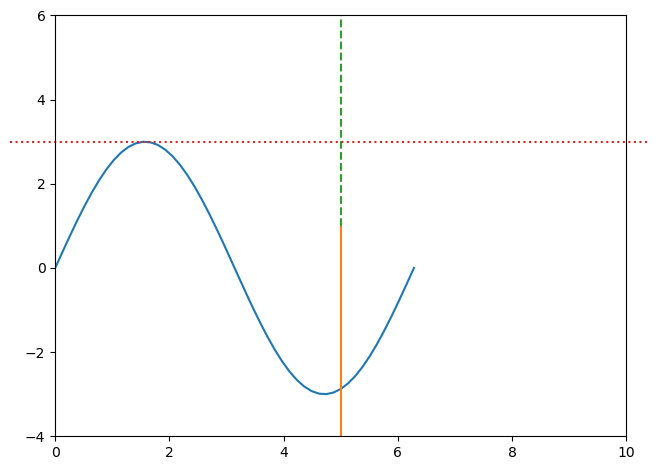

In [88]:
# Plot setup 
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0, 2*np.pi)
sin, = ax.plot(x, 3*np.sin(x))
ax.set_xlim(0, 10)
ax.set_ylim(-4, 6)
fig.tight_layout()

# Vertical line with axes coordinates
middle = [0.5, 0.5]
bottom_half = [0, 0.5]
ax.plot(middle, bottom_half,
        transform = ax.transAxes)

# Continue vertical line with data coordinates
mid_in_display = ax.transAxes.transform([0.5, 0.5])
mid_in_data = ax.transData.inverted().transform(mid_in_display)
top_mid_in_display = ax.transAxes.transform([0.5, 1])
top_mid_in_data = ax.transData.inverted()\
                        .transform(top_mid_in_display)
x = mid_in_data[0], top_mid_in_data[0]
y = mid_in_data[1], top_mid_in_data[1]
ax.plot(x, y, linestyle = 'dashed')

# Horizontal lines in figure coordinates
top_wave_display = ax.transData.transform([np.pi/2, 3])
top_wave_figure = fig.transFigure.inverted()\
                         .transform(top_wave_display)

y = top_wave_figure[1],  top_wave_figure[1]
ax.plot([0,1], y,
        transform = fig.transFigure,
        linestyle = 'dotted',
        clip_on = False)
#truncate
plt.savefig("coord-trans.pdf")
plt.show()

In [89]:
savepy('coord-trans')

In [90]:
## window extents

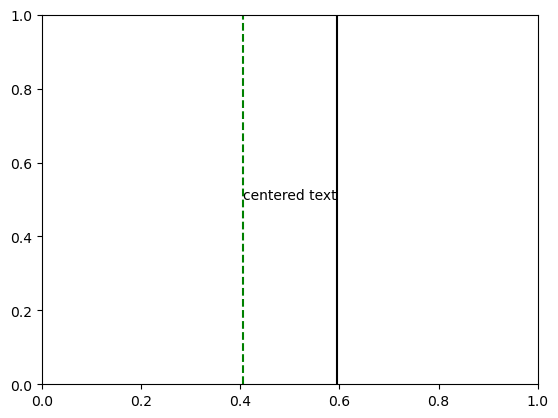

In [91]:
fig, ax = plt.figure(), plt.axes()

center_text = ax.text(0.5, 0.5,
                      'centered text',
                      ha = 'center')

fig.canvas.draw()
box = center_text.get_window_extent()
data_box = ax.transData.inverted().transform(box)

# left limit
ax.axvline(data_box[0][0],
           color = 'green',
           linestyle = 'dashed')

# right limit
ax.axvline(data_box[1][0],
           color = 'black')
#truncate
plt.savefig("window-extent.pdf")

In [92]:
savepy('window-extent')

0.099814 0.10364222119815658


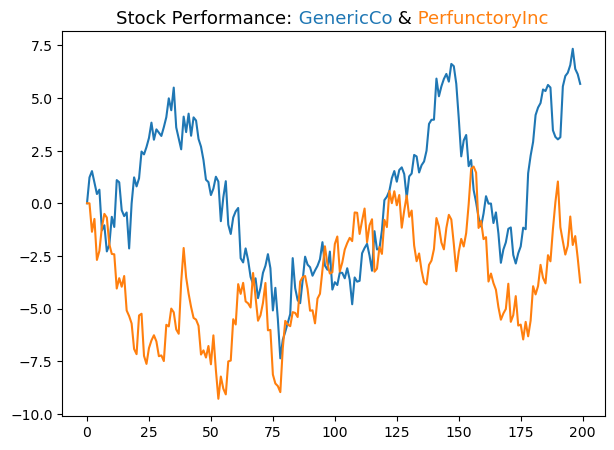

In [93]:
x_len = 200
x = range(0, x_len)

# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate([start,np.random.normal(0, 1, x_len-1)]).cumsum()
y2 = np.concatenate([start,np.random.normal(0, 1, x_len-1)]).cumsum()

# Start plot
fig, ax = plt.figure(figsize = (7,5)), plt.axes()
fig.canvas.draw()

# Color arguments added to make defaults explicit
ax.plot(x, y1, color = 'C0')
ax.plot(x, y2, color = 'C1')

# Tuned by hand
shift = .099814 # Where titling starts on x-axis
y_level = 1.02
transform = ax.transAxes # use axes coords

t1 = ax.text(shift, y_level, 'Stock Performance:', 
        transform = transform, 
        ha = 'left',
        fontsize = 13,
        color = 'black')

# Get where text ended
x_pos = t1.get_window_extent()\
       .transformed(transform.inverted()).x1

t2 = ax.text(x_pos, y_level, ' GenericCo', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'C0')

x_pos = t2.get_window_extent()\
       .transformed(transform.inverted()).x1

t3 = ax.text(x_pos, y_level, ' &', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'black')

x_pos = t3.get_window_extent()\
       .transformed(transform.inverted()).x1

t4 = ax.text(x_pos, y_level, ' PerfunctoryInc', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'C1')

x_pos = t4.get_window_extent()\
       .transformed(transform.inverted()).x1

# compare distances to the edge
# equal means perfect centering
print(shift, 1-x_pos) 
#truncate
plt.savefig("multicolor-title.pdf")

In [94]:
savepy("multicolor-title")

In [95]:
# TITLES chapter

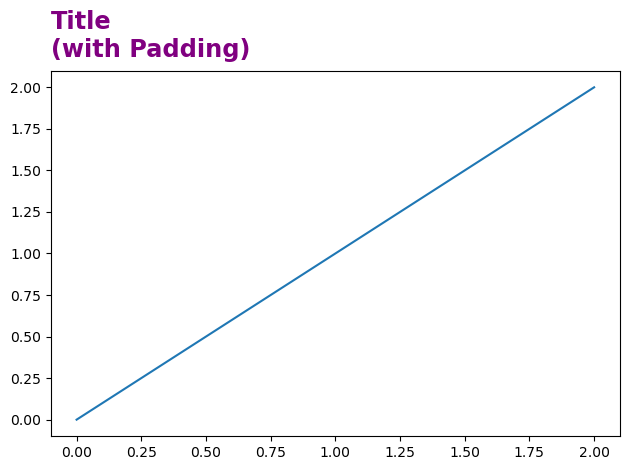

In [96]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()

ax.plot(x,x)
ax.set_title("Title\n(with Padding)", 
            fontsize = 'xx-large', 
            weight = 'bold',
            color = 'purple',
            loc = 'left',
            pad = 10) 
#truncate
plt.tight_layout()
plt.savefig("title-pad.pdf")
plt.show()

In [97]:
savepy("title-pad")

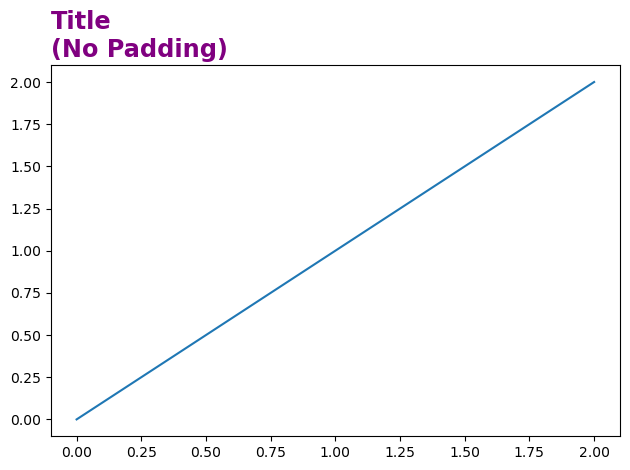

In [98]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()

ax.plot(x,x)
title = ax.set_title("Title\n(No Padding)", 
            fontsize = 'xx-large', 
            weight = 'bold',
            color = 'purple',
            loc = 'left') 
#truncate
plt.tight_layout()
plt.savefig("title-no-pad.pdf")
plt.show()

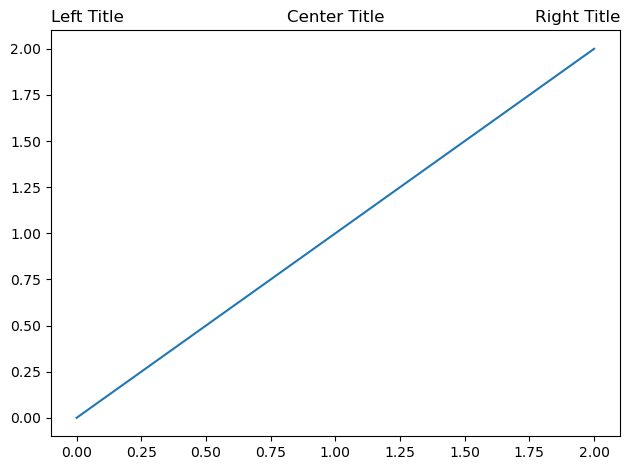

In [99]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()

ax.plot(x,x)
ax.set_title("Left Title", 
            loc = 'left') 
ax.set_title("Right Title",
            loc = 'right')
ax.set_title("I won't be long for this world.",
            loc = 'center')
            
# This only overwrites the center title above
ax.set_title("Center Title") 
#truncate
plt.tight_layout()
plt.savefig("title-loc.pdf")
plt.show()

In [100]:
savepy('title-loc')

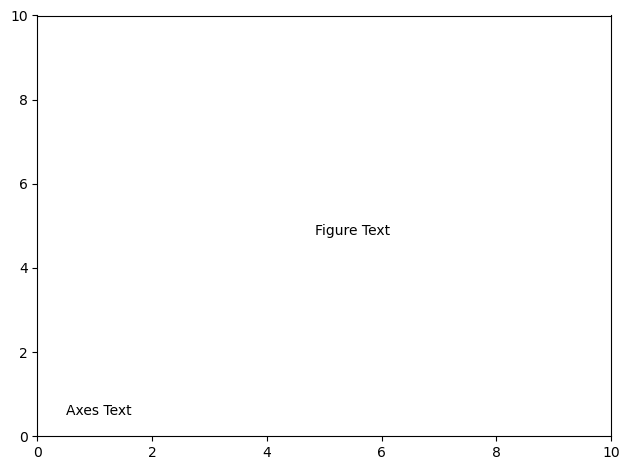

In [101]:
fig, ax = plt.figure(), plt.axes()

ax.set_xlim([0,10])
ax.set_ylim([0,10])

fig.text(0.5, 0.5, 'Figure Text')
ax.text(0.5, 0.5, 'Axes Text')
#truncate
plt.tight_layout()
plt.savefig("text-methods.pdf")
plt.show()

In [102]:
savepy("text-methods")

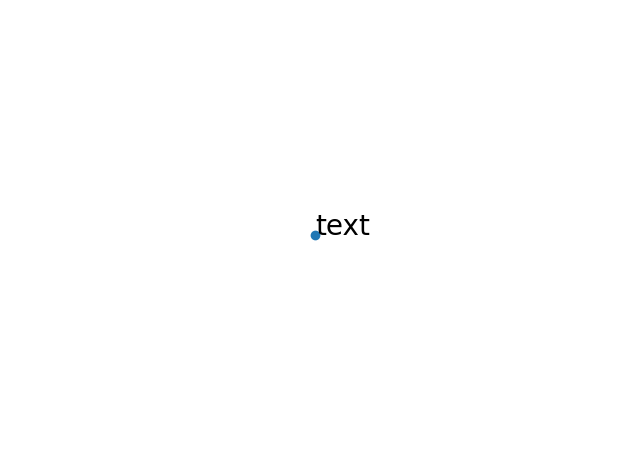

In [103]:
fig, ax = plt.figure(), plt.axes()
x, y = 0.5, 0.5
ax.scatter([x], [y])
ax.text(x,y, 'text', fontsize = 20)
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("text-default-align.pdf")
plt.show()

In [104]:
savepy('text-default-align')

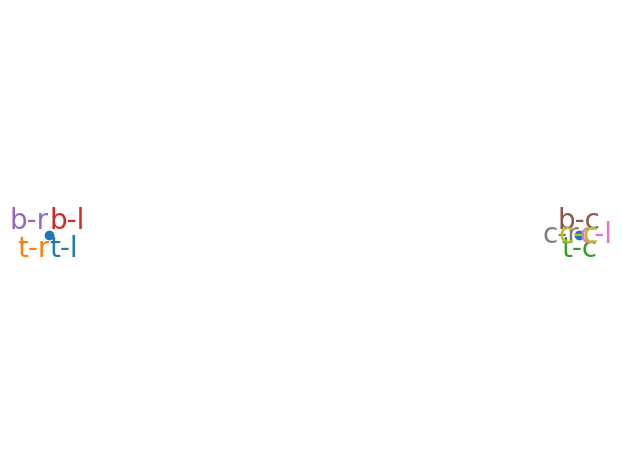

In [105]:
fig, ax = plt.figure(), plt.axes()

x1, x2, y = 0.49, 0.51, 0.5
ax.scatter([x1,x2], [y,y])

va_options = ['top', 'bottom', 'center']
ha_options = ['left', 'right', 'center']

counter = 0 # for color cycling
for va in va_options:
    for ha in ha_options:
        # first letter of each option
        label = va[0] + "-" + ha[0]
        
        # assign label to point
        x = x1
        if 'c' in label:
            x = x2
        
        ax.text(x, y,
                label,
                va = va,
                ha = ha,
                fontsize = 20,
                color = 'C'+str(counter))
        counter += 1

ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("text-align.pdf")
plt.show()

In [106]:
savepy('text-align')

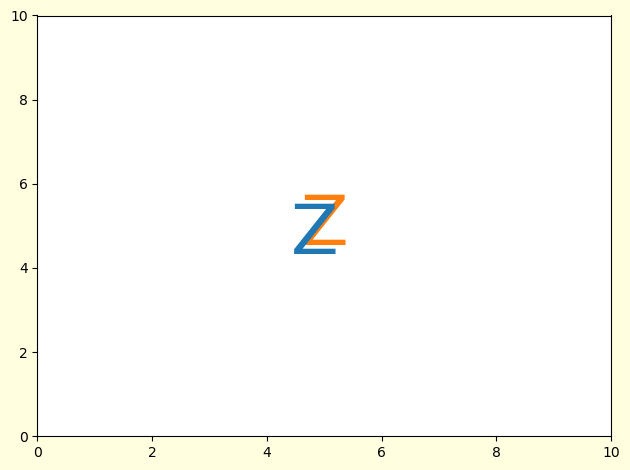

In [107]:
# not included anymore
fig, ax = plt.figure(facecolor = 'lightyellow'), plt.axes()

ax.set_xlim([0,10])
ax.set_ylim([0,10])

fig.text(0.5, 0.5, 'Z', 
    ha = 'center', va = 'center', 
    color = 'C0', fontsize = 50)
ax.text(0.5, 0.5, 'Z', 
    transform = ax.transAxes, 
    ha = 'center', va = 'center',
    color = 'C1', fontsize = 50)
#truncate
plt.tight_layout()
#plt.savefig("texttransform1.pdf")
plt.show()

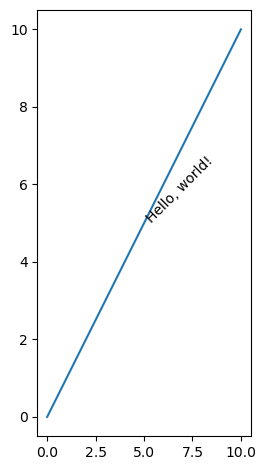

In [108]:
x = np.linspace(0,10)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)
ax.set_aspect(2)
ax.text(5,5,
       'Hello, world!',
       rotation = 45)
#truncate
plt.tight_layout()
plt.savefig("text-rotation2.pdf")
plt.show()

In [109]:
savepy('text-rotation2')

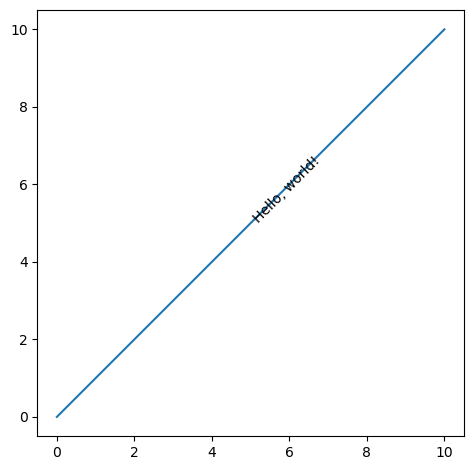

In [110]:
x = np.linspace(0,10)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)
ax.set_aspect(1)
ax.text(5,5,
       'Hello, world!',
       rotation = 45)
#truncate
plt.tight_layout()
plt.savefig("text-rotation1.pdf")
plt.show()

In [111]:
savepy('text-rotation1')

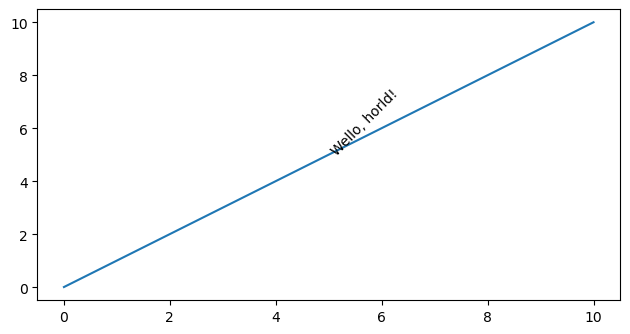

In [112]:
x = np.linspace(0,10)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)
ax.set_aspect(0.5)
ax.text(5,5,
       'Wello, horld!',
       rotation = 45)
#truncate
plt.tight_layout()
plt.savefig("text-rotation05.pdf")
plt.show()

In [113]:
savepy('text-rotation05')

In [114]:
## formatting

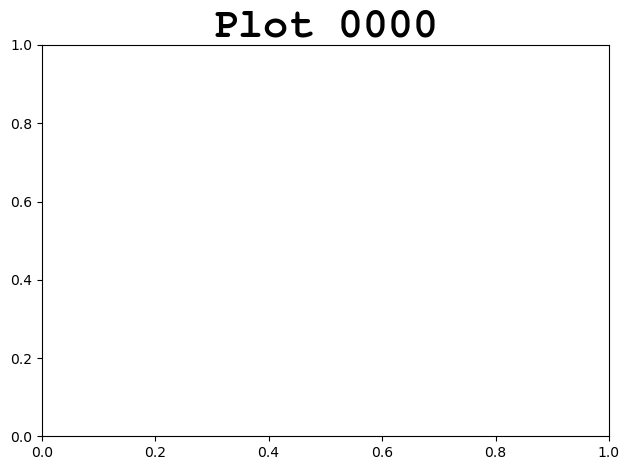

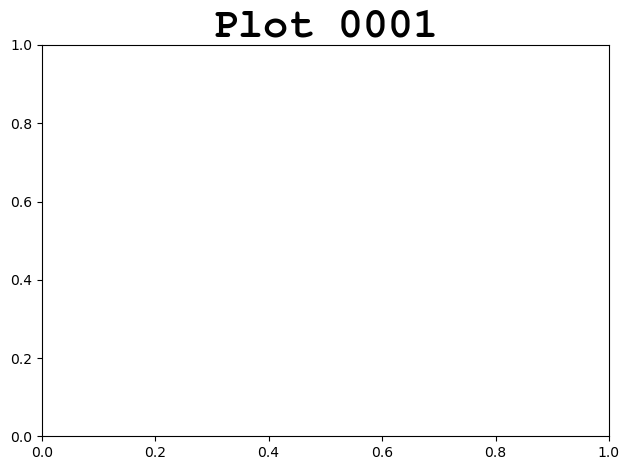

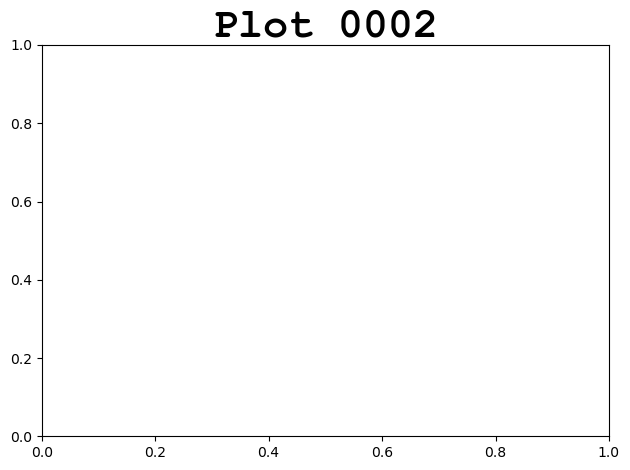

In [115]:
for i in range(3):
    fig, ax = plt.figure(), plt.axes()
    label = '{:0>4}'.format(i)
    ax.set_title("Plot " + label, 
                 fontname = 'Courier New',
                 weight = 'bold',
                 fontsize = 30)
    fig.tight_layout()
    fig.savefig(label + ".pdf")
    plt.show()

In [116]:
savepy("text-formatting")

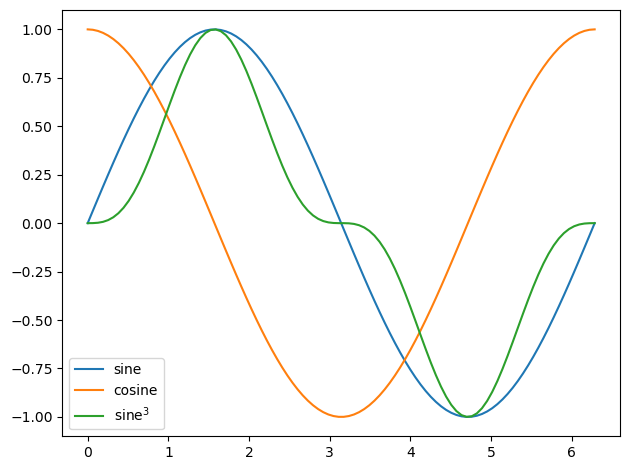

In [117]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)

# Label in one go
ax.plot(x, np.sin(x), label = 'sine')

# Label as Artist method
cos, = ax.plot(x, np.cos(x))
cos.set_label('cosine')

# Label as Artist method
sine3 = ax.plot(x, np.sin(x)**3)
sine3[0].set_label(r'sine$^3$')

# Construct legend
ax.legend()
#truncate
plt.tight_layout()
plt.savefig("legend-labels.pdf")
plt.show()

In [118]:
savepy("legend-labels")

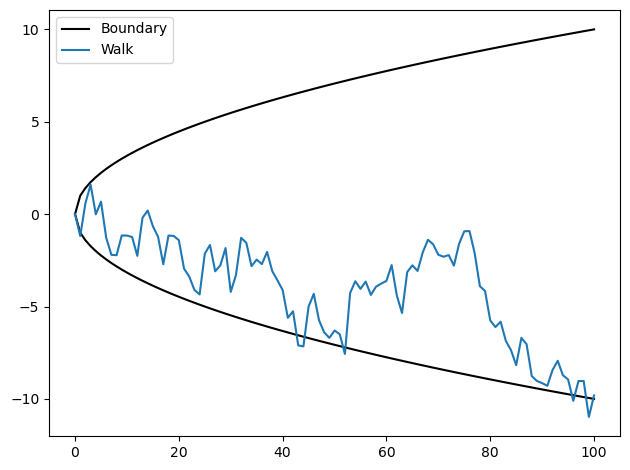

In [119]:
# Construct DataFrame
n = 100
sqrts = np.concatenate([np.zeros(1),np.ones(n).cumsum()**0.5] )
ser1 = pd.Series(data = -sqrts, name = 'Lower Bound')
ser2 = pd.Series(data = sqrts, name = 'Upper Bound')
df = pd.DataFrame([ser1,ser2]).T

# Add random walk
df['Walk'] = np.concatenate([np.zeros(1),np.random.normal(size = n).cumsum()])

# Plot
fig, ax = plt.subplots()
df['Lower Bound'].plot(color = 'black', label = 'Boundary')
df['Upper Bound'].plot(color = 'black', label = '_nolegend_')
df['Walk'].plot()

ax.legend()
#truncate
plt.tight_layout()
plt.savefig("pd-legend.pdf")
plt.show()

In [120]:
savepy("pd-legend")

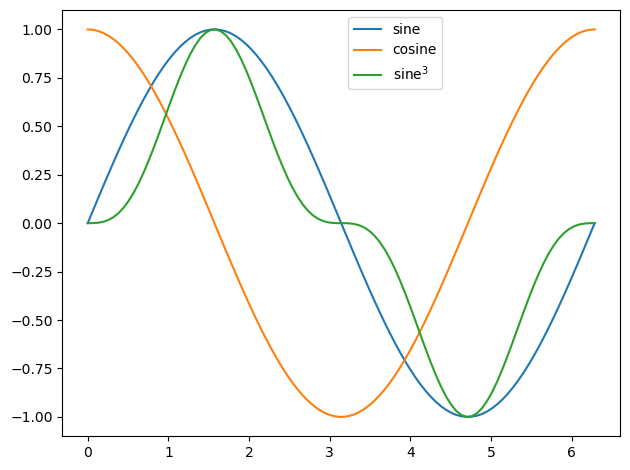

In [121]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)
ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,1))
#truncate
plt.tight_layout()
plt.savefig("legend-bb.pdf")
plt.show()

In [122]:
savepy('legend-bb')

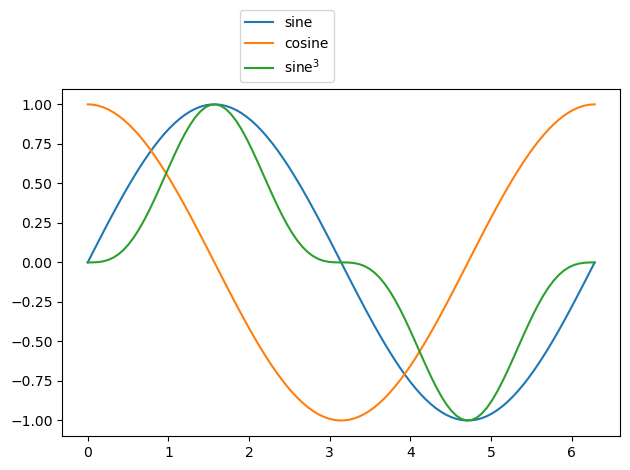

In [123]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)
ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,1),
          loc = 'lower right')
#truncate
plt.tight_layout()
plt.savefig("legend-bb-loc.pdf")
plt.show()

In [124]:
savepy("legend-bb-loc")

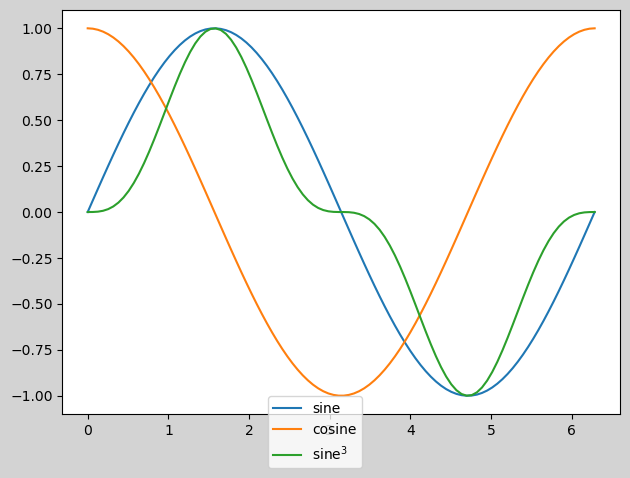

In [125]:
fig, ax = plt.figure(facecolor = 'lightgray'), plt.axes()
x = np.linspace(0,2*np.pi,100)
ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,0),
          loc = 'lower center',
          bbox_transform = fig.transFigure)
#truncate
plt.tight_layout()
plt.savefig("legend-transform.pdf")
plt.show()

In [126]:
savepy("legend-transform")

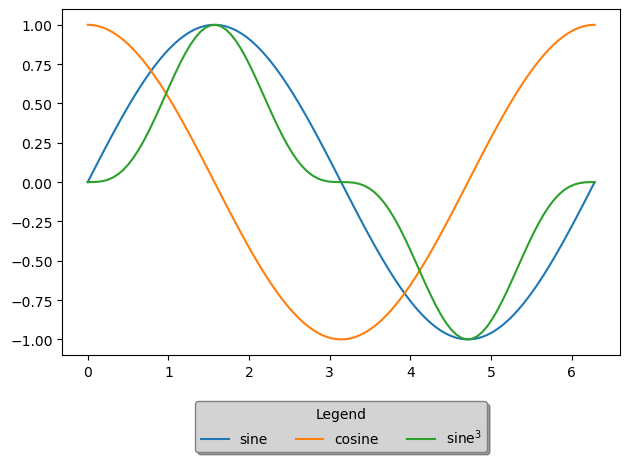

In [127]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,2*np.pi,100)

ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,-0.3),
          loc = 'lower center',
          ncol = 3,
          facecolor = 'lightgray',
          edgecolor = 'gray',
          shadow = True,
          title = 'Legend')
#truncate
plt.tight_layout()
plt.savefig("legend-shape.pdf")
plt.show()

In [128]:
savepy('legend-shape')

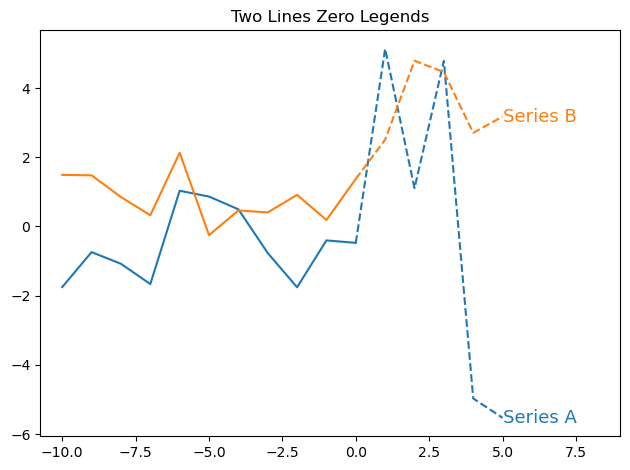

In [129]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(-10,6,1)
past = x[x<=0]
future = x[x>=0]

y_historical = np.random.normal(0,1,size = len(past))
y_projected = np.concatenate([y_historical[-1:], 
                    np.random.normal(0,3, size = len(future)-1)])

z_historical = np.random.normal(1,1,size = len(past))
z_projected = np.concatenate([z_historical[-1:], 
                    np.random.normal(3,1, size = len(future)-1)])

ax.plot(past, y_historical)
ax.plot(future, y_projected, linestyle = 'dashed', color = 'C0')

ax.plot(past, z_historical, color = 'C1')
ax.plot(future, z_projected, linestyle = 'dashed', color = 'C1')

# Label Data
ax.text(future[-1], y_projected[-1],
        s = 'Series A', 
        va = 'center',
        color = 'C0',
        size = 13)
ax.text(future[-1], z_projected[-1],
        s = 'Series B', 
        va = 'center',
        color = 'C1',
        size = 13)

ax.set_xlim(ax.get_xlim()[0], 9)
ax.set_title("Two Lines Zero Legends")
#truncate
plt.tight_layout()
plt.savefig("label-data.pdf")
plt.show()

In [130]:
savepy('label-data')

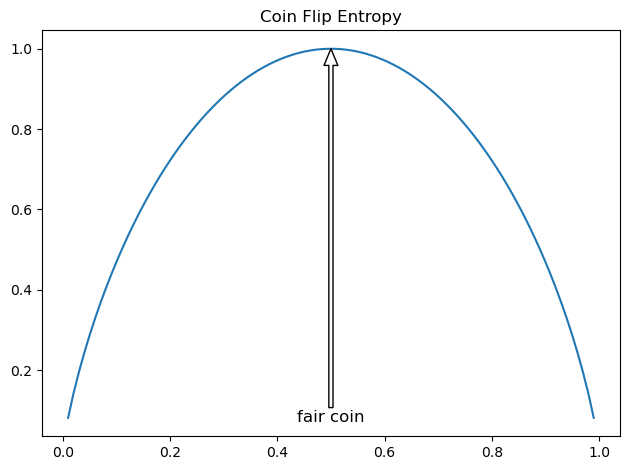

In [131]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,1,100) # Pr(heads)
x = x[(x!=0) & (x!=1)]
entropy = -x*np.log2(x) - (1-x)*np.log2(1-x)
ax.plot(x,entropy)
ax.annotate('fair coin',
            xy = (0.5,1),
            xytext = (0.5, 0.1),
            arrowprops=dict(facecolor='white',
                            edgecolor = 'black',
                            width = 3, 
                            headwidth = 10,
                            linewidth = 1), 
           ha = 'center',
           va= 'top', # text alignment around xytext
           size = 12)

ax.set_title("Coin Flip Entropy")
#truncate
plt.tight_layout()
plt.savefig("annotate-arrow.pdf")
plt.show()

In [132]:
savepy('annotate-arrow')

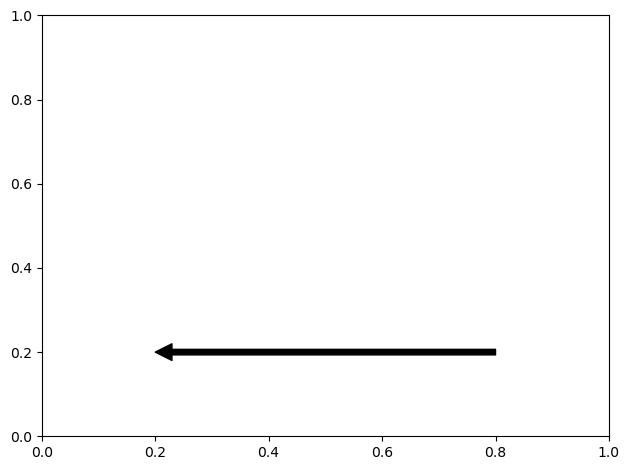

In [133]:
fig, ax = plt.figure(),  plt.axes()

# no arrow, no text
# this does nothing
ax.annotate('',
            xy = (0.1, 0.8),
            xytext = (0.9, 0.9))

# arrow
ax.annotate('', xy = (0.2, 0.2),
            xytext = (0.8, 0.2),
            arrowprops = dict(color = 'black'))
#truncate
plt.tight_layout()
plt.savefig("arrow-only.pdf")
plt.show()

In [134]:
savepy('arrow-only')

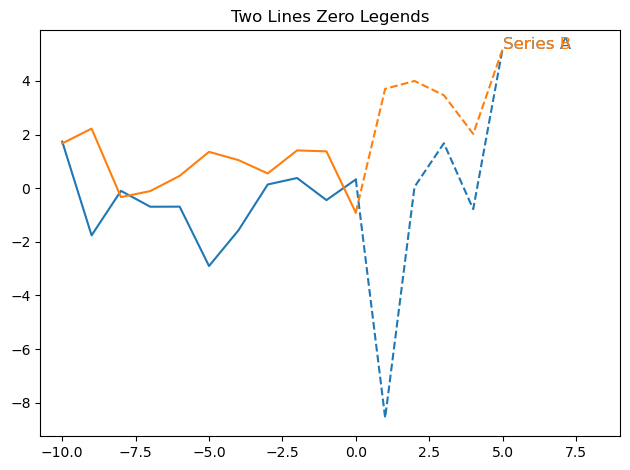

In [135]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(-10,6,1)
past = x[x<=0]
future = x[x>=0]
y_historical = np.random.normal(0,1,size = len(past))
y_projected = np.concatenate([y_historical[-1:], 
                    np.random.normal(0,3, size = len(future)-1)])
z_historical = np.random.normal(1,1,size = len(past))
z_projected = np.concatenate([z_historical[-1:], 
                    np.random.normal(3,1, size = len(future)-1)])
ax.plot(past, y_historical)
a_line, = ax.plot(future, y_projected, linestyle = 'dashed', color = 'C0')
ax.plot(past, z_historical, color = 'C1')
b_line, = ax.plot(future, z_projected, linestyle = 'dashed', color = 'C1')

# Label Data
ax.annotate('Series A',
            xy = (1, y_projected[-1]),
            xycoords = (a_line, 'data'), 
            color = 'C0',
            size = 12)

ax.annotate('Series B',
            xy = (1, z_projected[-1]),
            xycoords = (b_line, 'data'), 
            color = 'C1',
            size = 12)

ax.set_xlim(ax.get_xlim()[0], 9)
ax.set_title("Two Lines Zero Legends")
#truncate
plt.tight_layout()
plt.savefig("direct-annotation.pdf")
plt.show()

In [136]:
savepy('direct-annotation')

In [137]:
## fancy titles

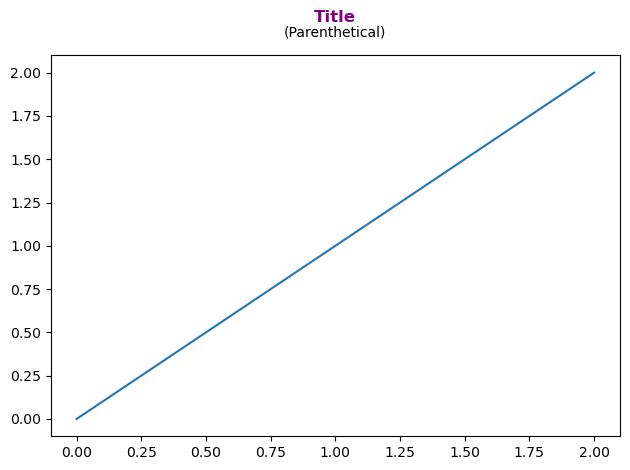

In [138]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)

ax.set_title("Title", 
             weight = 'bold', 
             color = 'purple', 
             pad = 24) 

ax.text(0.5, 1.05,
        s = '(Parenthetical)',
        transform = ax.transAxes,
        ha = 'center')
#truncate
plt.tight_layout()
plt.savefig("subtitle.pdf")
plt.show()

In [139]:
savepy('subtitle')

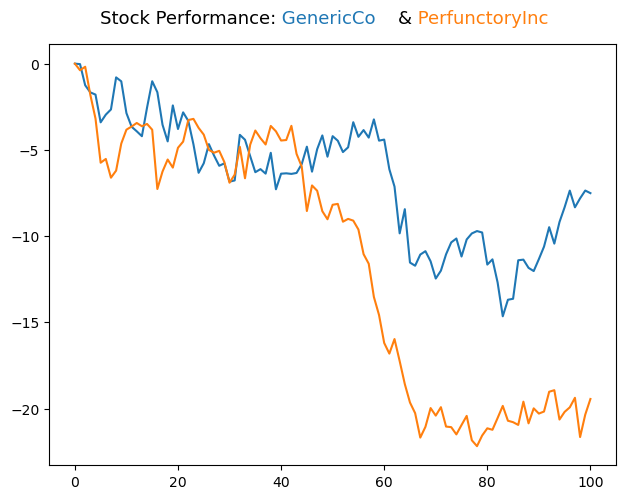

In [140]:
x = range(101)

# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()
y2 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()

fig, ax = plt.figure(), plt.axes()
plt.tight_layout()
# Color arguments added to make defaults explicit
ax.plot(x,y1, color = 'C0')
ax.plot(x,y2, color = 'C1')

ax.text(0.4, 1.05, ' GenericCo', 
        transform = ax.transAxes, 
        ha = 'left', 
        fontsize = 13,
        color = 'C0')

ax.text(0.4, 1.05, 'Stock Performance:', 
        transform = ax.transAxes, 
        ha = 'right', 
        fontsize = 13,
        color = 'black')

ax.text(0.64, 1.05, '&', 
        transform = ax.transAxes, 
        ha = 'right', 
        fontsize = 13,
        color = 'black')

ax.text(0.64, 1.05, ' PerfunctoryInc', 
        transform = ax.transAxes, 
        ha = 'left', 
        fontsize = 13,
        color = 'C1')
#truncate
plt.savefig("multicolor-inexact.pdf")

In [141]:
savepy('multicolor-inexact')

In [142]:
def color_title(labels, colors, textprops ={'size':'large'}, ax = None, y = 1.013,
               precision = 10**-2):
     
    "Creates a centered title with multiple colors. "
        
    if ax == None:
        ax = plt.gca()
        
    plt.gcf().canvas.draw()
    transform = ax.transAxes # use axes coords
    
    # initial params
    xT = 0 # where the text ends in x-axis coords
    shift = 0 # where the text starts
    
    # for text objects
    text = dict()

    while (np.abs(shift - (1-xT)) > precision) and (shift <= xT) :         
        x_pos = shift 
        
        for label, col in zip(labels, colors):

            try:
                text[label].remove()
            except KeyError:
                pass
            
            text[label] = ax.text(x_pos, y, label, 
                        transform = transform, 
                        ha = 'left',
                        color = col,
                        **textprops)
            
            x_pos = text[label].get_window_extent()\
                   .transformed(transform.inverted()).x1
            
        xT = x_pos # where all text ends
        
        shift += precision/2 # increase for next iteration
      
        if x_pos > 1: # guardrail 
            break

In [143]:
savepy('color-title')

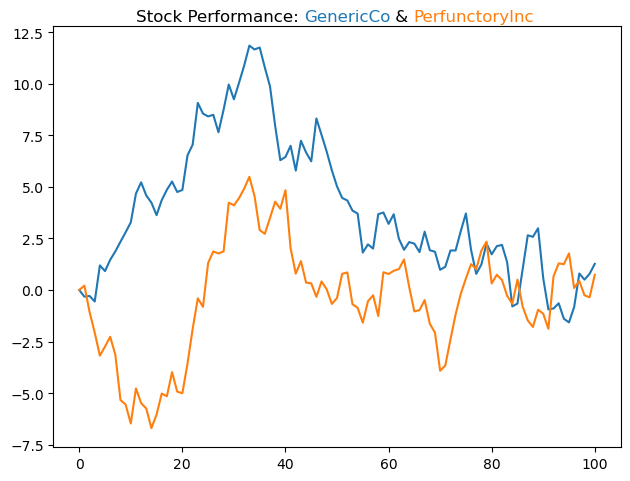

In [144]:
x = range(101)
# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()
y2 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()

fig, ax = plt.figure(), plt.axes()
plt.tight_layout()
# Color arguments added to make defaults explicit
ax.plot(x,y1, color = 'C0')
ax.plot(x,y2, color = 'C1')

labels = ['Stock Performance: ', 'GenericCo', ' & ', 'PerfunctoryInc']
colors = ['black', 'C0', 'black', 'C1']
color_title(labels, colors)
#truncate
plt.savefig("color-title-ex.pdf")

In [145]:
savepy('color-title-ex')

In [146]:
## fonts

In [147]:
cd = %pwd
%cd ~
%pwd

/Users/alclark


'/Users/alclark'

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/proseplots


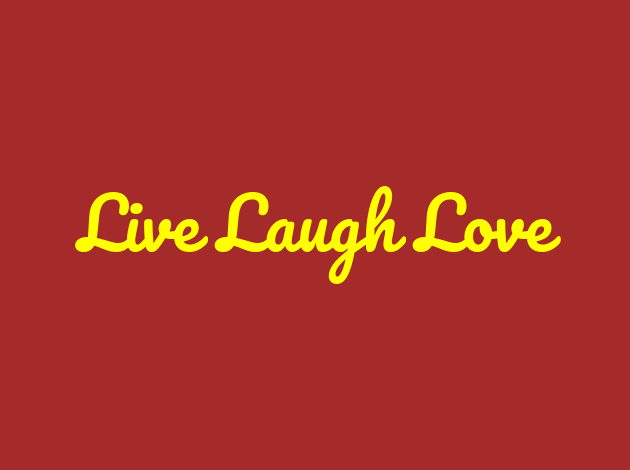

In [148]:
# font download 
# https://fonts.google.com/specimen/Pacifico
# access font and add to font manager
font_dirs = ['Downloads/Pacifico'] # change depending on where you downloaded it
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Make Figure
fig, ax  = plt.figure(), plt.axes()
t = fig.text(0.5,0.5,
             'Live Laugh Love',
             ha = 'center',
             va = 'center')
ax.axis('off')
t.set_size(50)
t.set_name("Pacifico")
t.set_color('yellow')
fig.set_facecolor('brown')
#truncate
%cd $cd
plt.tight_layout()
plt.savefig("font.pdf")
plt.show()

In [149]:
savepy('font')

In [150]:
t.get_font().__dict__

{'_family': ['Pacifico'],
 '_slant': 'normal',
 '_variant': 'normal',
 '_weight': 'normal',
 '_stretch': 'normal',
 '_file': None,
 '_size': 50.0,
 '_math_fontfamily': 'dejavusans'}

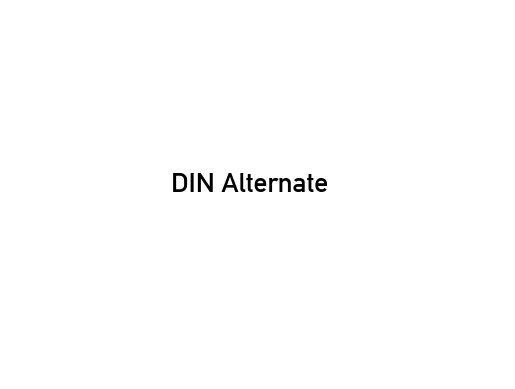

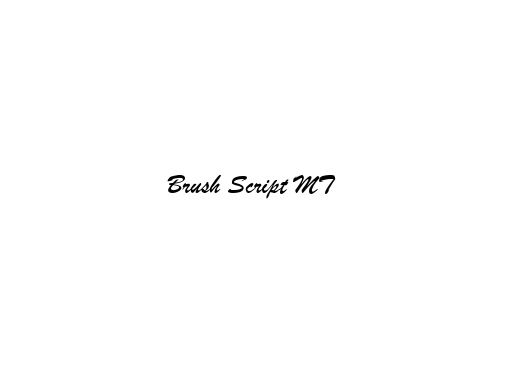

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 111 (o) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 116 (t) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabt

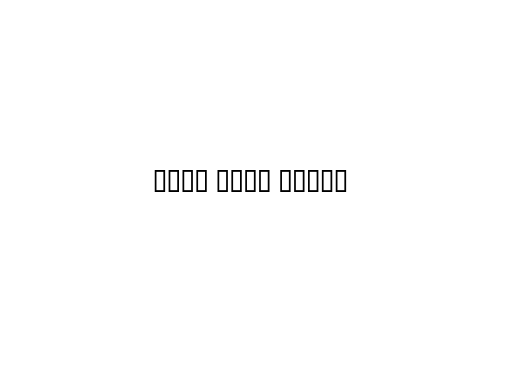

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 117 (u) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 102 (f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 105 (i) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 100 (d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabt

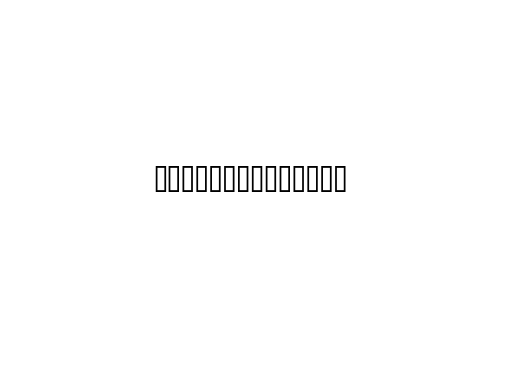

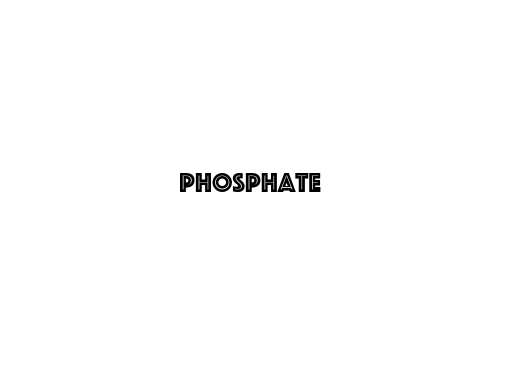

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 77 (M) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


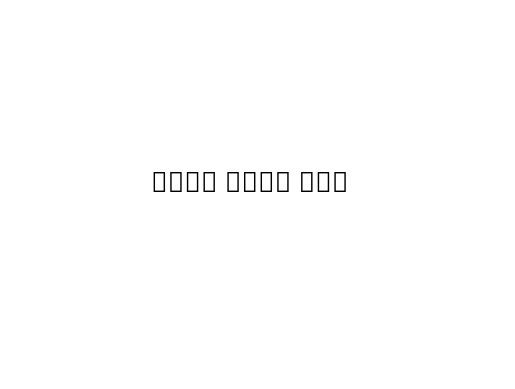

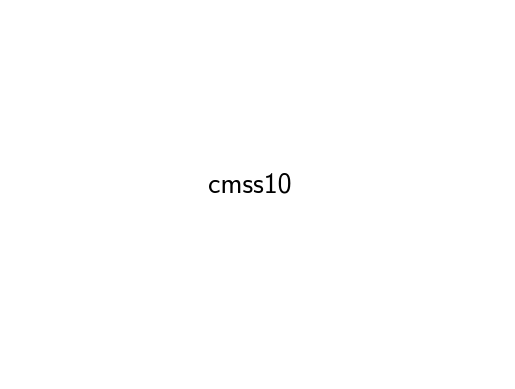

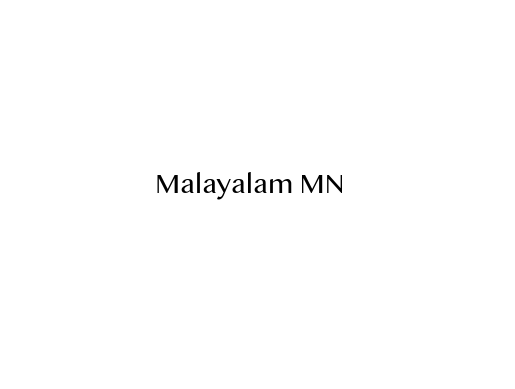

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 109 (m) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


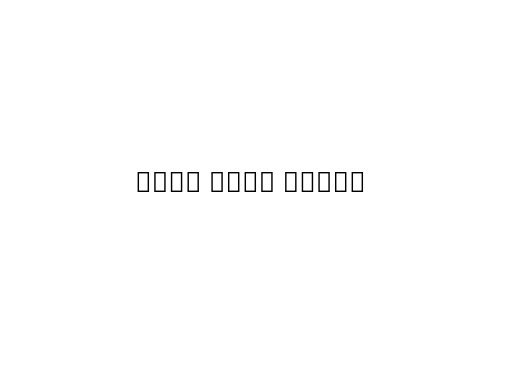

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 70 (F) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 104 (h) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


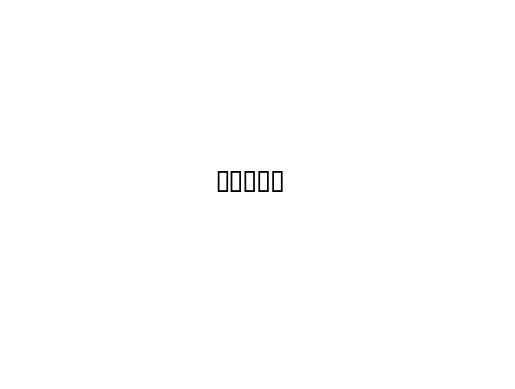

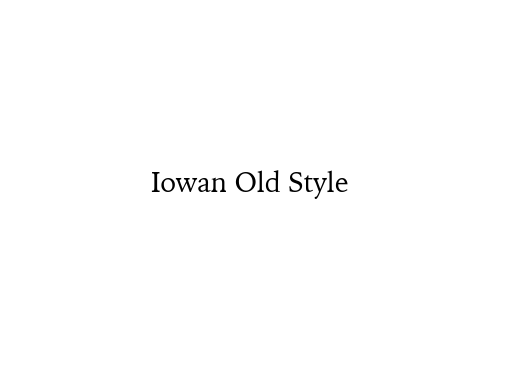

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 67 (C) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


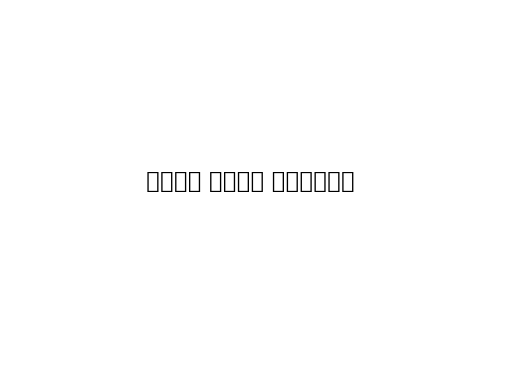

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 73 (I) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 84 (T) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 68 (D) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 101 (e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 118 (v) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtoo

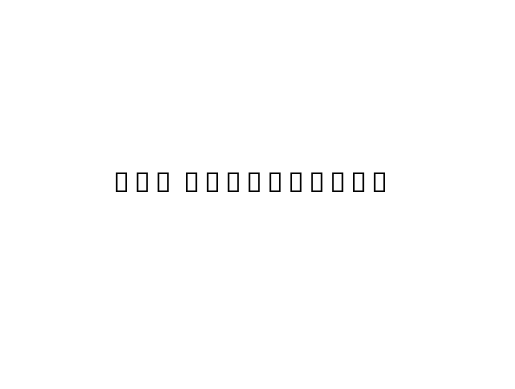

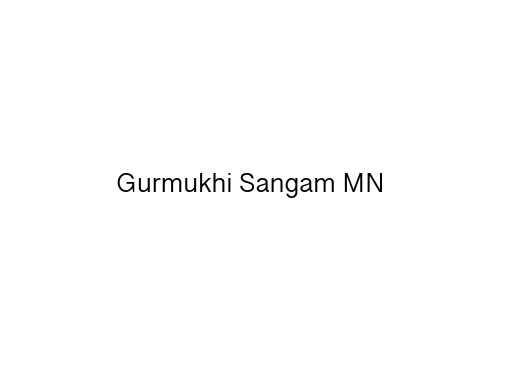

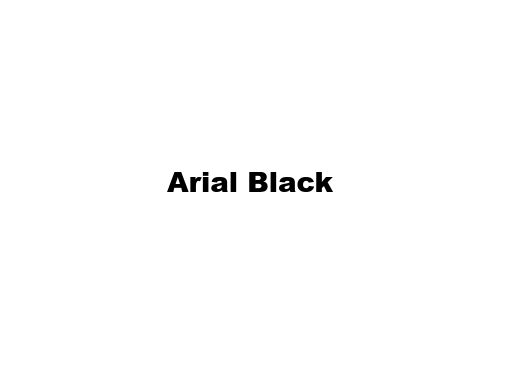

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 79 (O) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65 (A) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 98 (b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


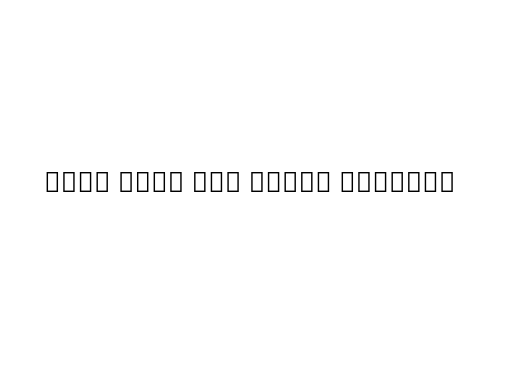

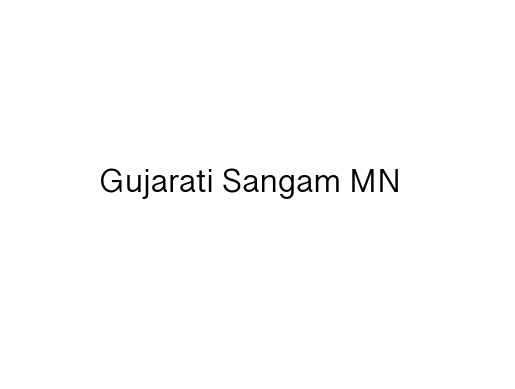

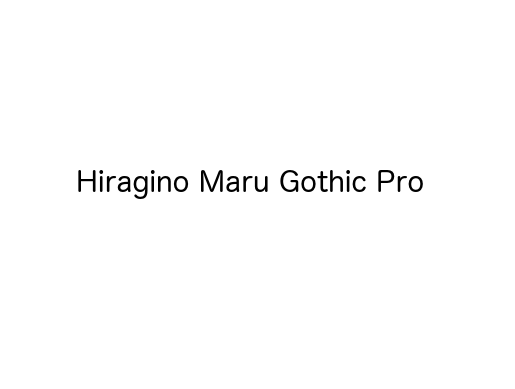

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 121 (y) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


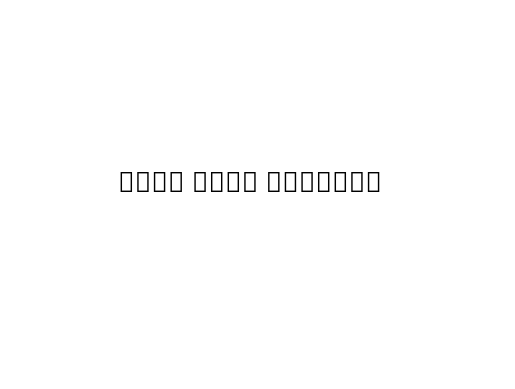

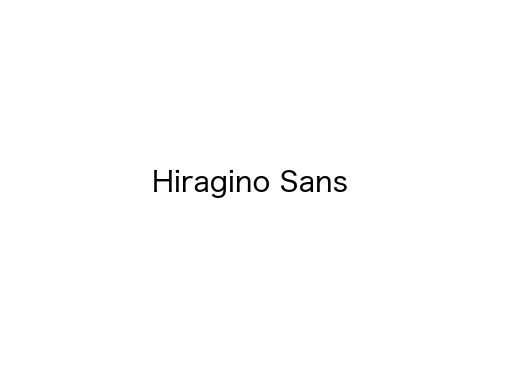

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 72 (H) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119 (w) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


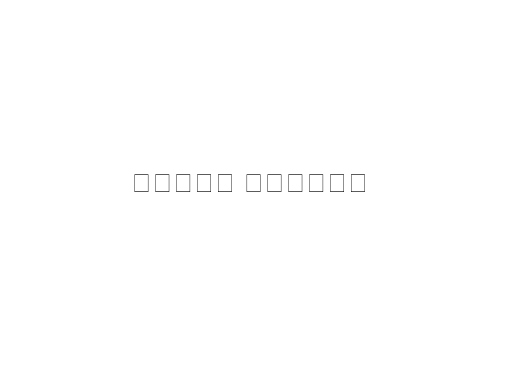

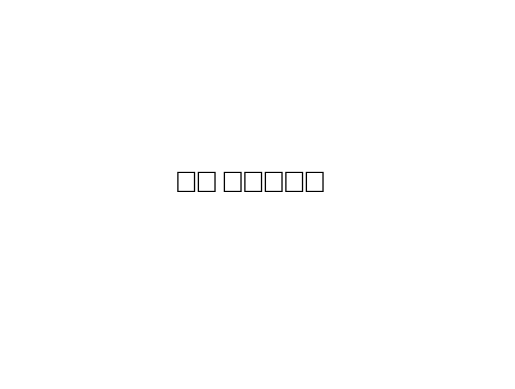

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 99 (c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 80 (P) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


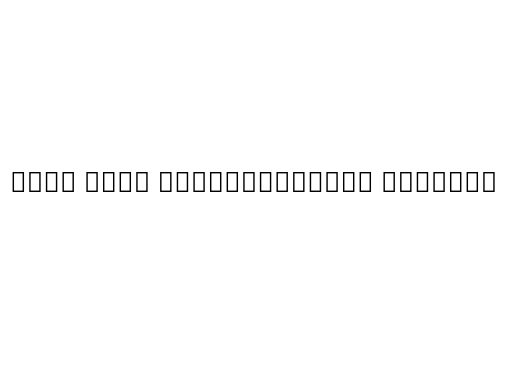

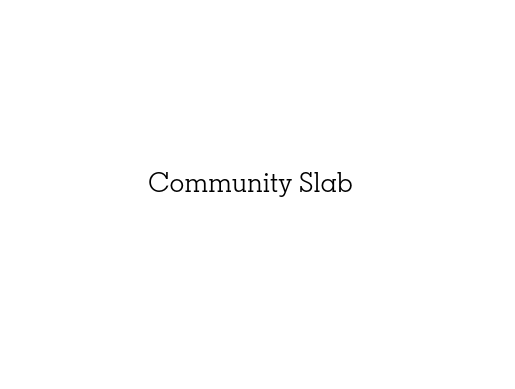

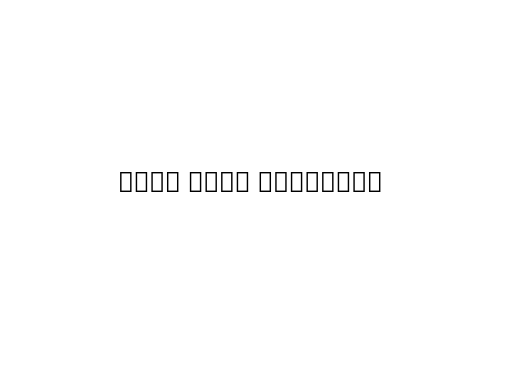

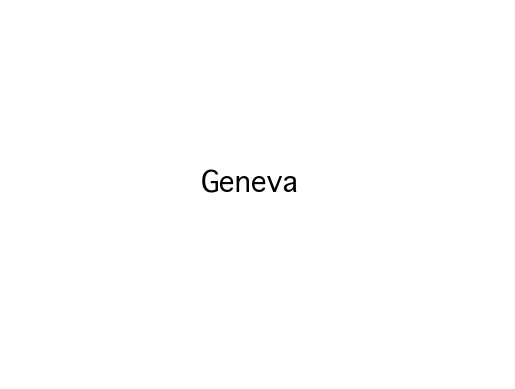

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 74 (J) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


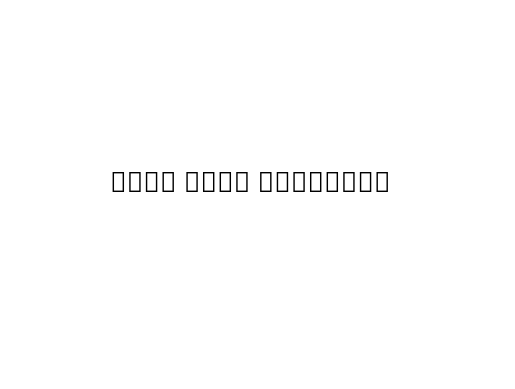

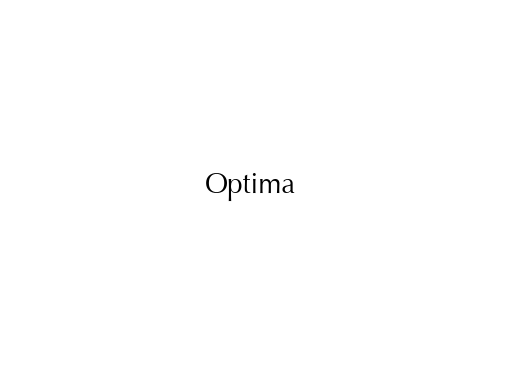

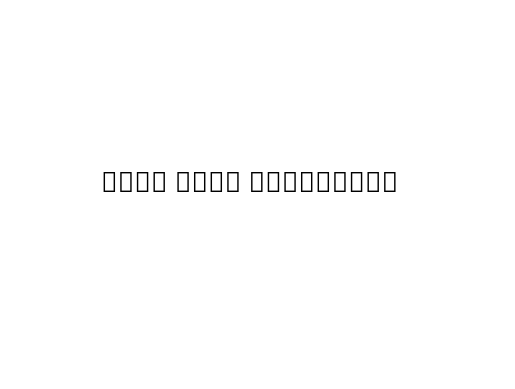

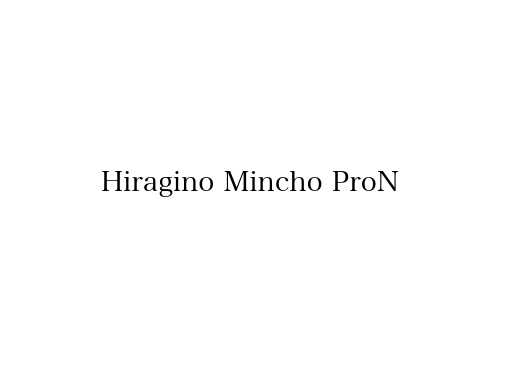

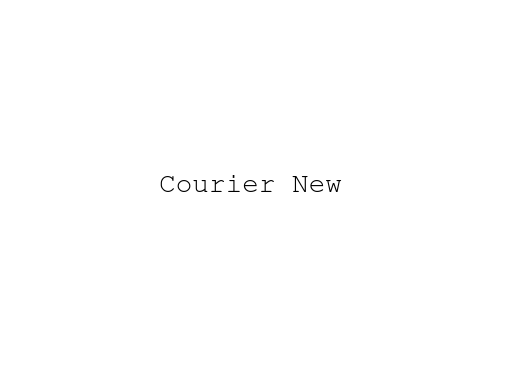

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 86 (V) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


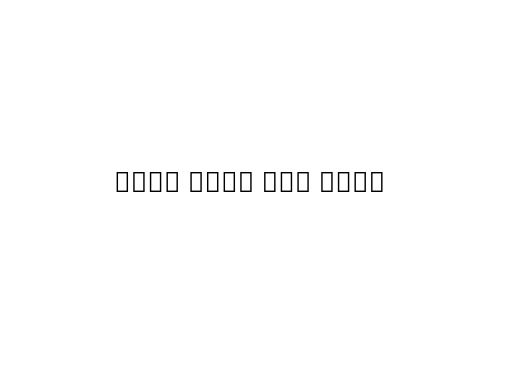

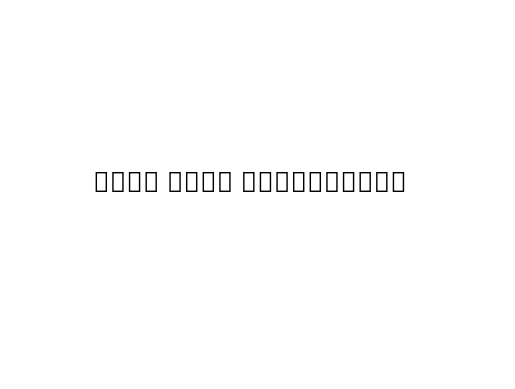

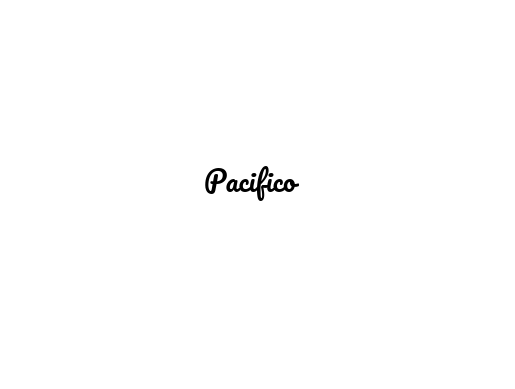

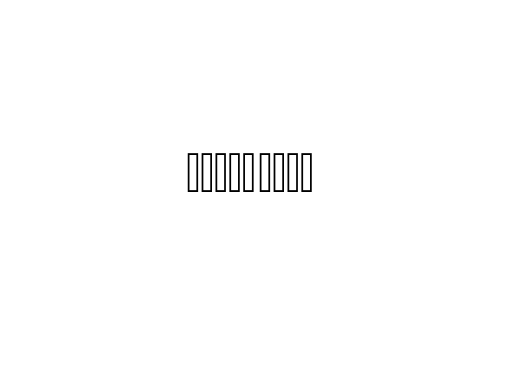

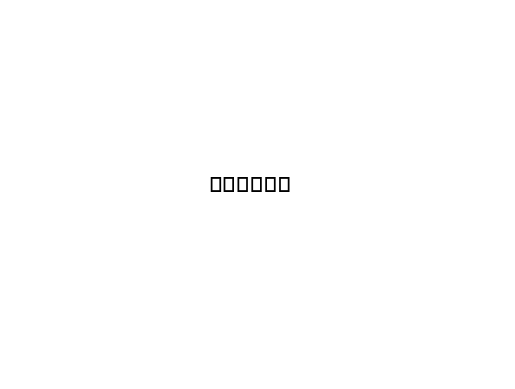

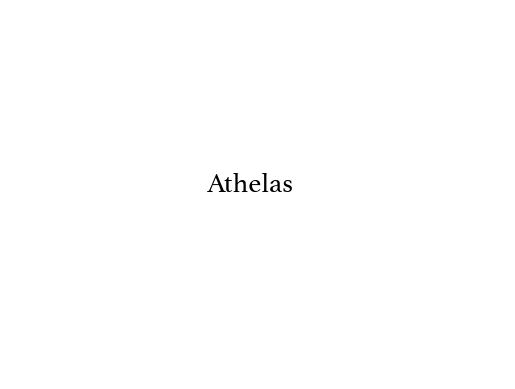

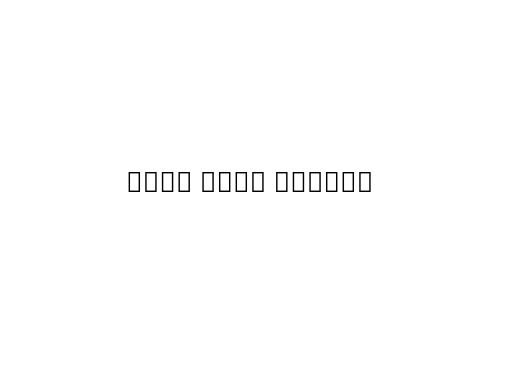

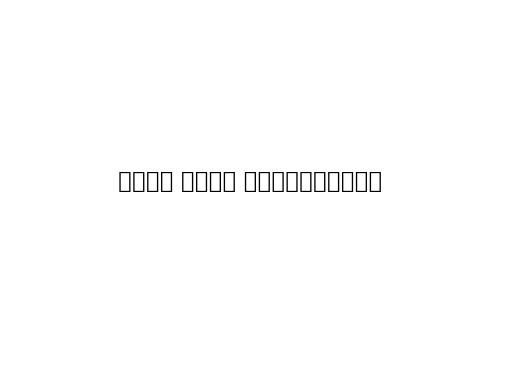

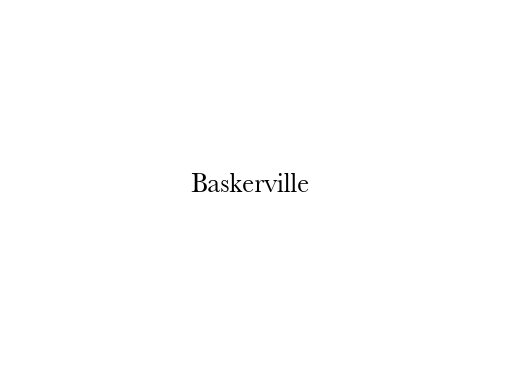

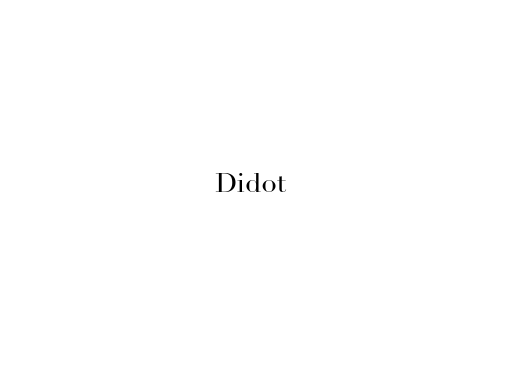

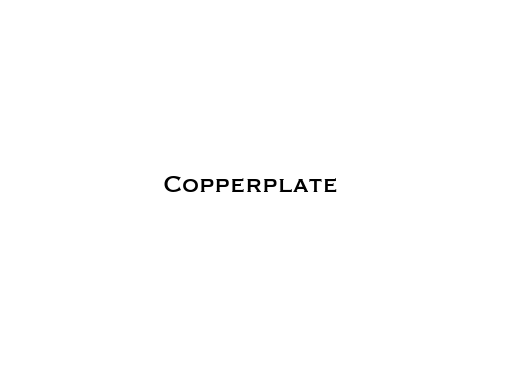

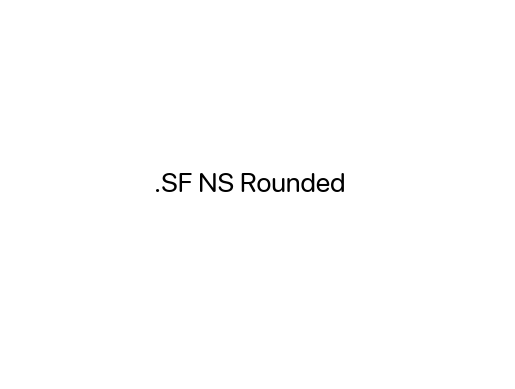

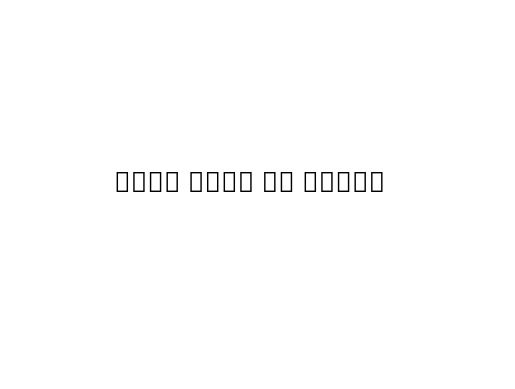

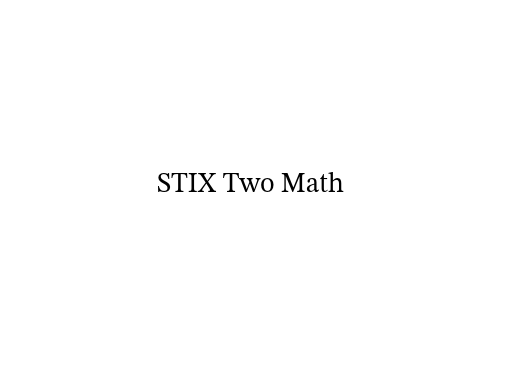

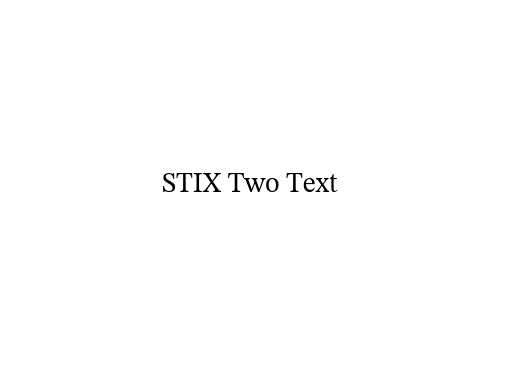

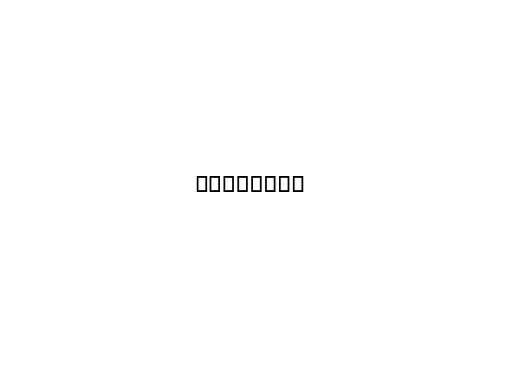

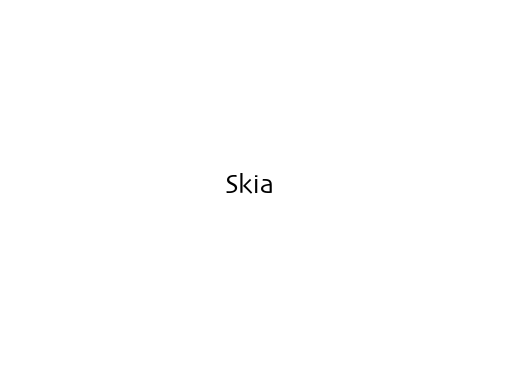

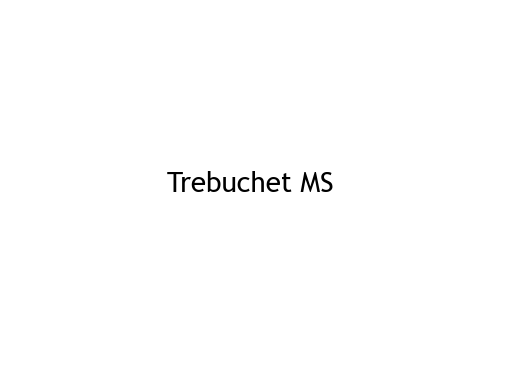

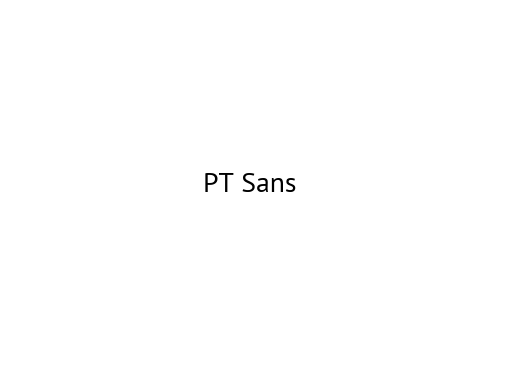

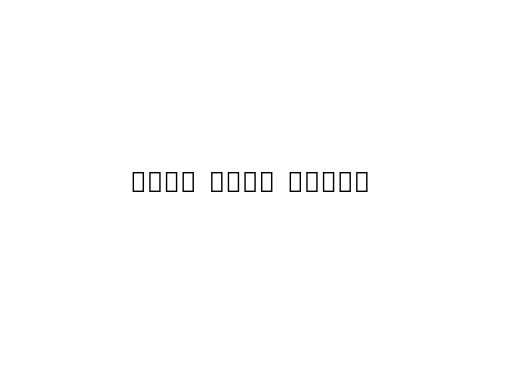

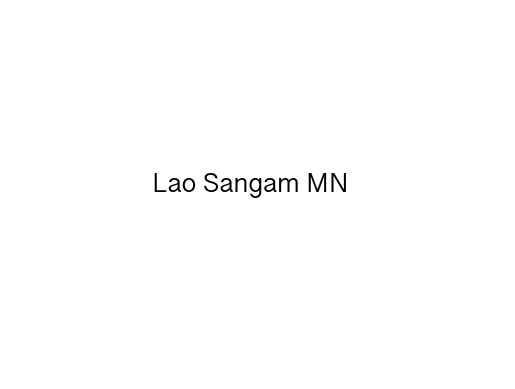

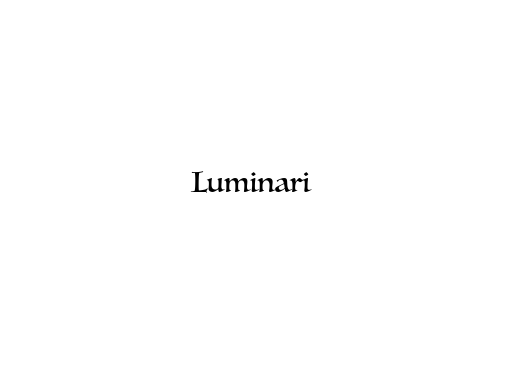

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46 (.) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


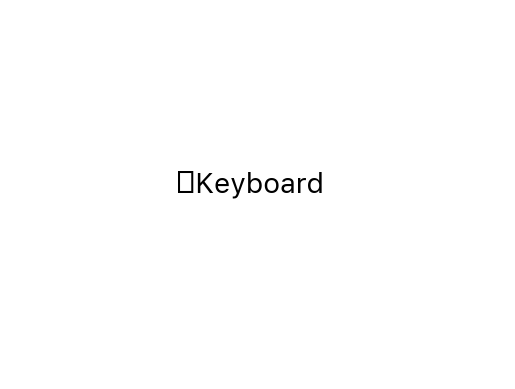

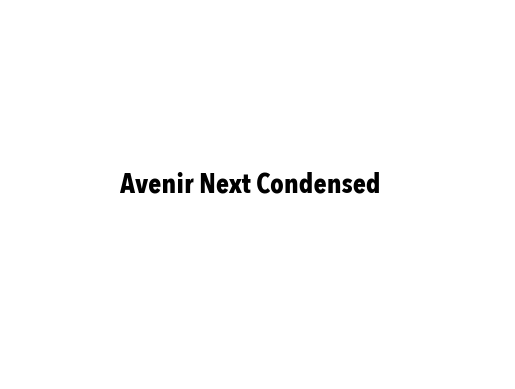

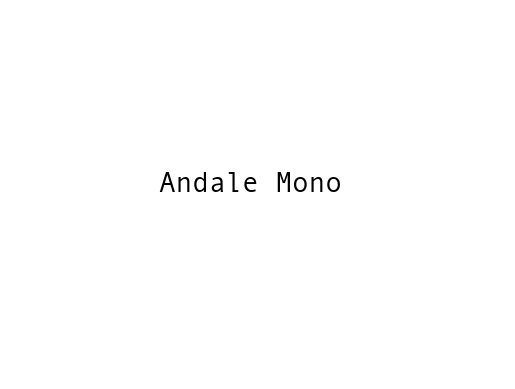

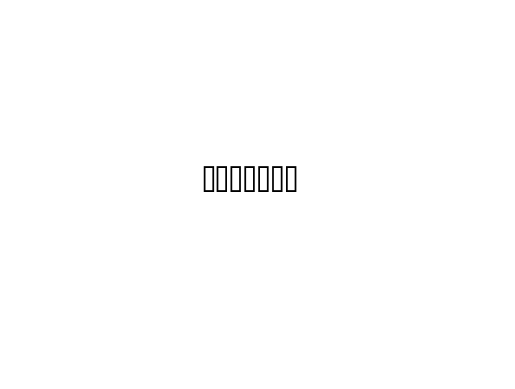

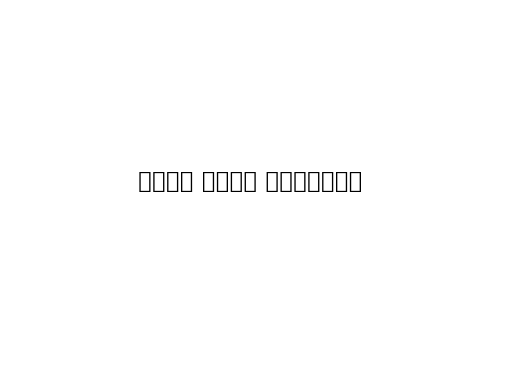

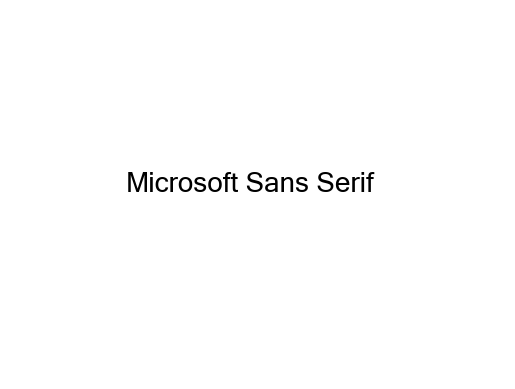

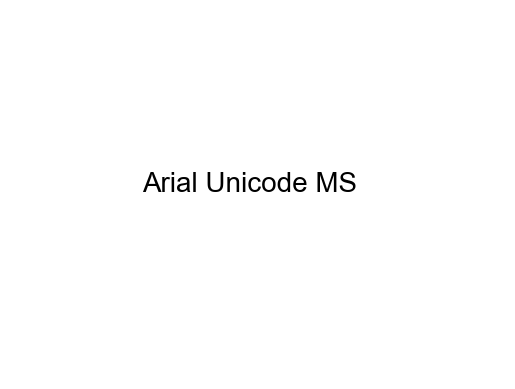

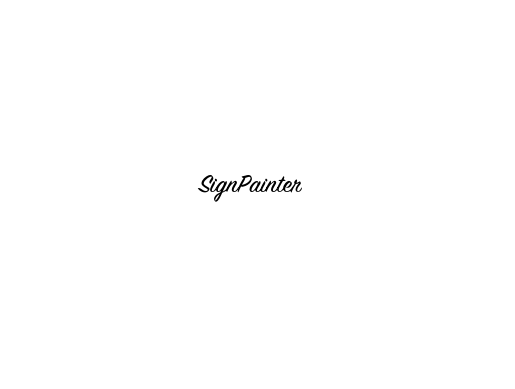

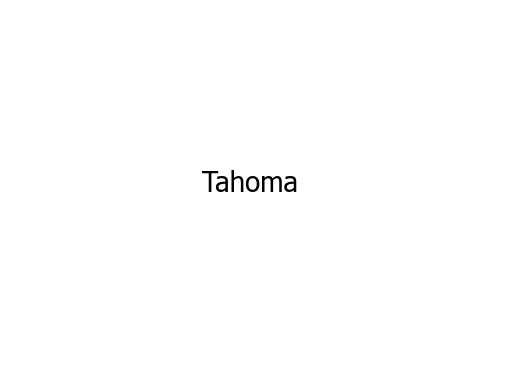

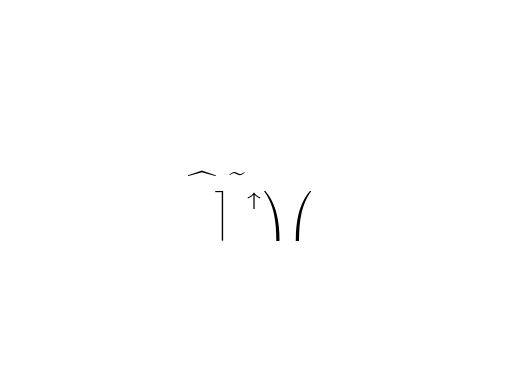

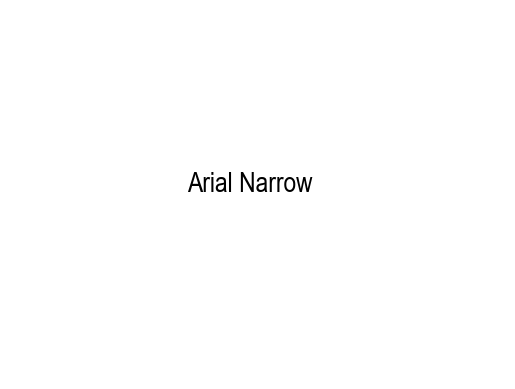

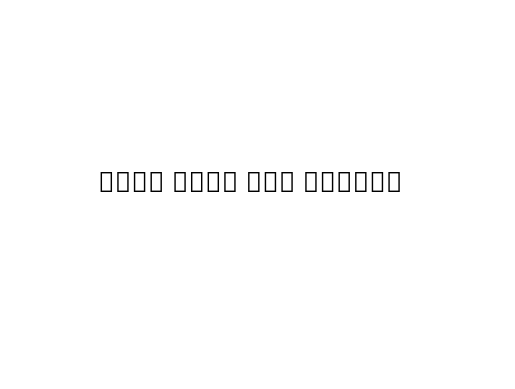

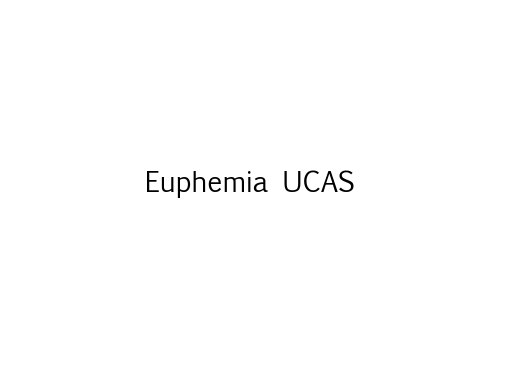

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 76 (L) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


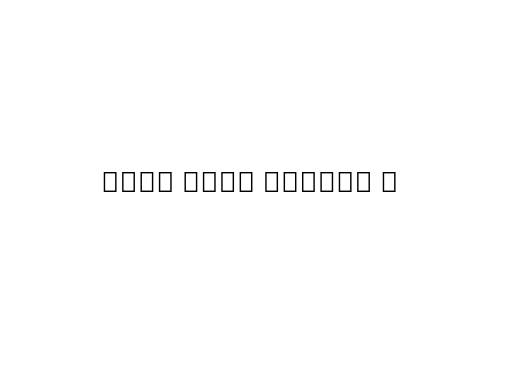

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 106 (j) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


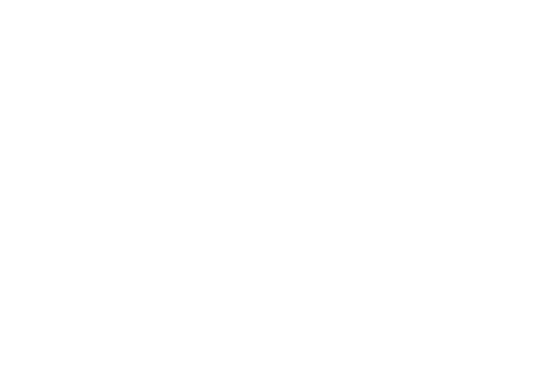

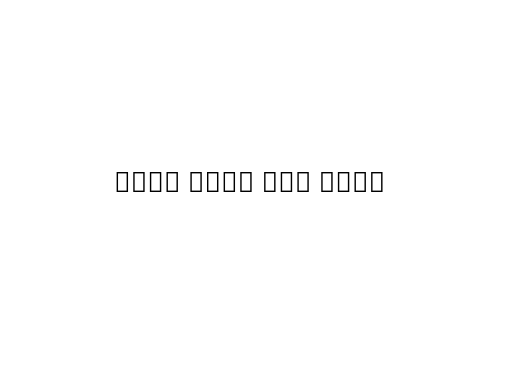

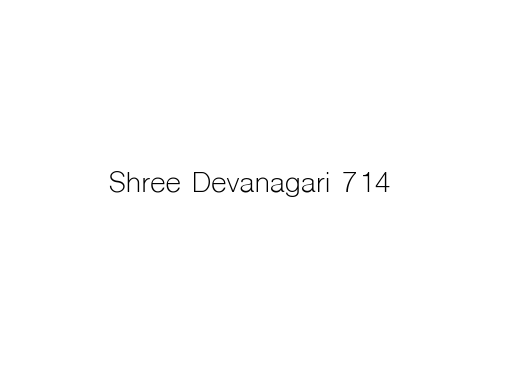

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 82 (R) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


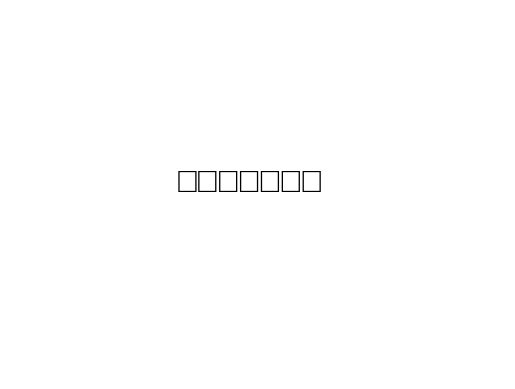

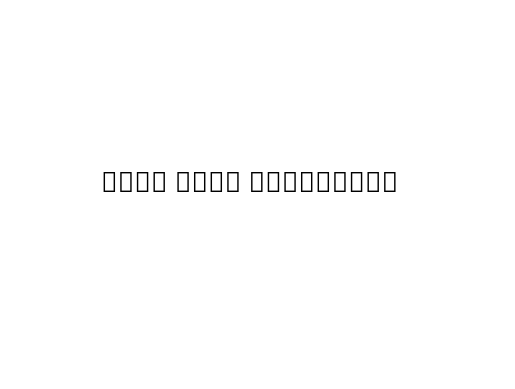

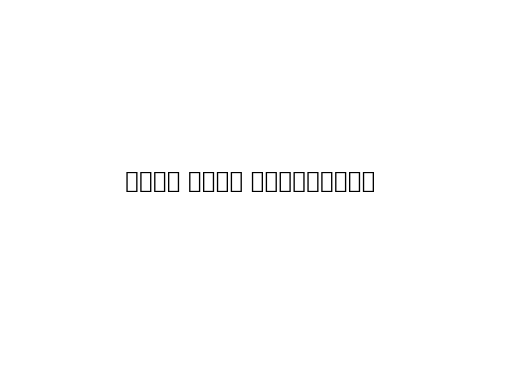

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 89 (Y) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


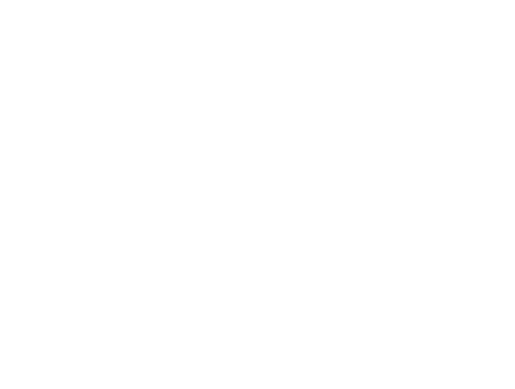

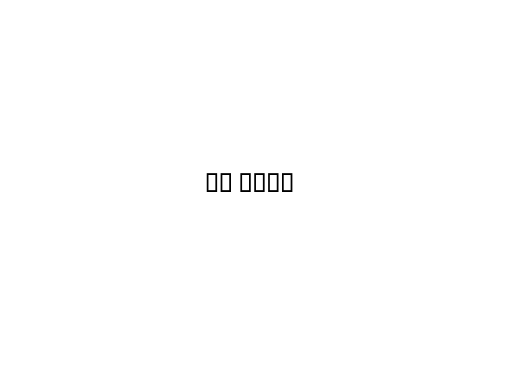

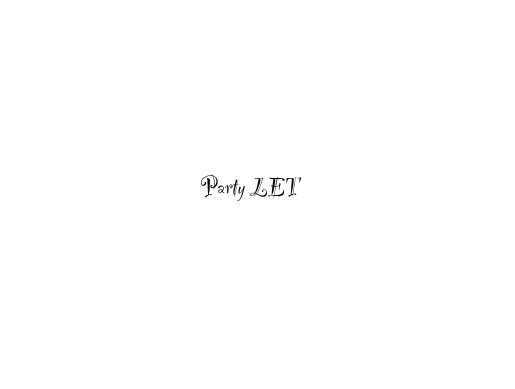

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 90 (Z) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


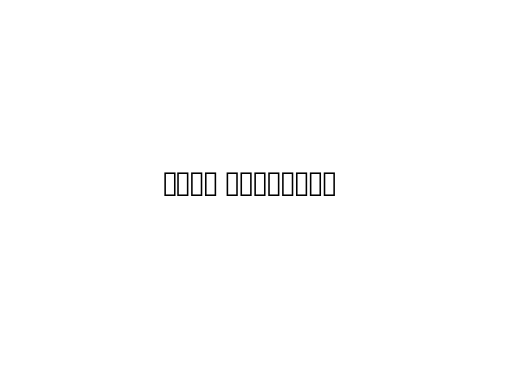

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


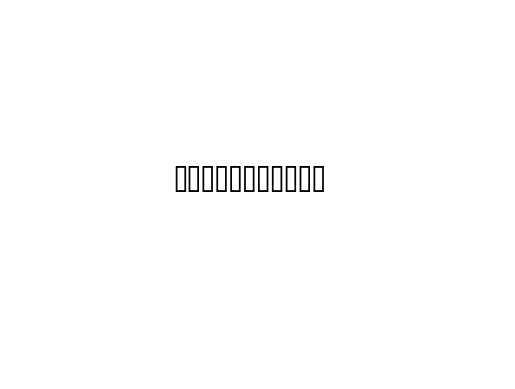

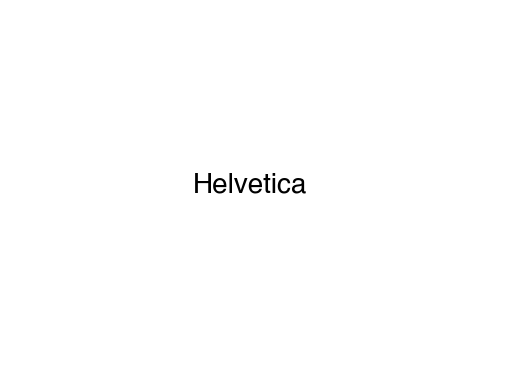

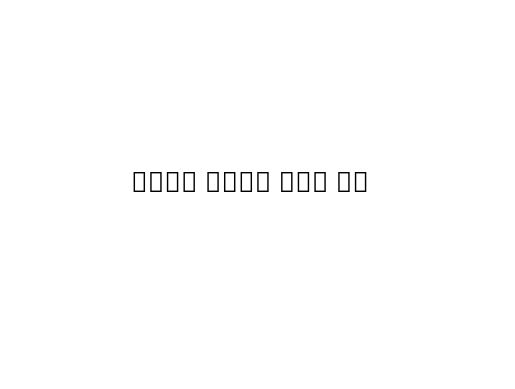

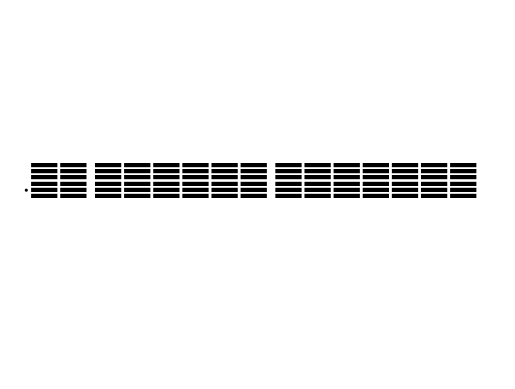

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 88 (X) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 122 (z) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


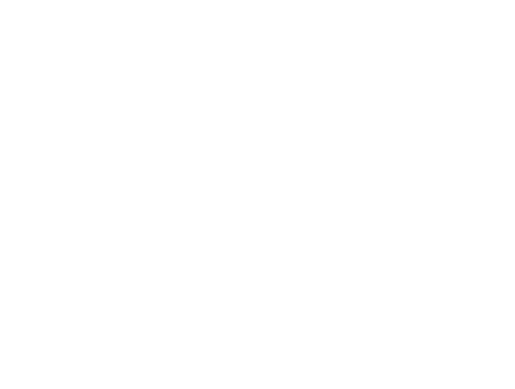

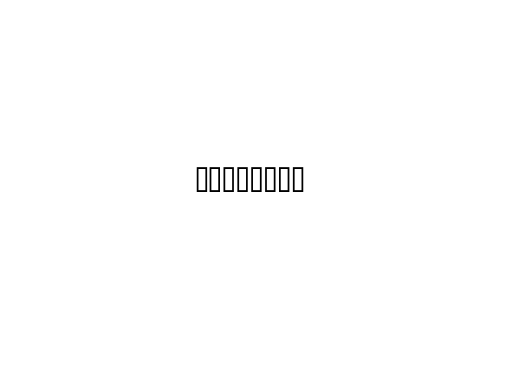

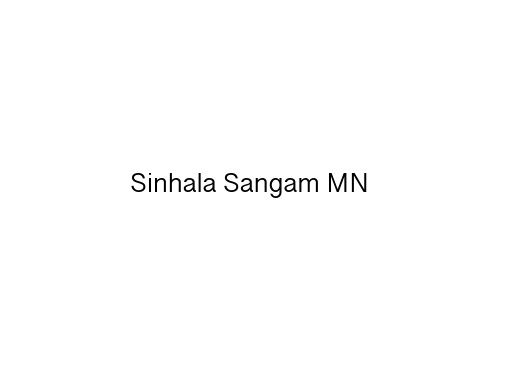

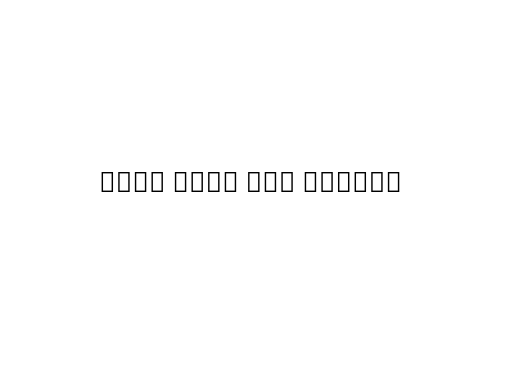

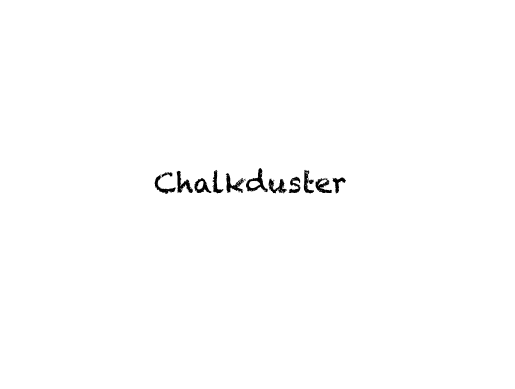

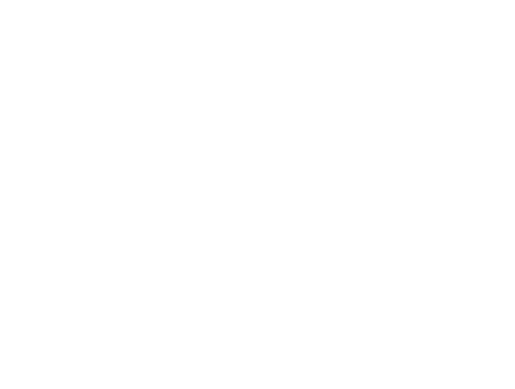

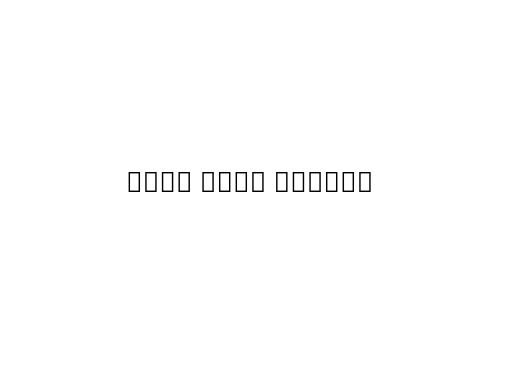

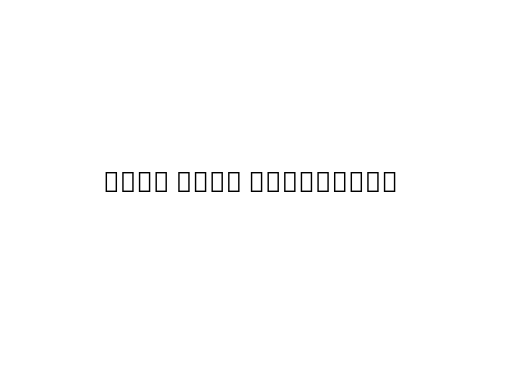

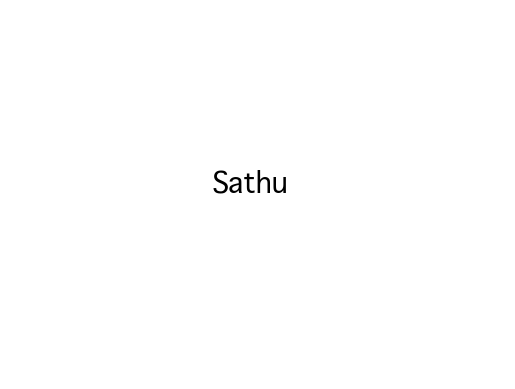

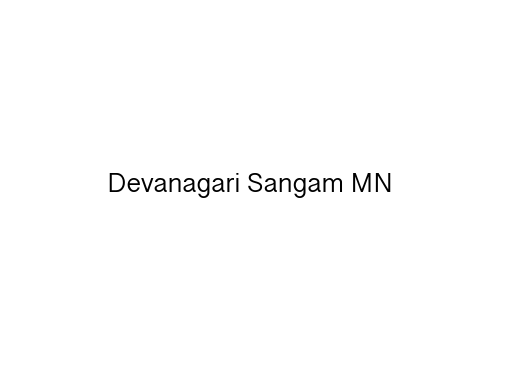

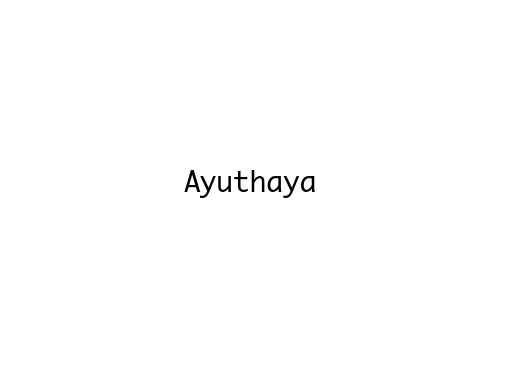

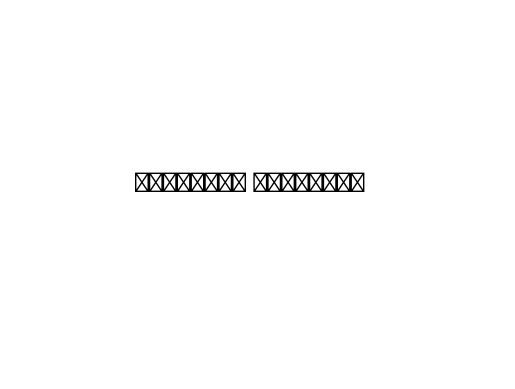

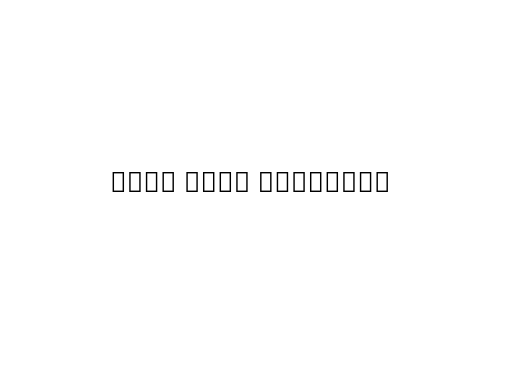

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 87 (W) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


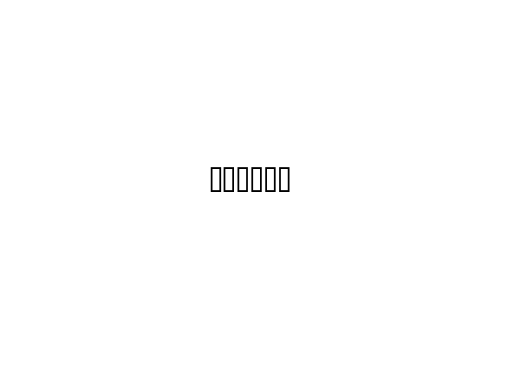

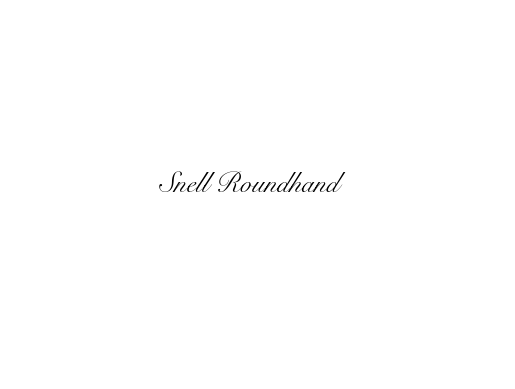

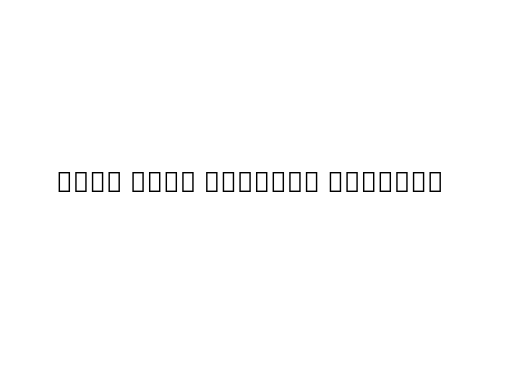

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 69 (E) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


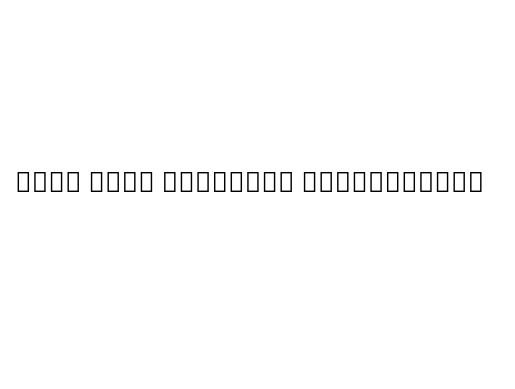

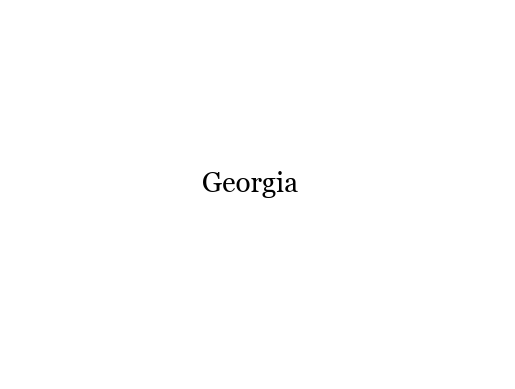

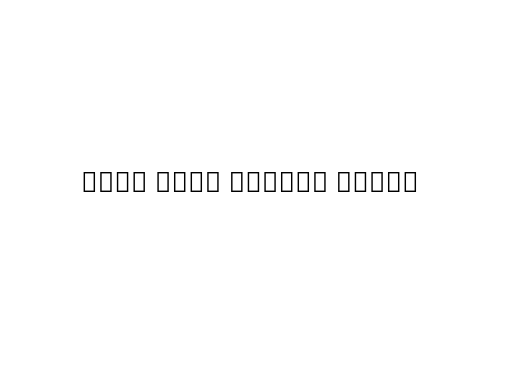

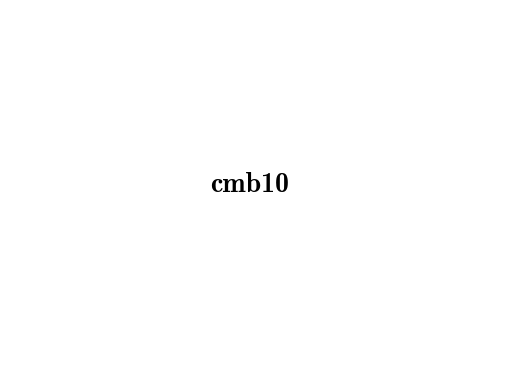

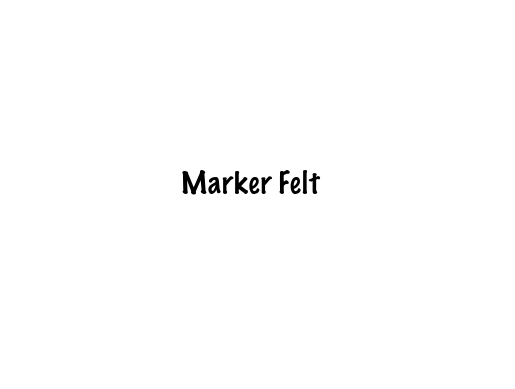

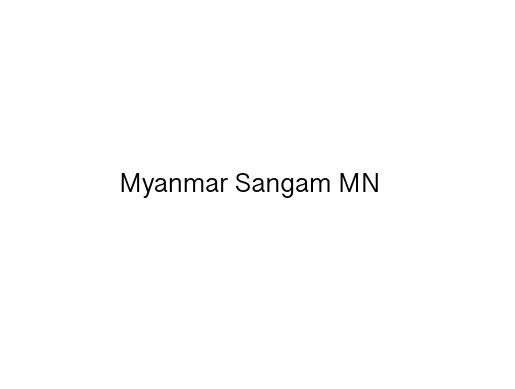

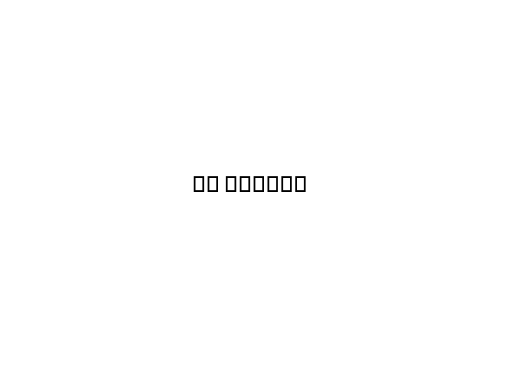

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50 (2) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


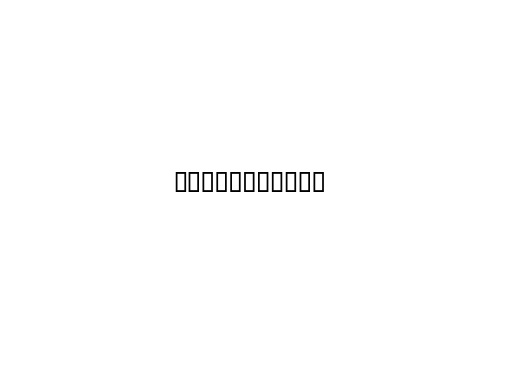

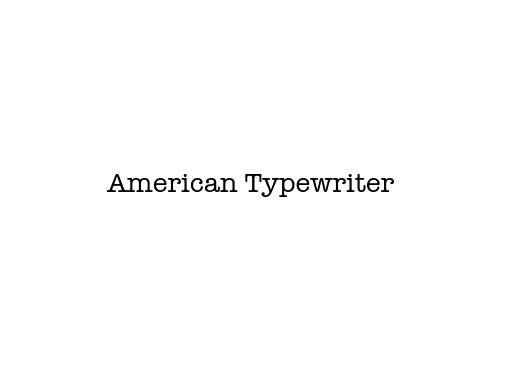

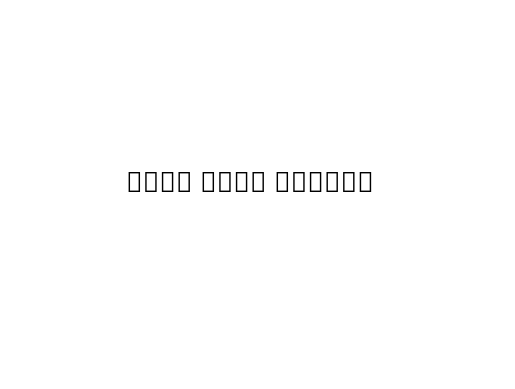

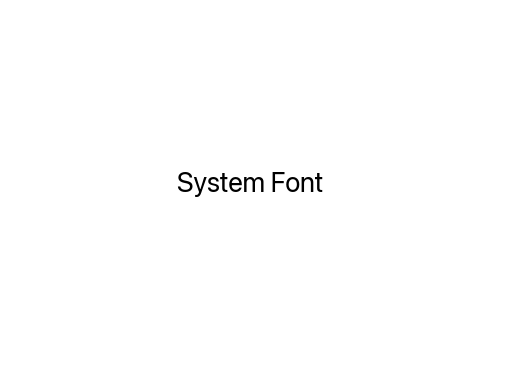

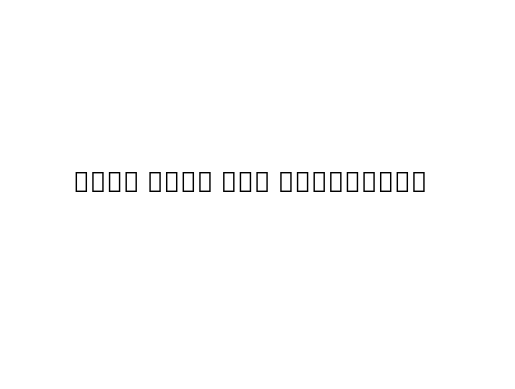

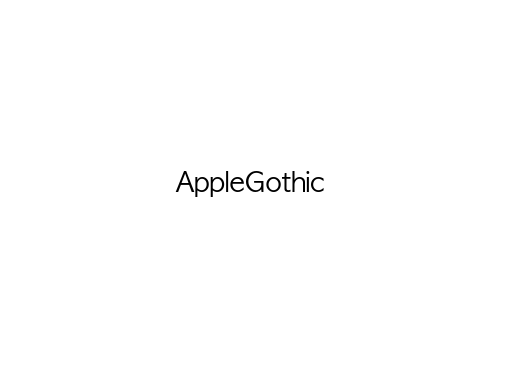

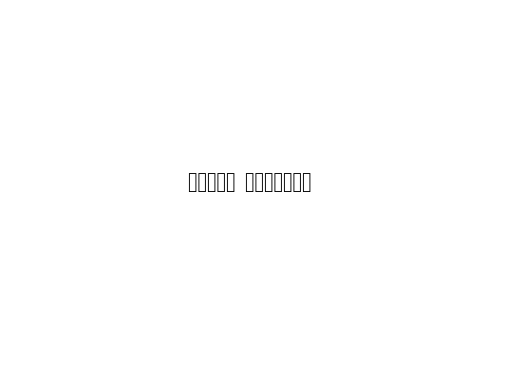

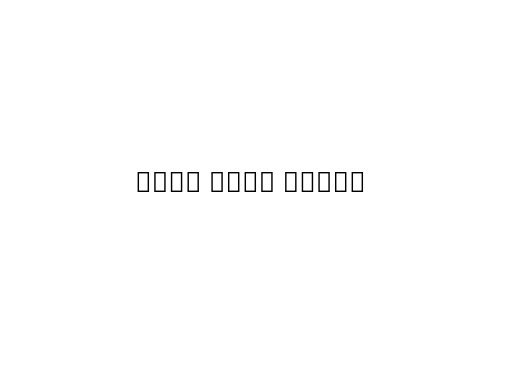

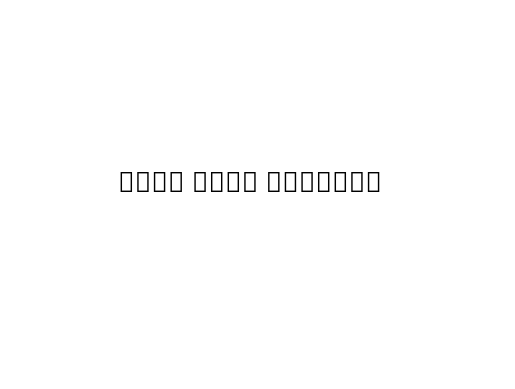

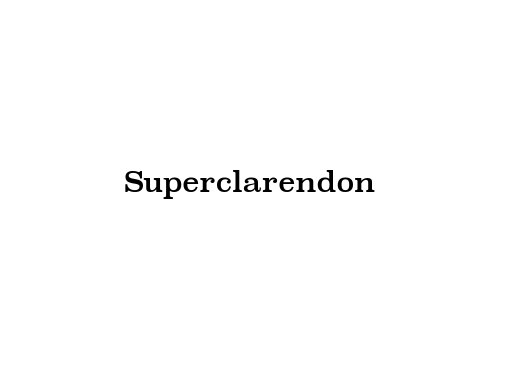

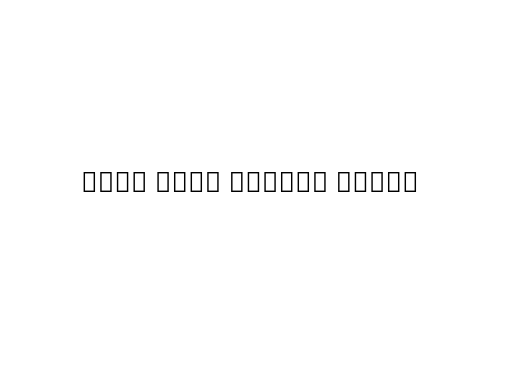

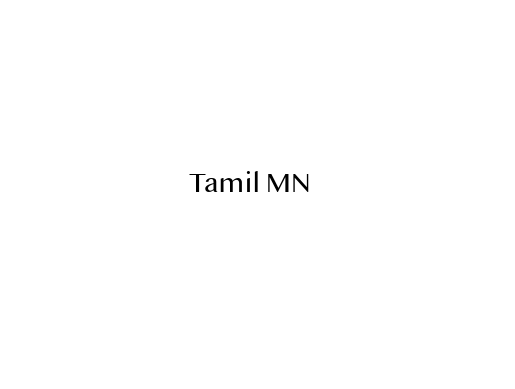

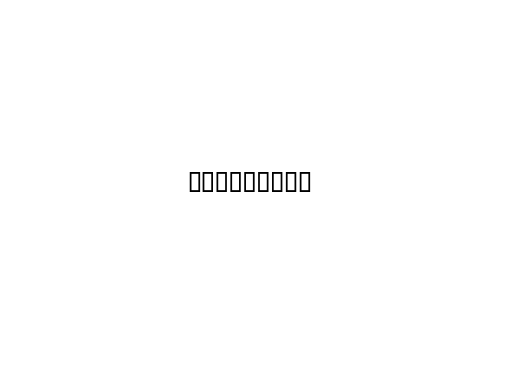

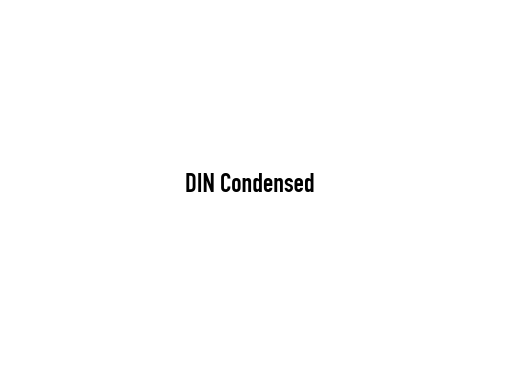

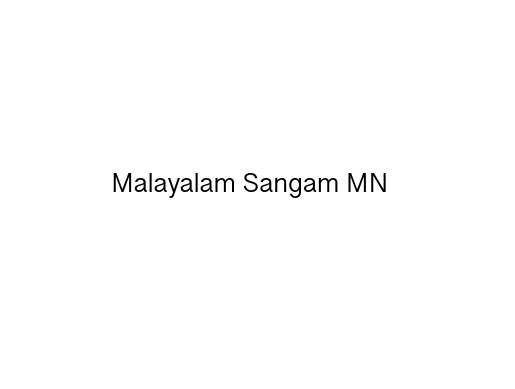

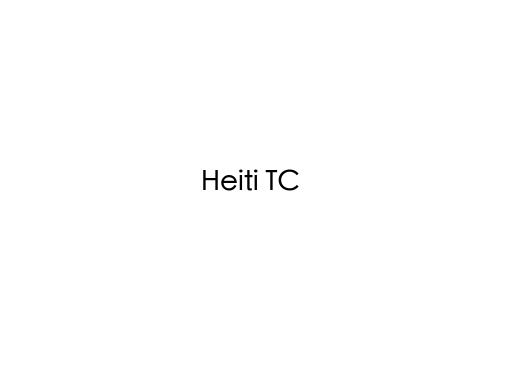

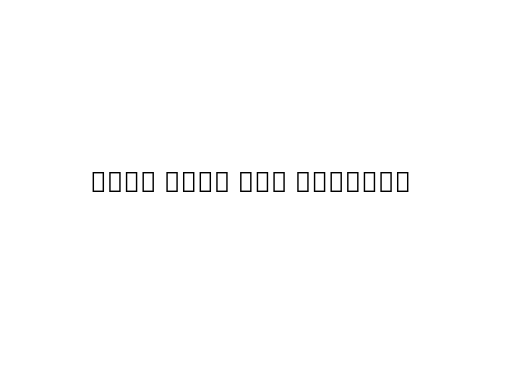

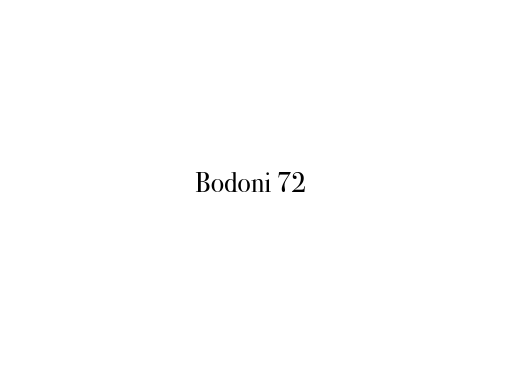

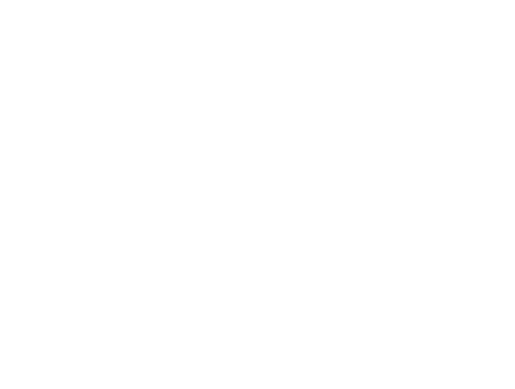

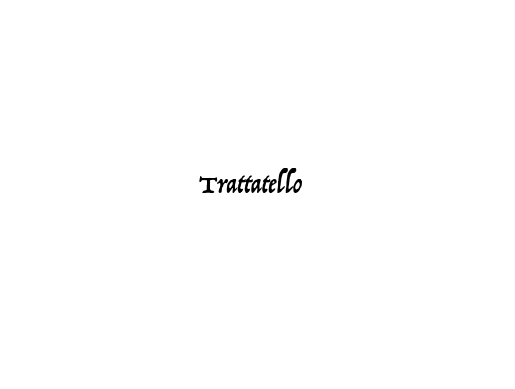

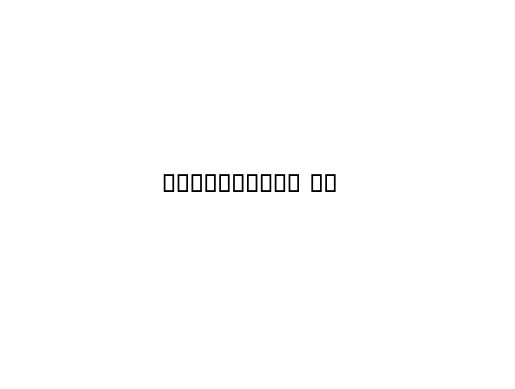

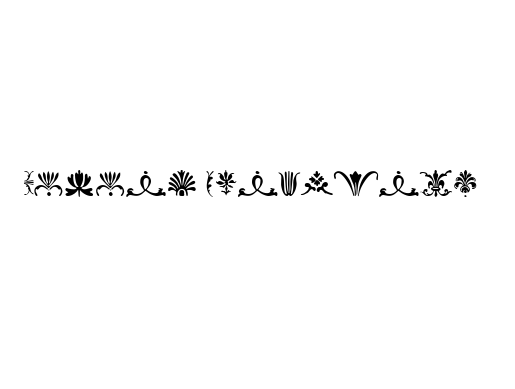

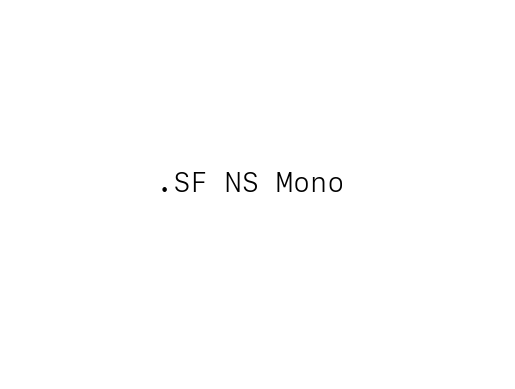

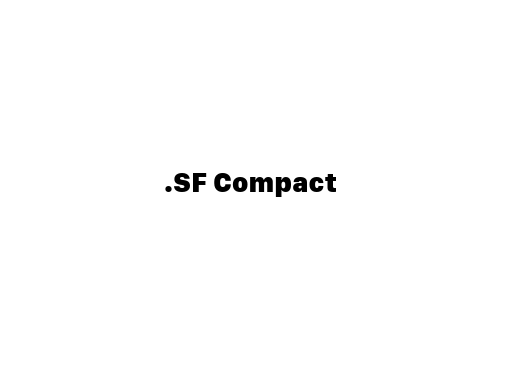

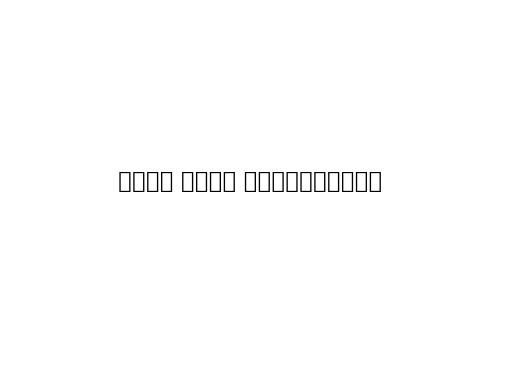

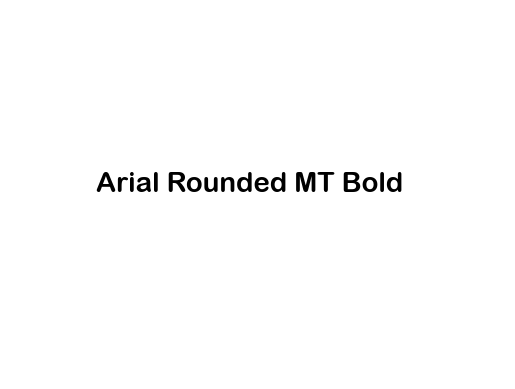

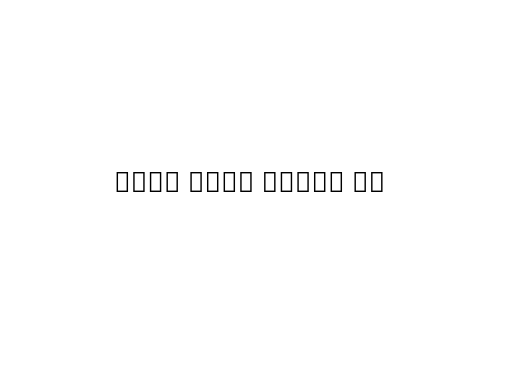

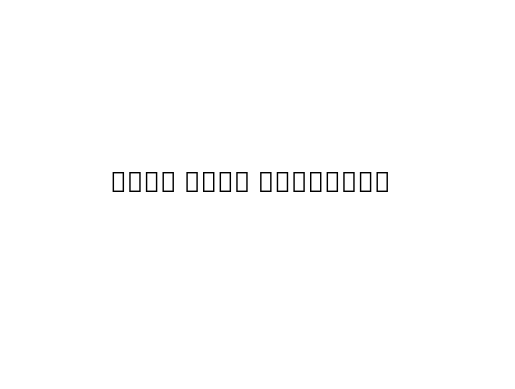

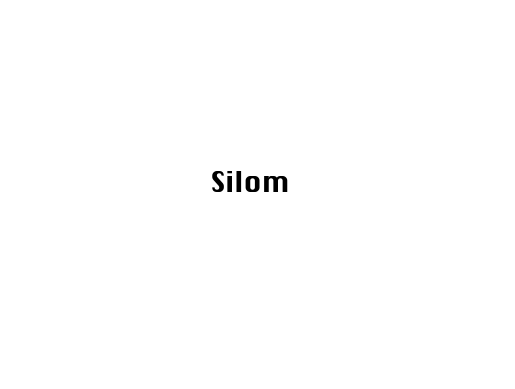

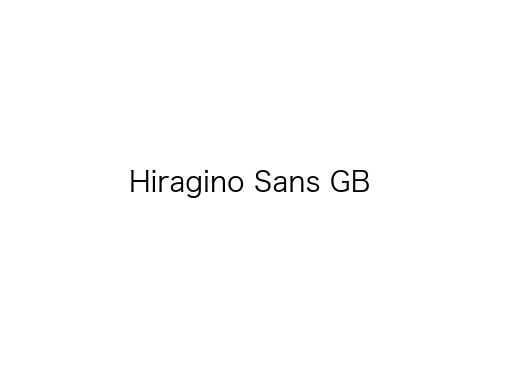

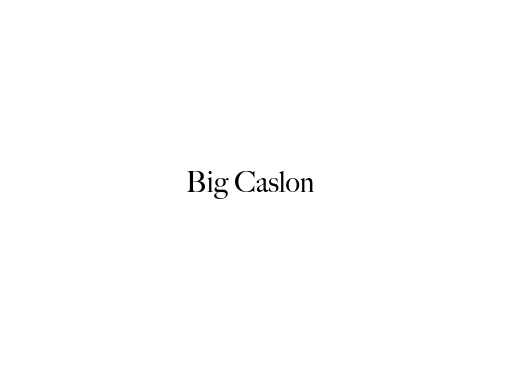

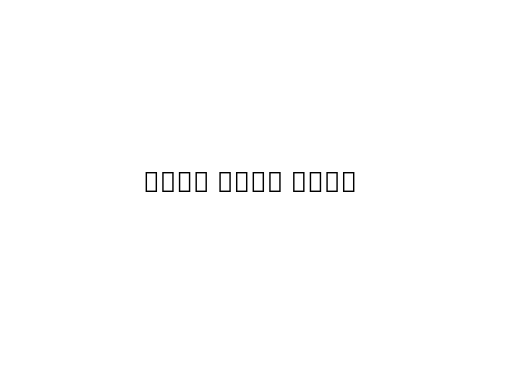

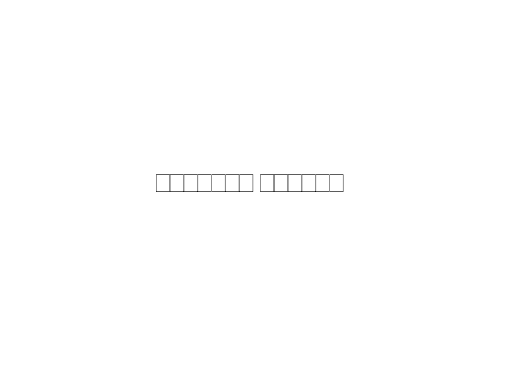

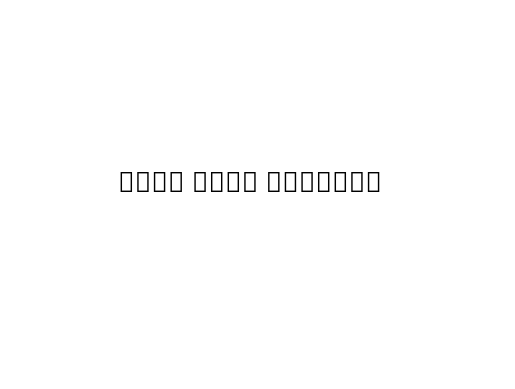

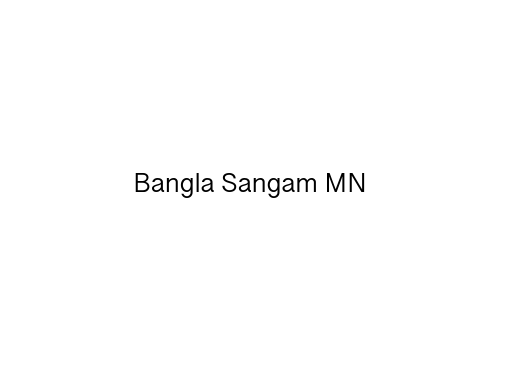

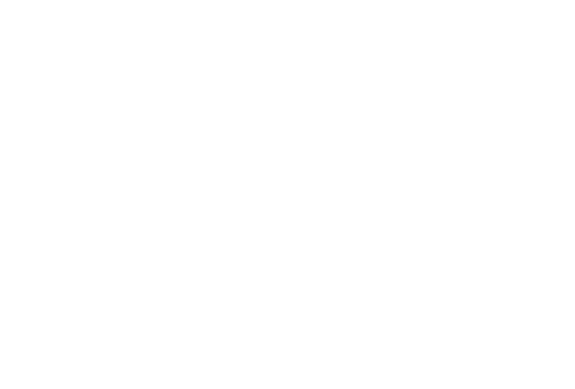

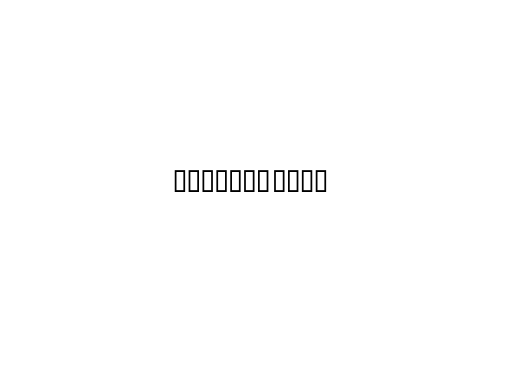

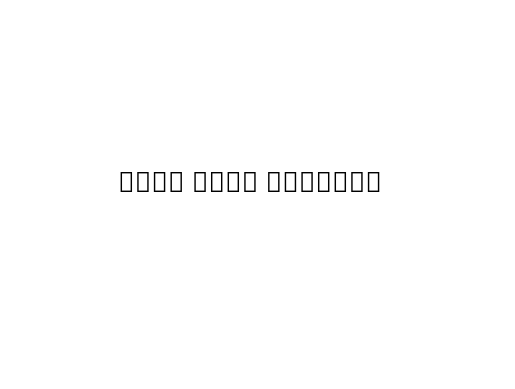

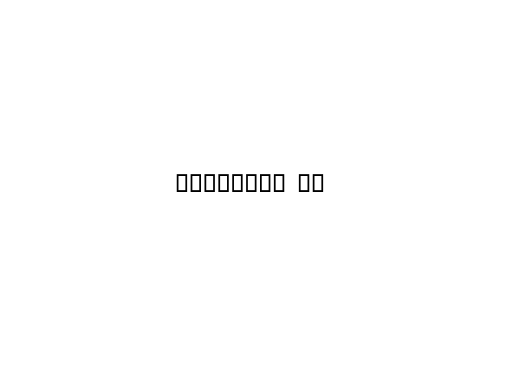

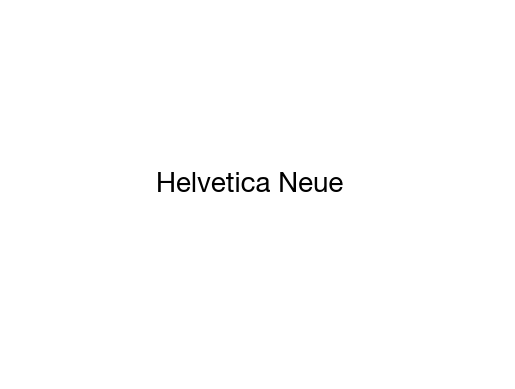

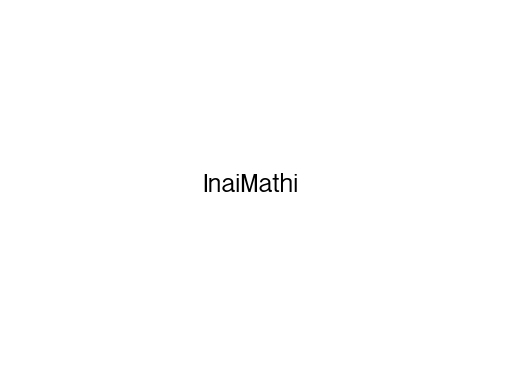

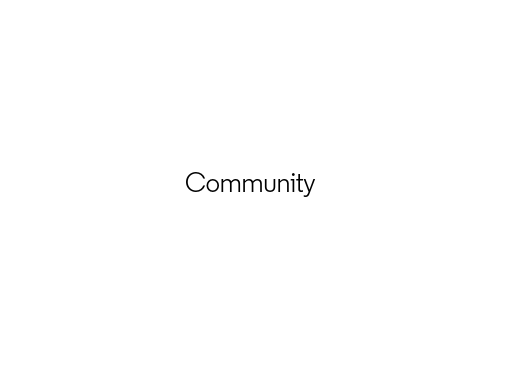

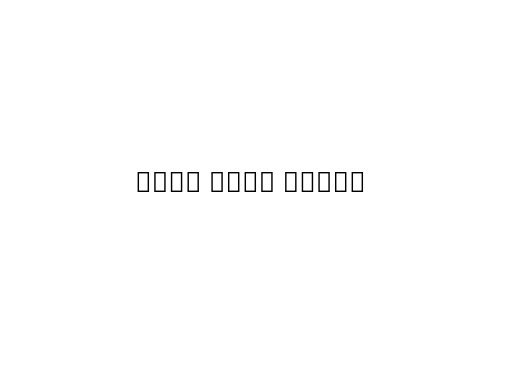

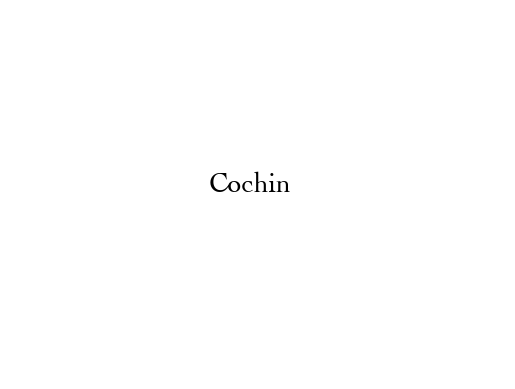

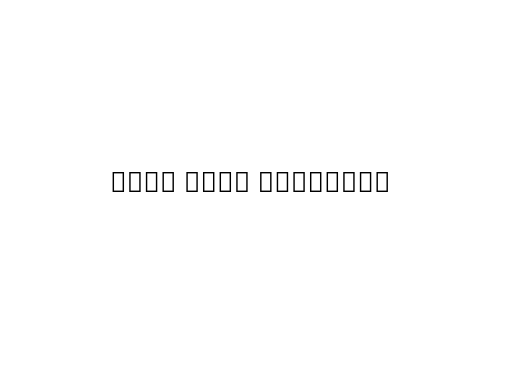

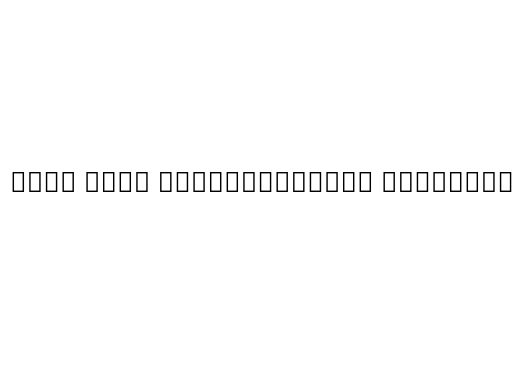

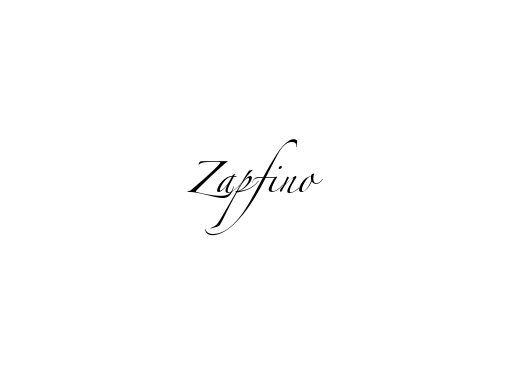

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51 (3) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


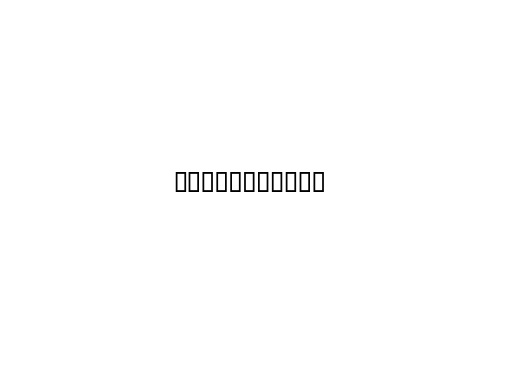

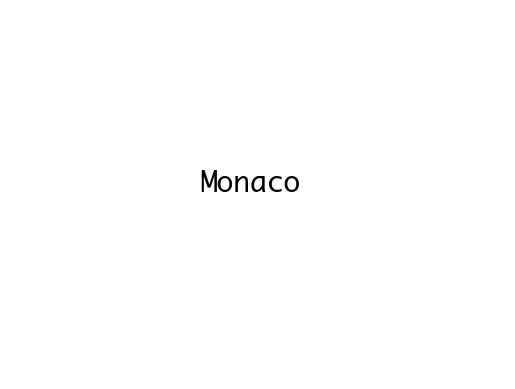

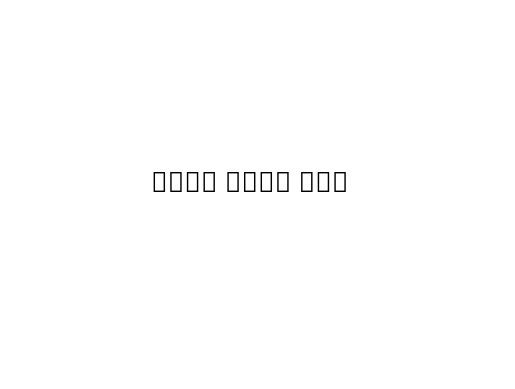

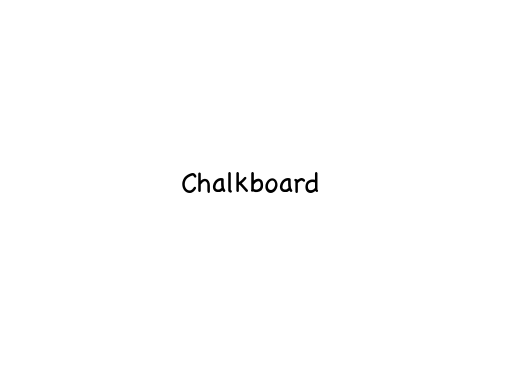

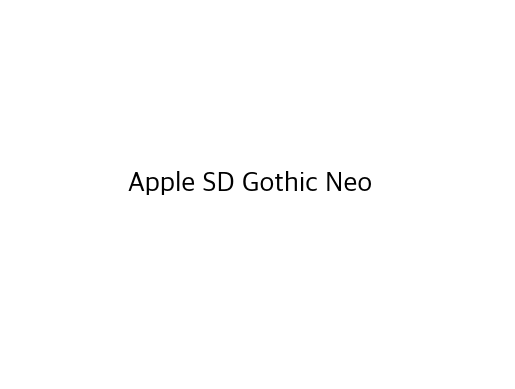

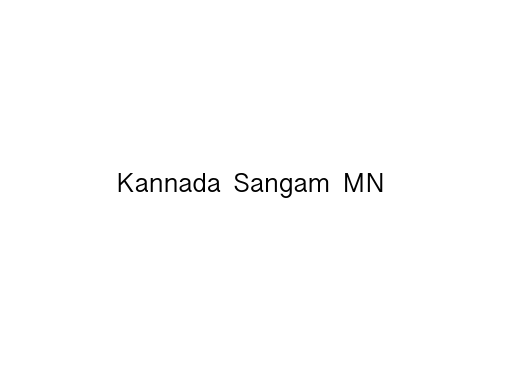

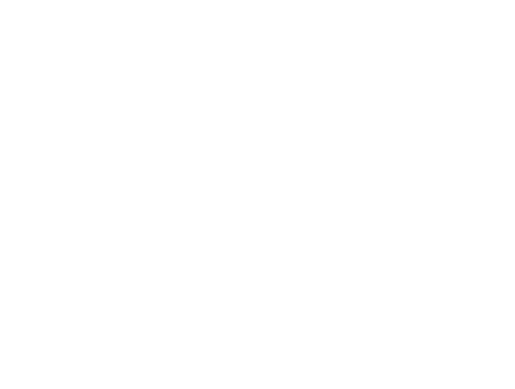

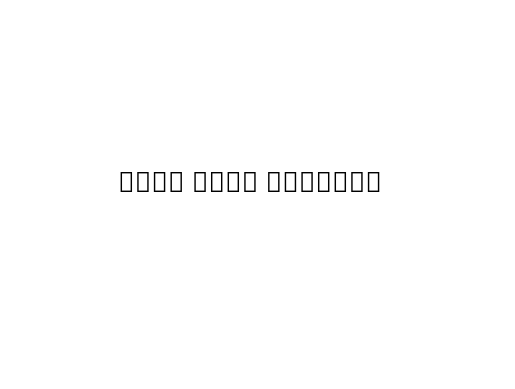

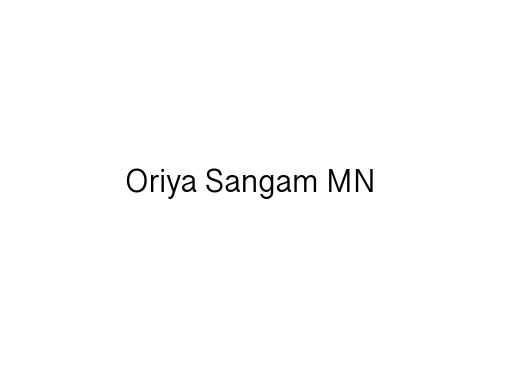

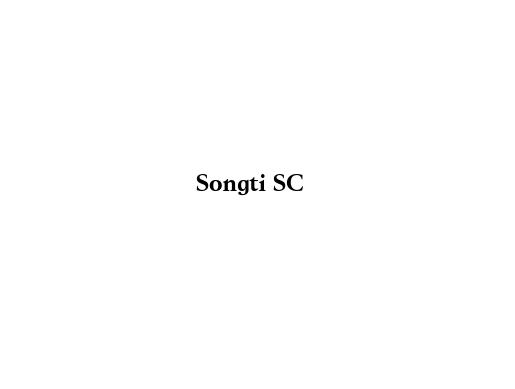

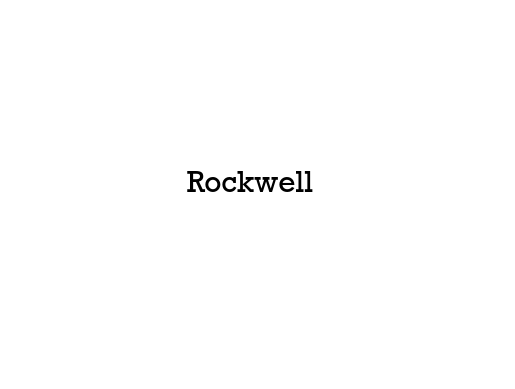

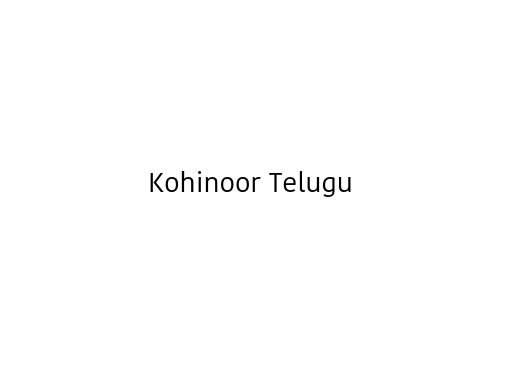

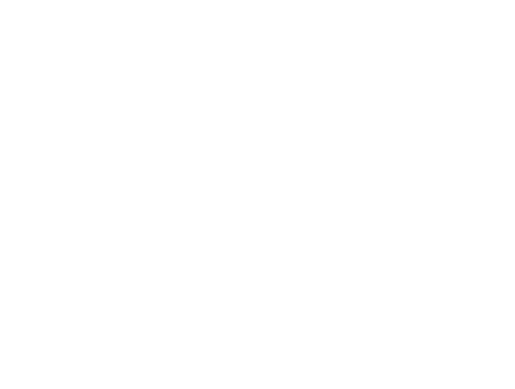

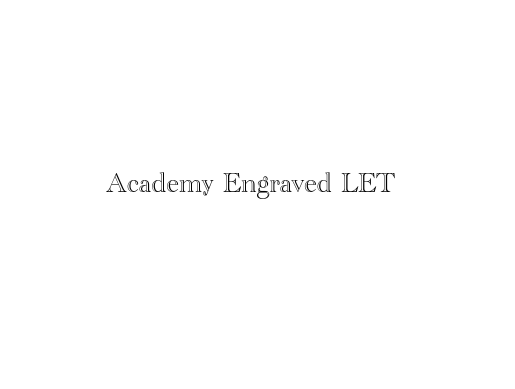

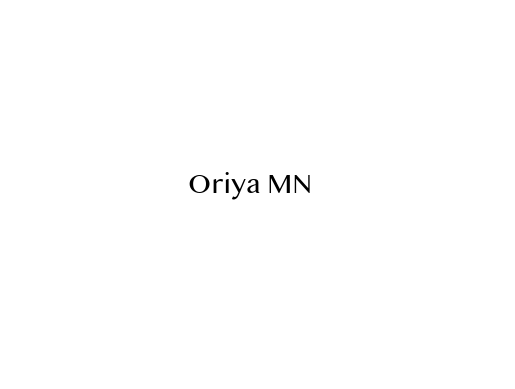

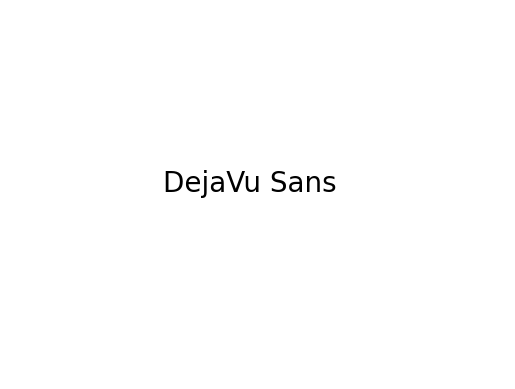

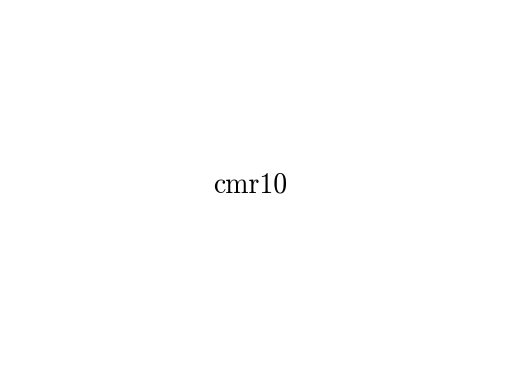

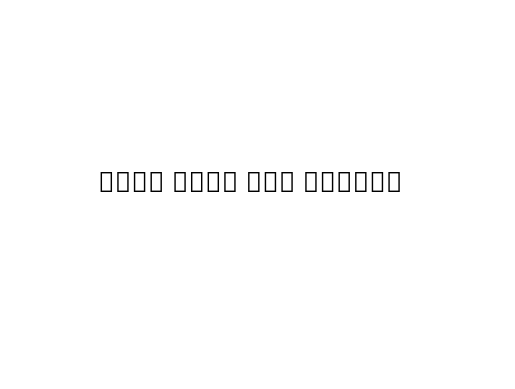

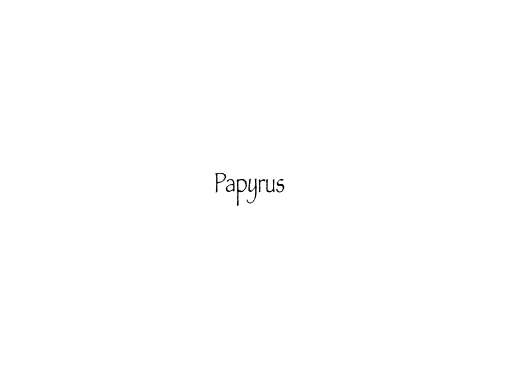

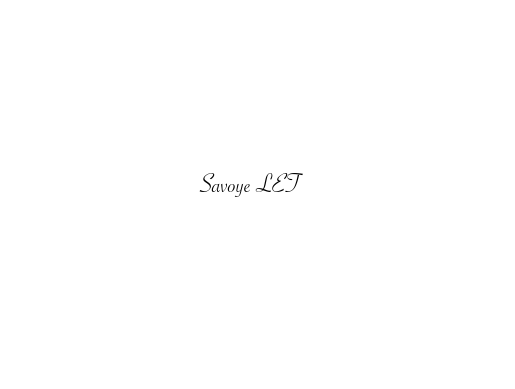

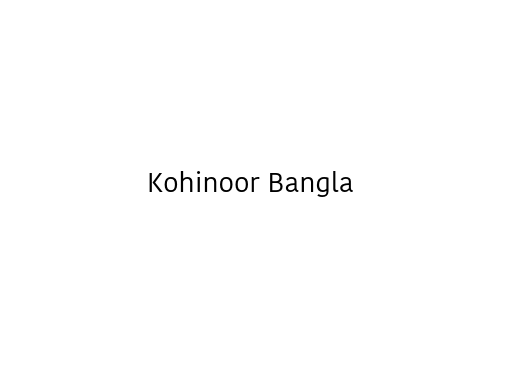

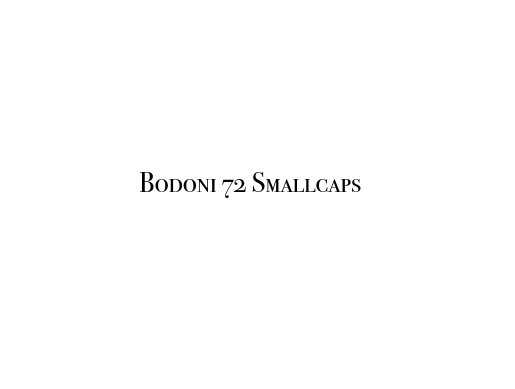

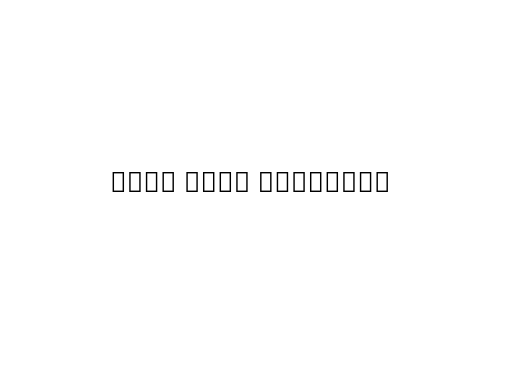

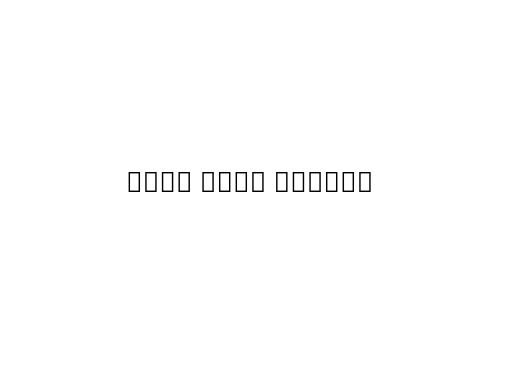

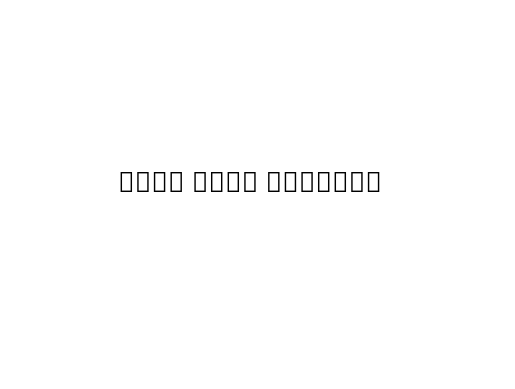

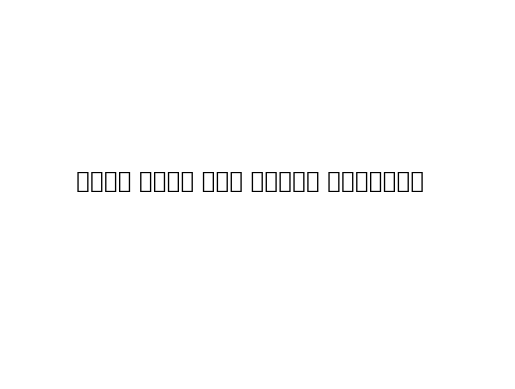

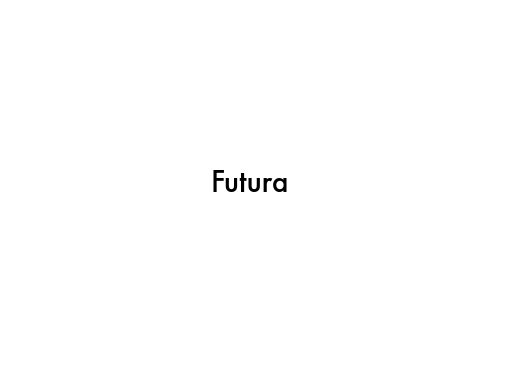

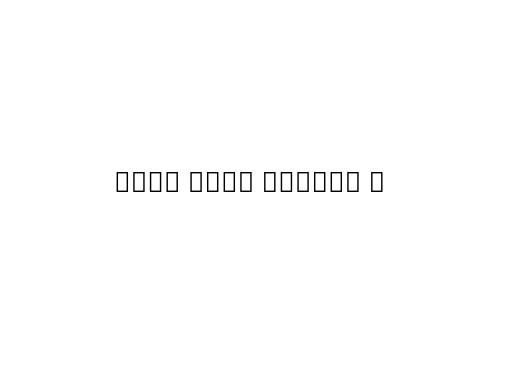

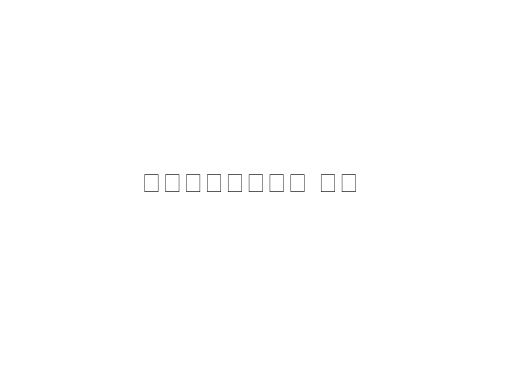

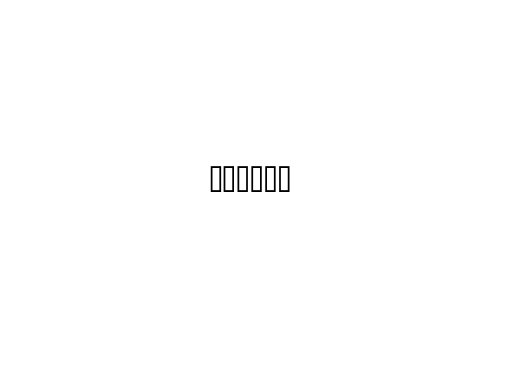

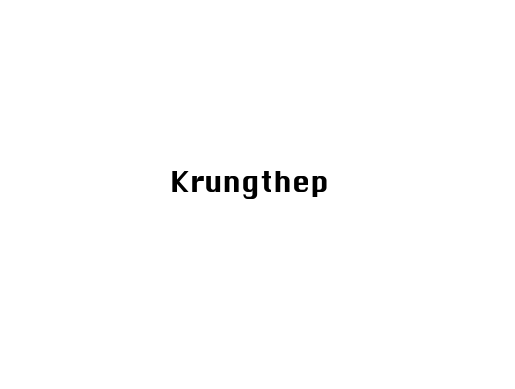

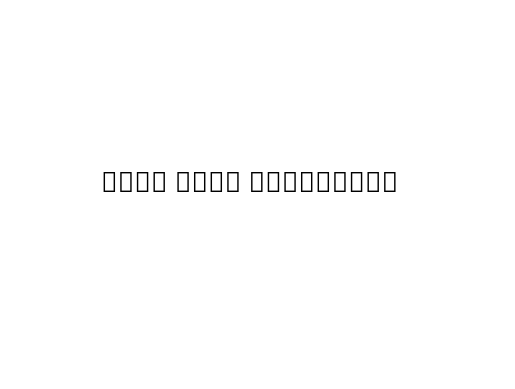

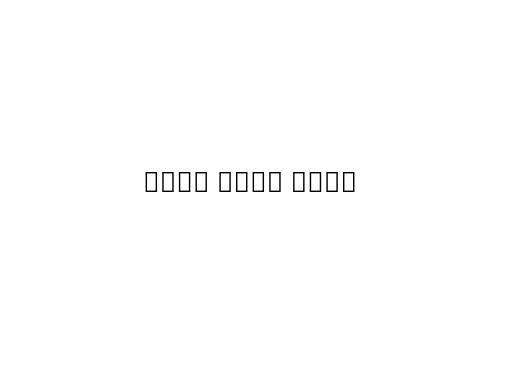

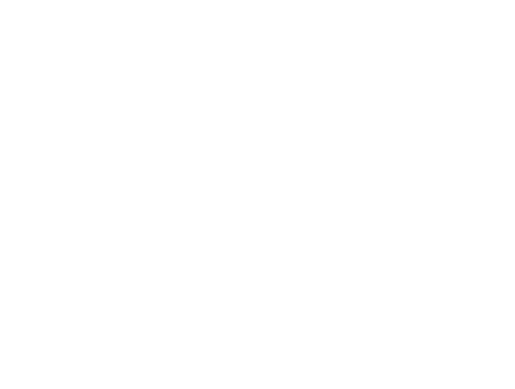

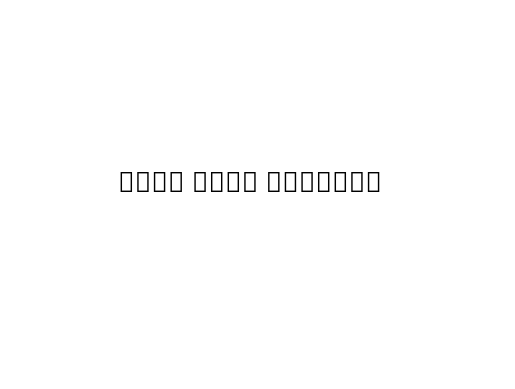

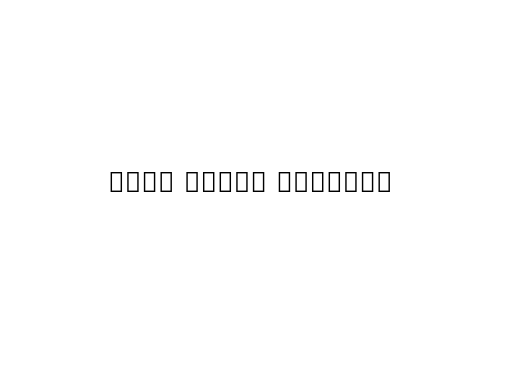

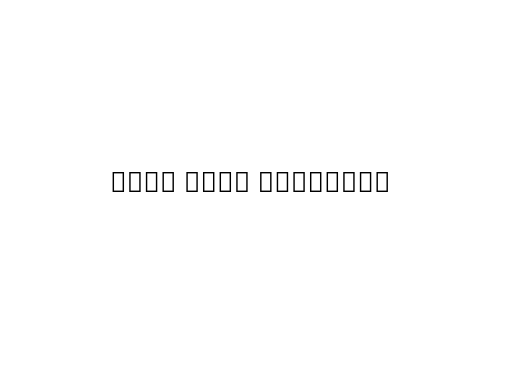

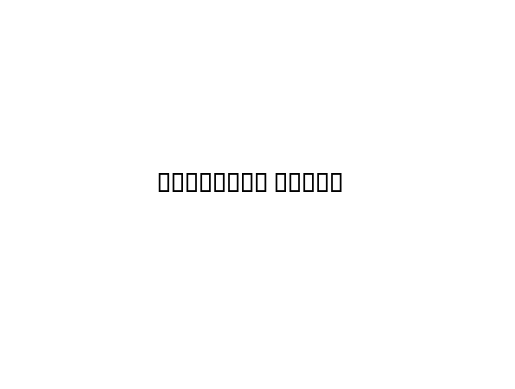

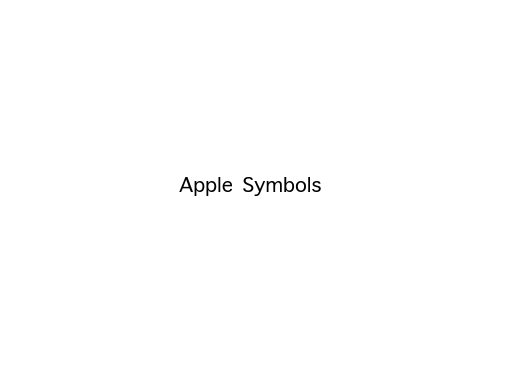

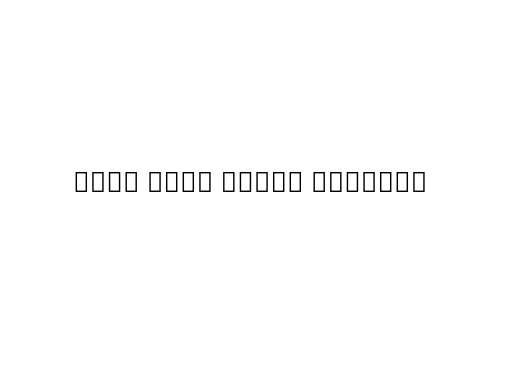

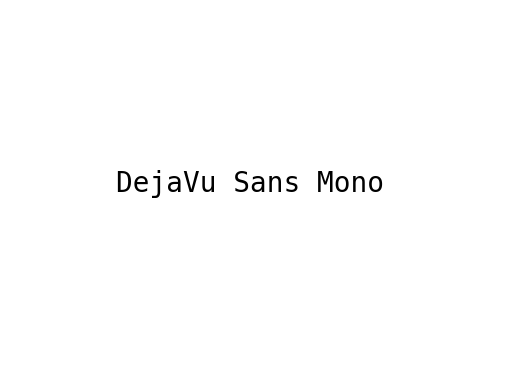

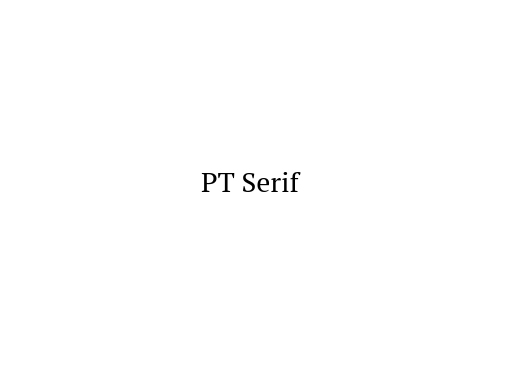

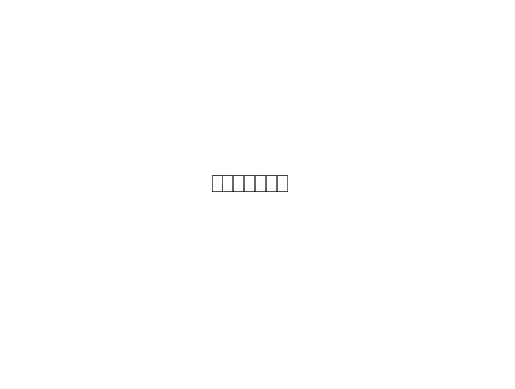

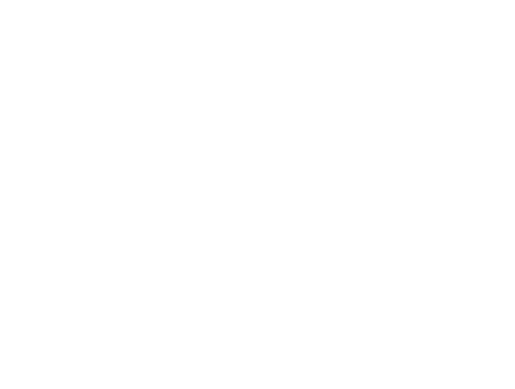

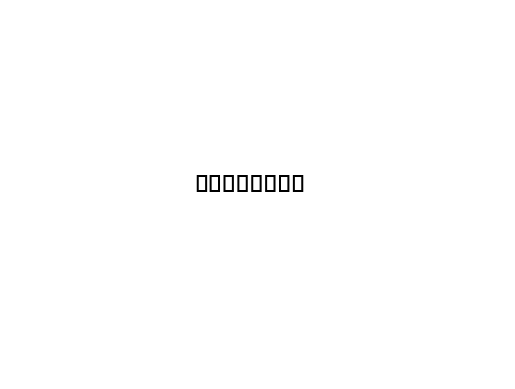

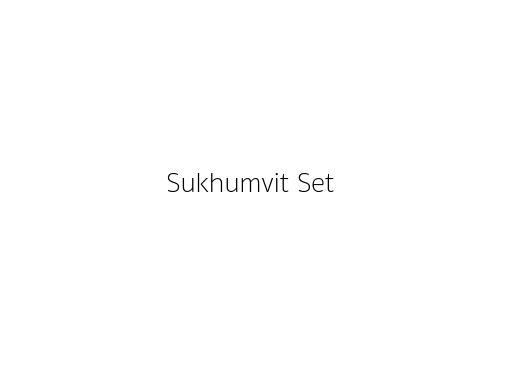

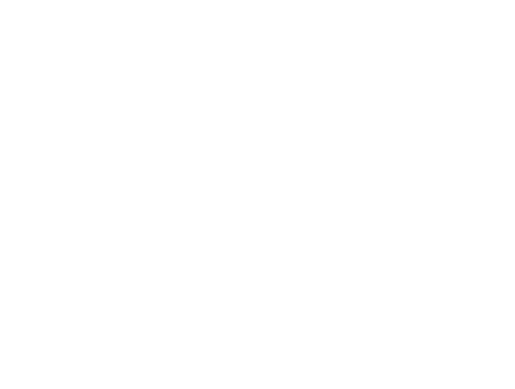

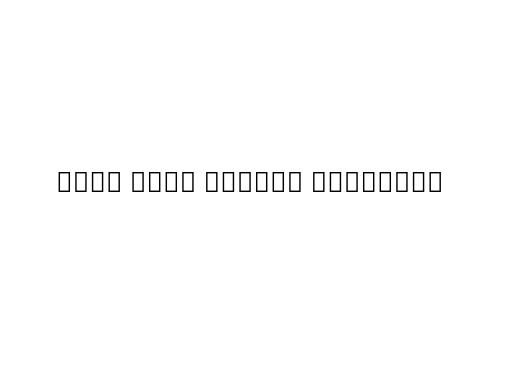

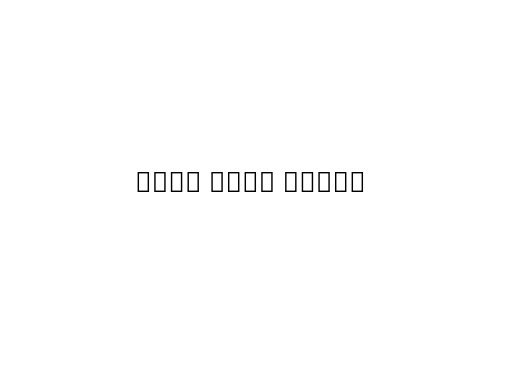

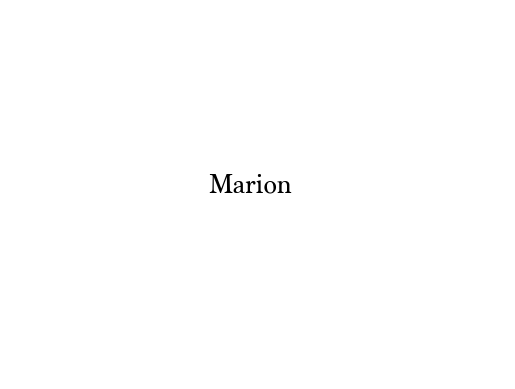

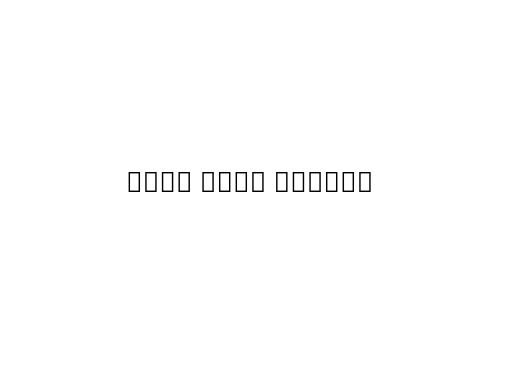

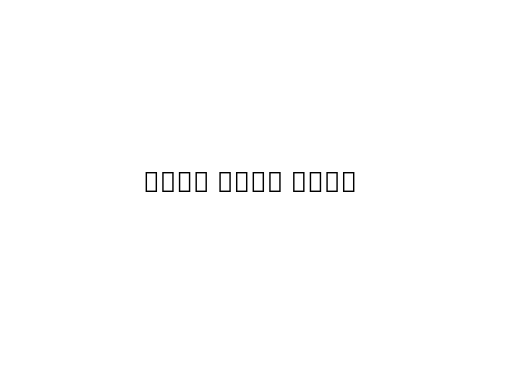

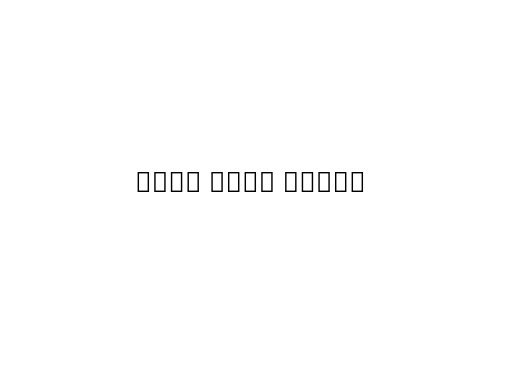

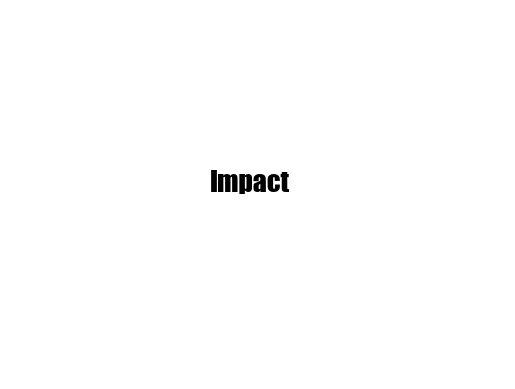

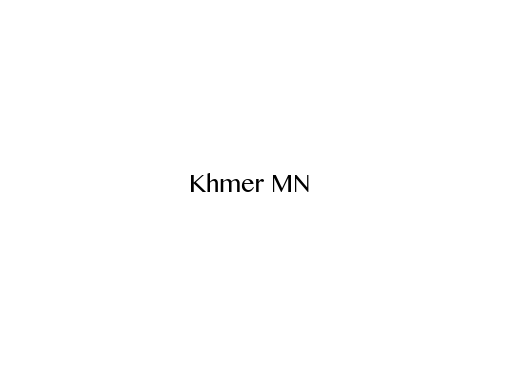

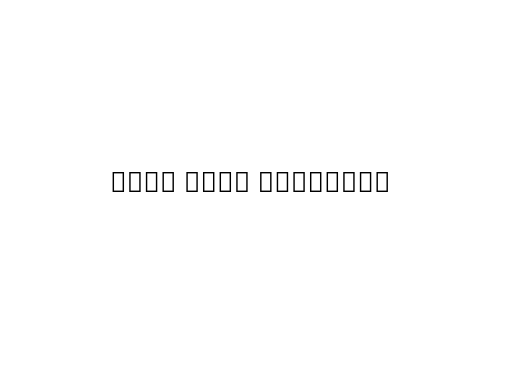

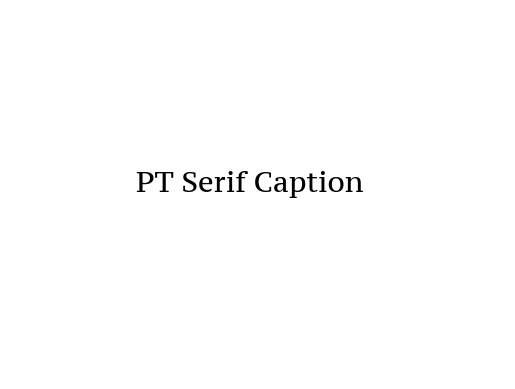

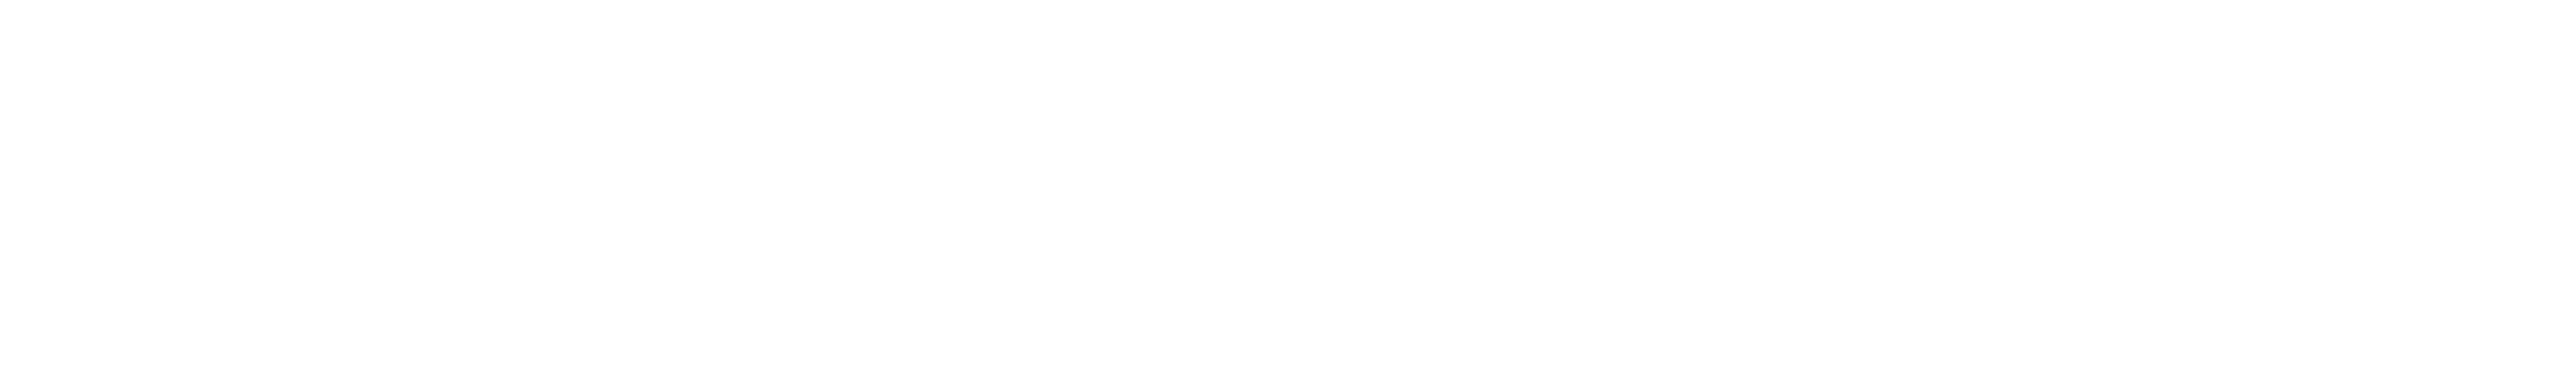

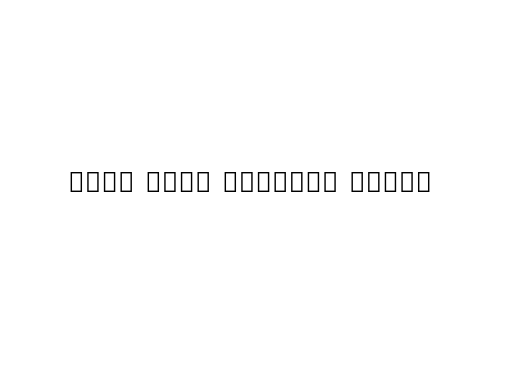

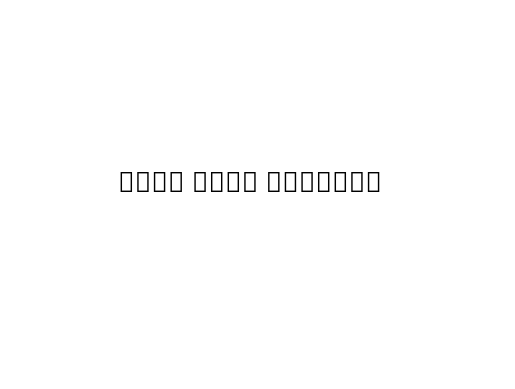

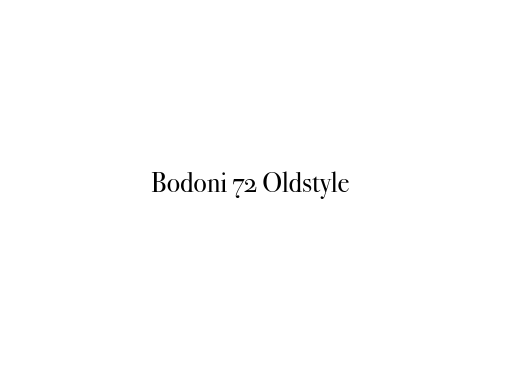

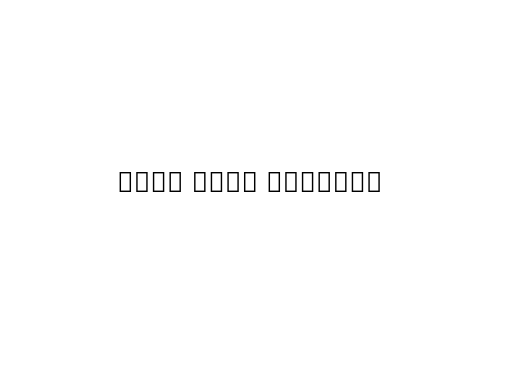

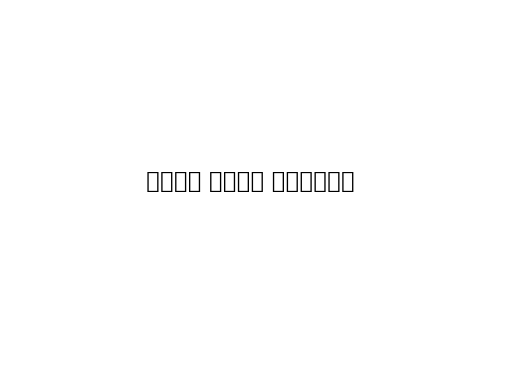

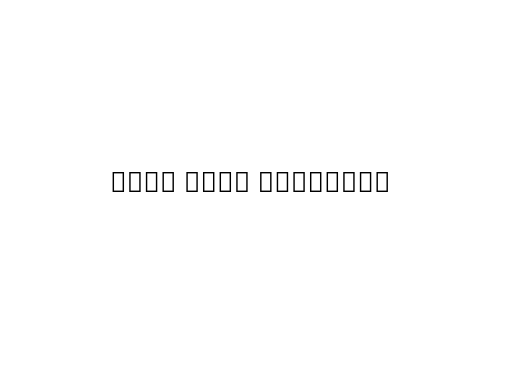

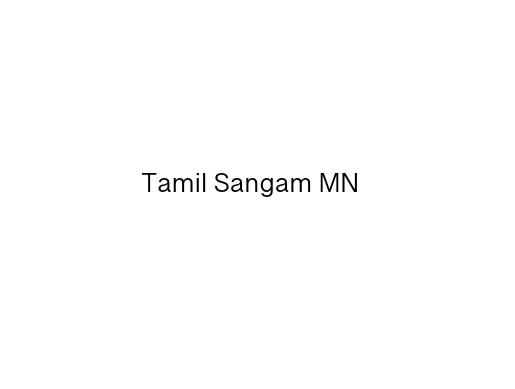

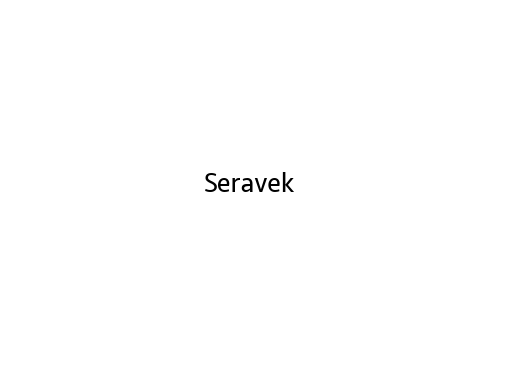

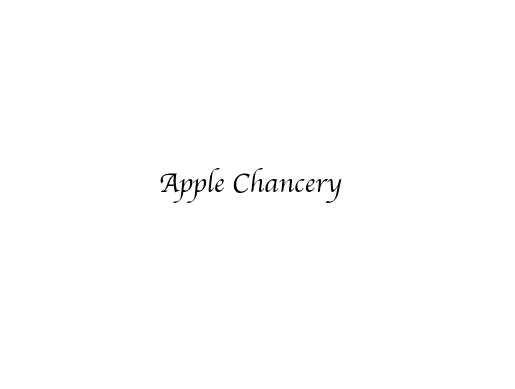

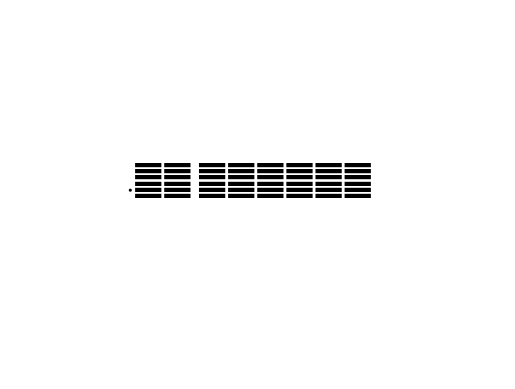

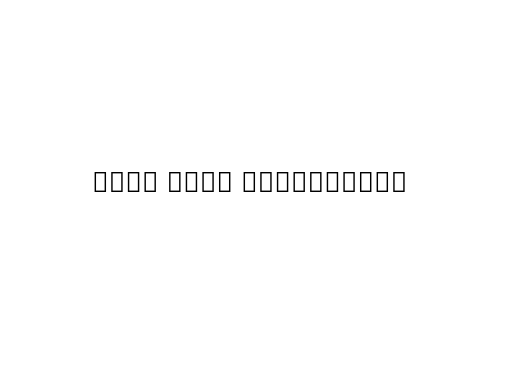

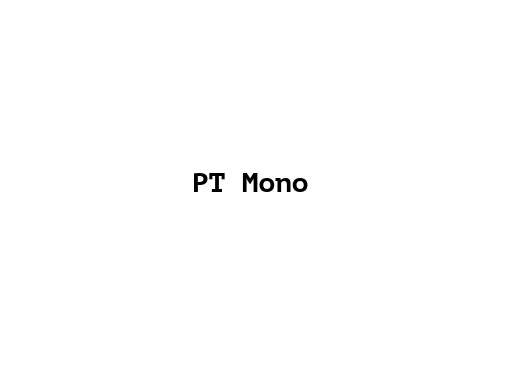

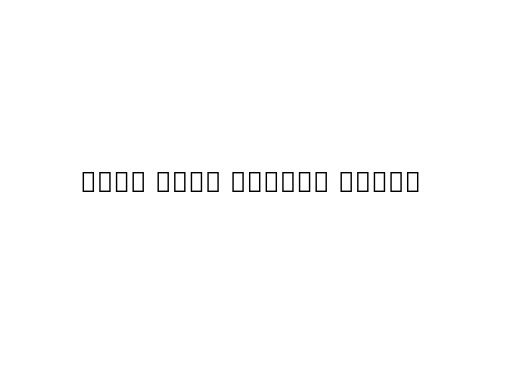

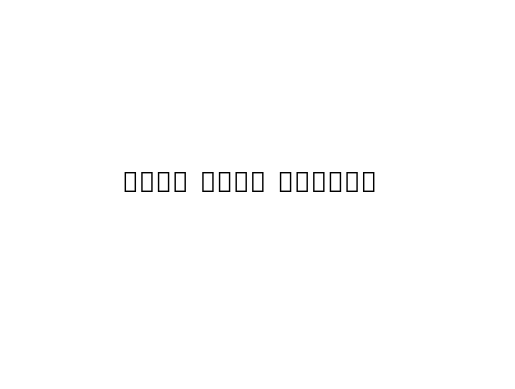

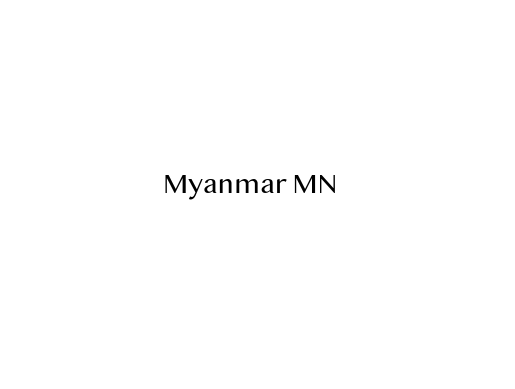

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 113 (q) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


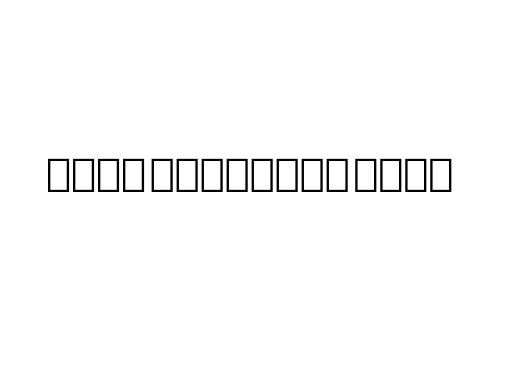

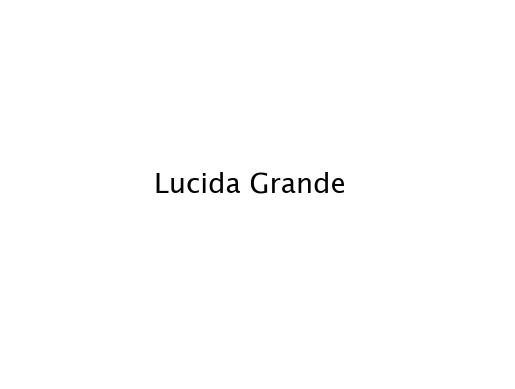

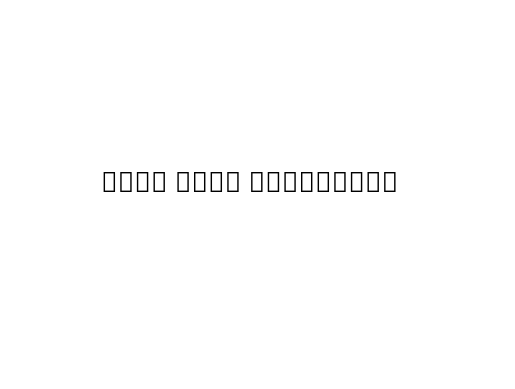

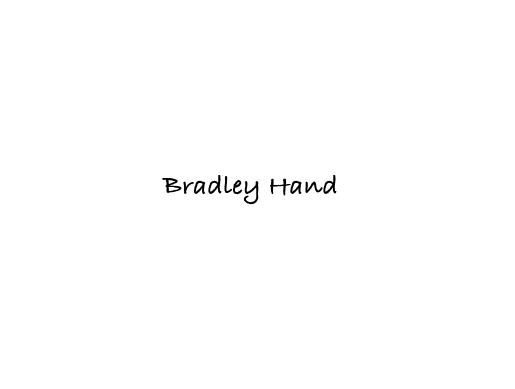

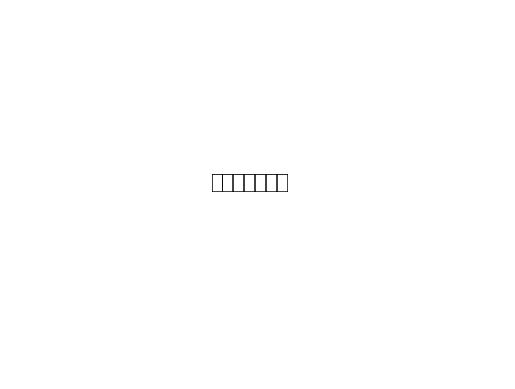

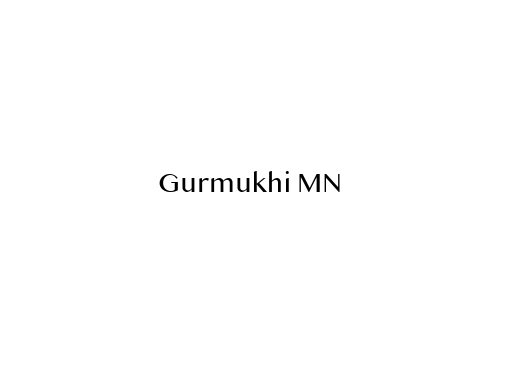

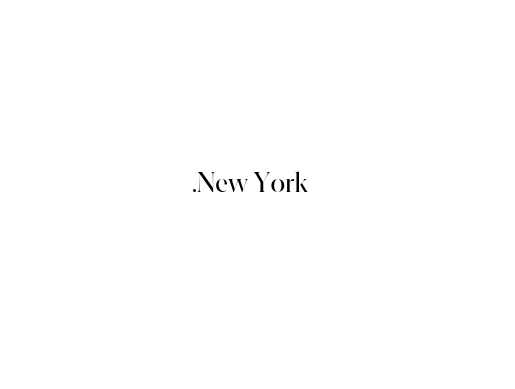

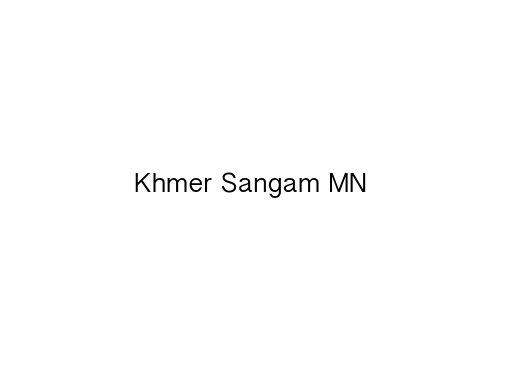

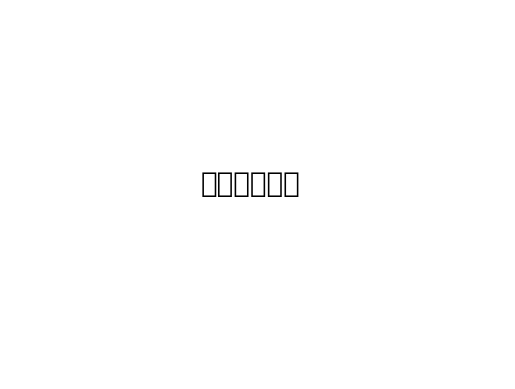

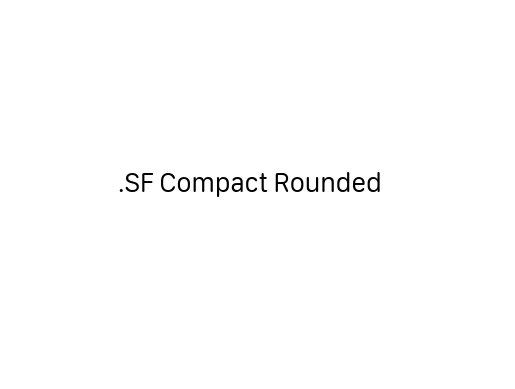

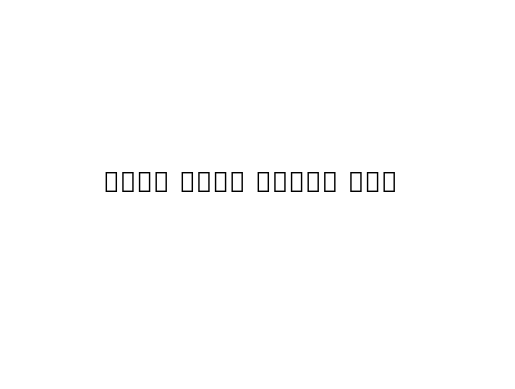

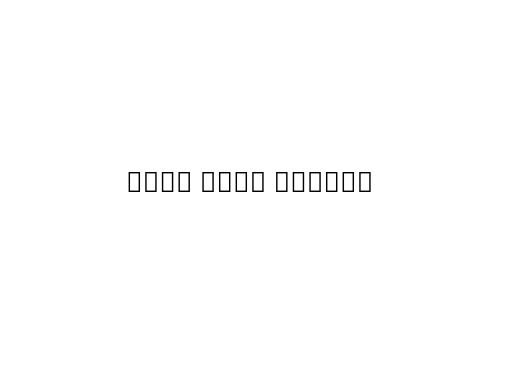

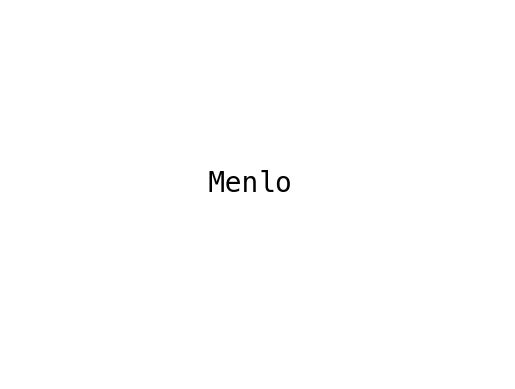

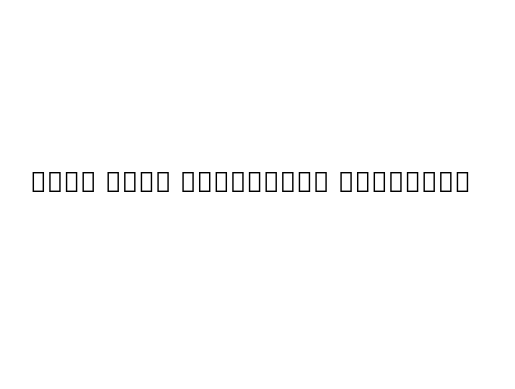

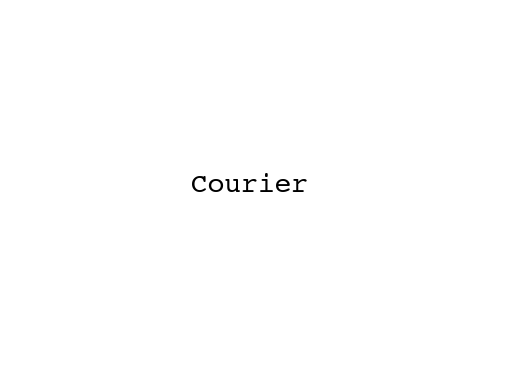

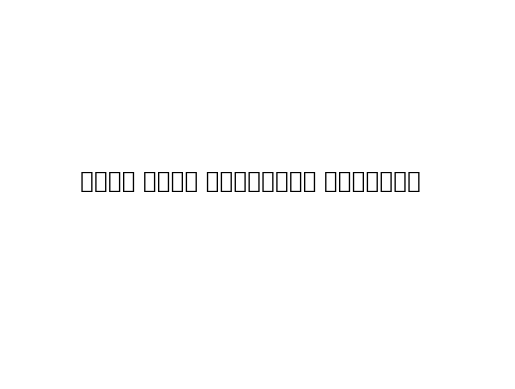

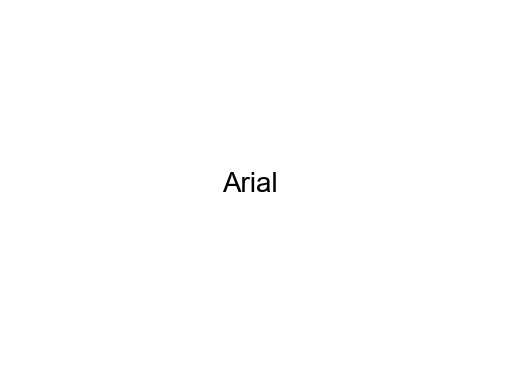

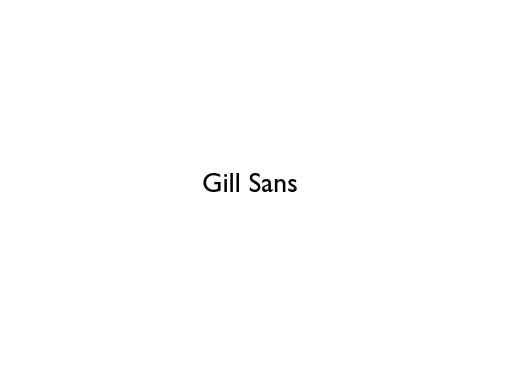

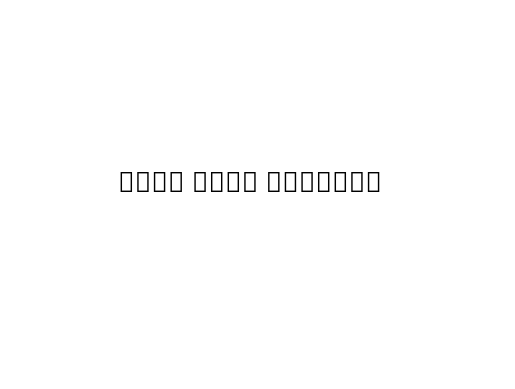

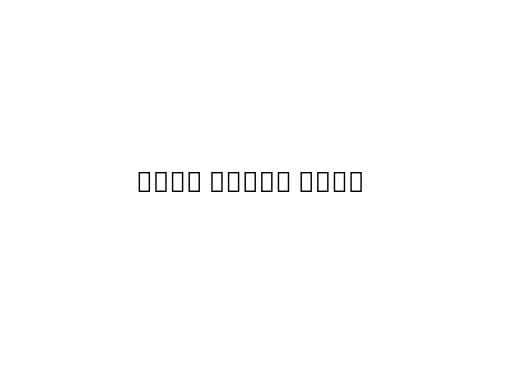

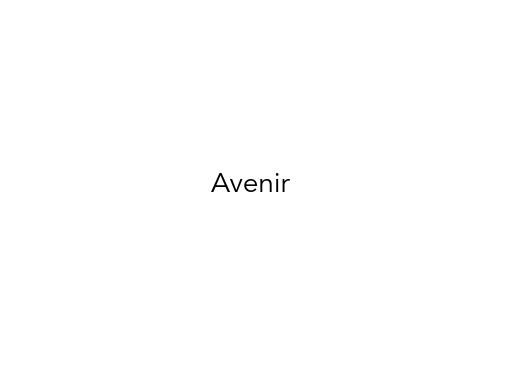

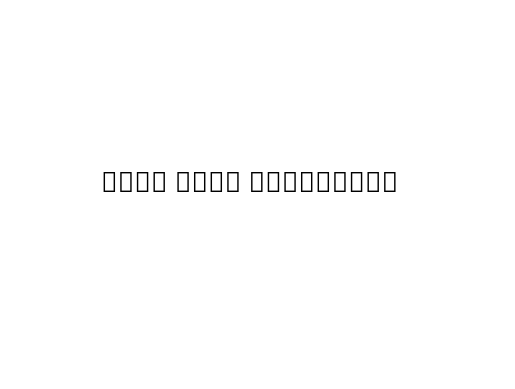

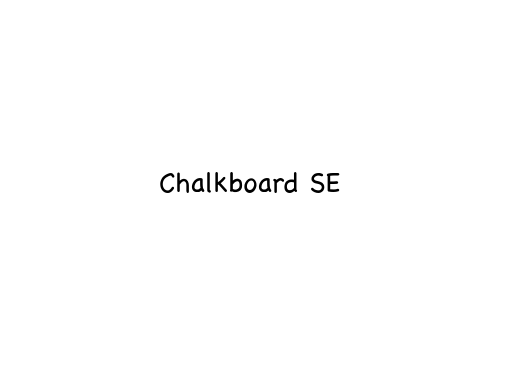

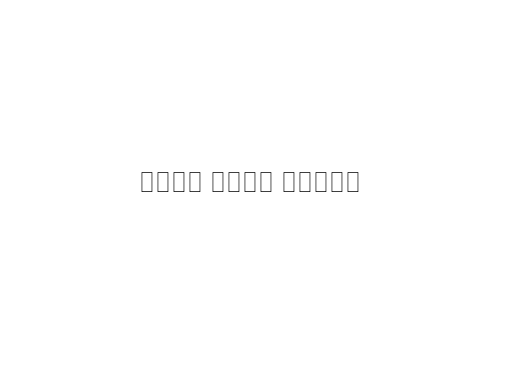

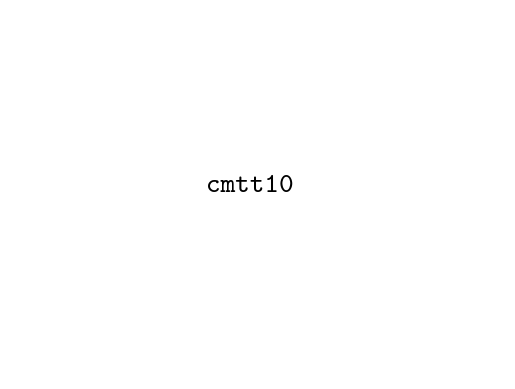

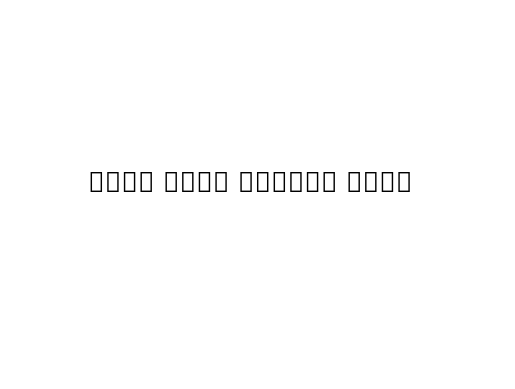

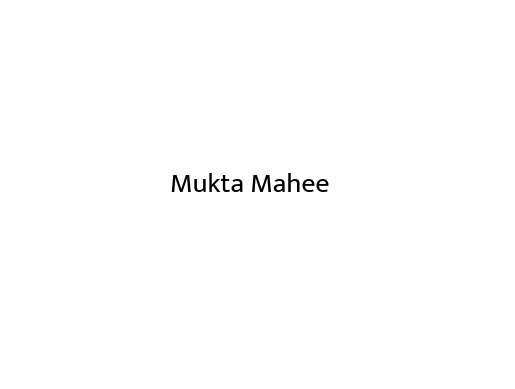

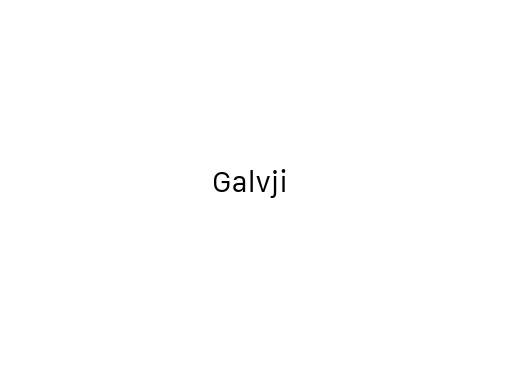

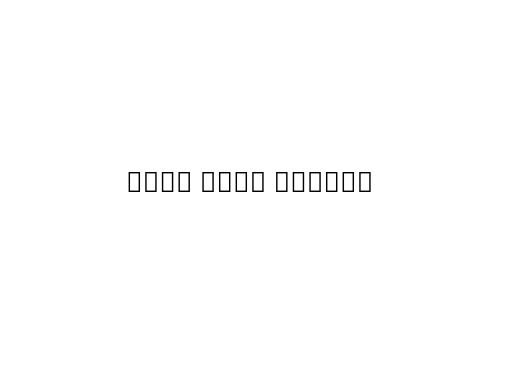

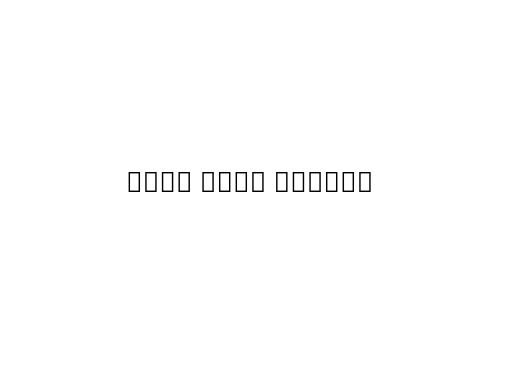

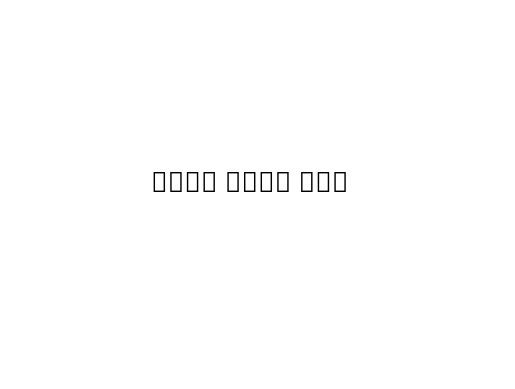

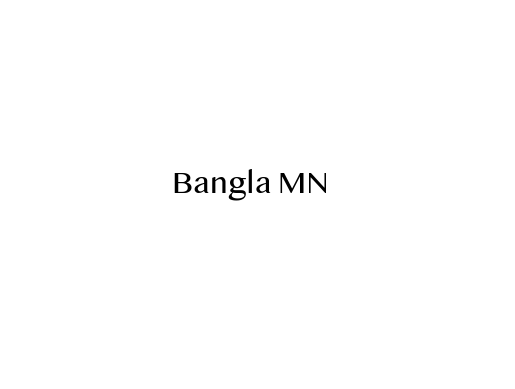

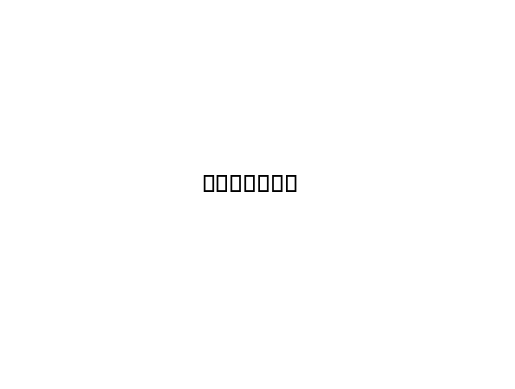

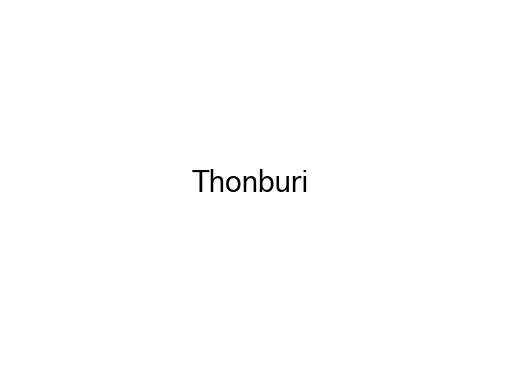

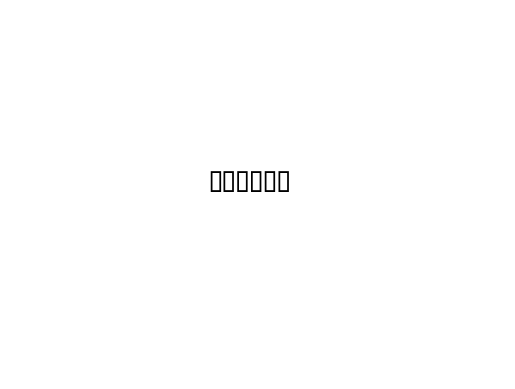

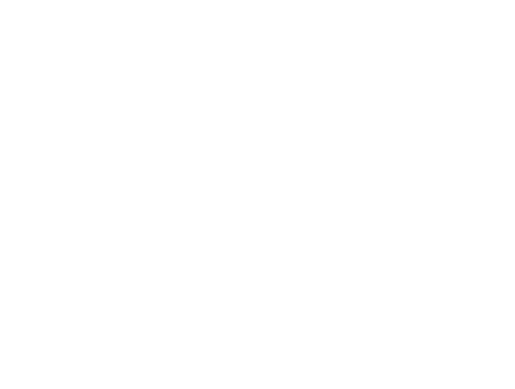

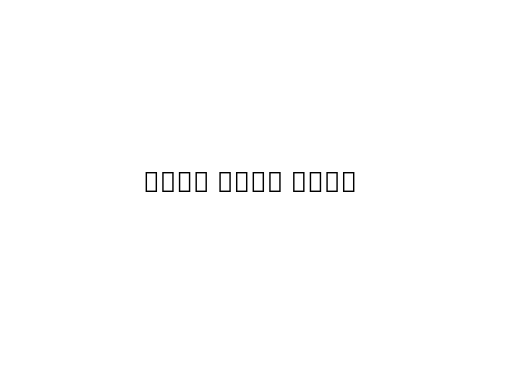

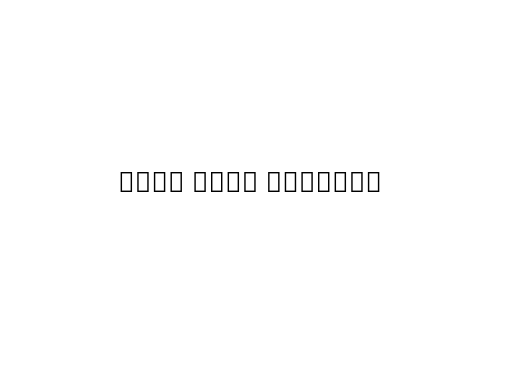

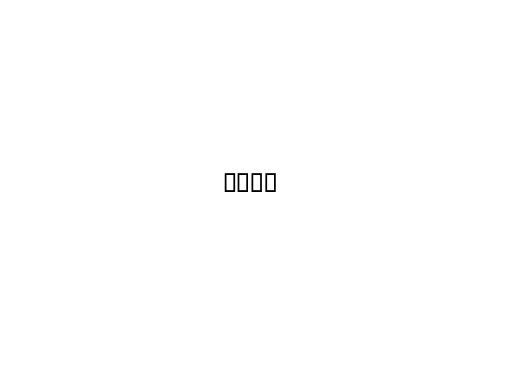

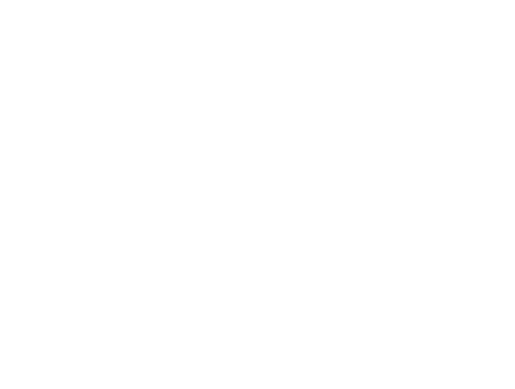

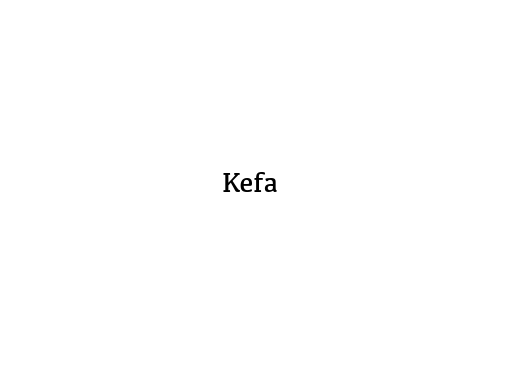

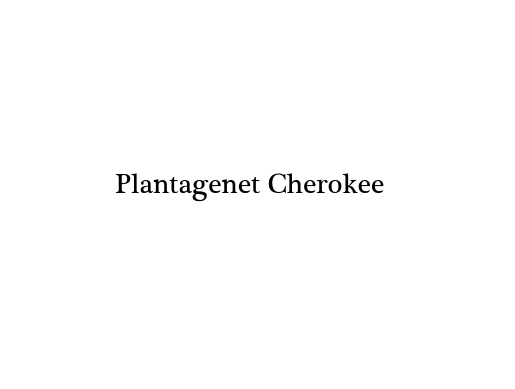

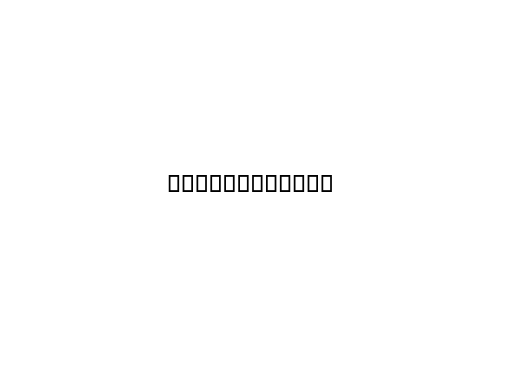

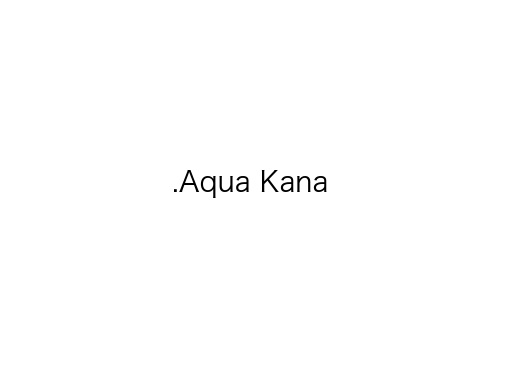

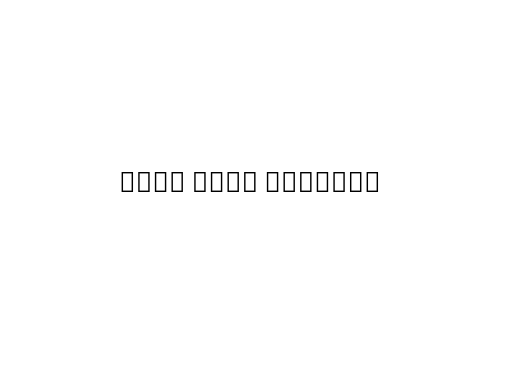

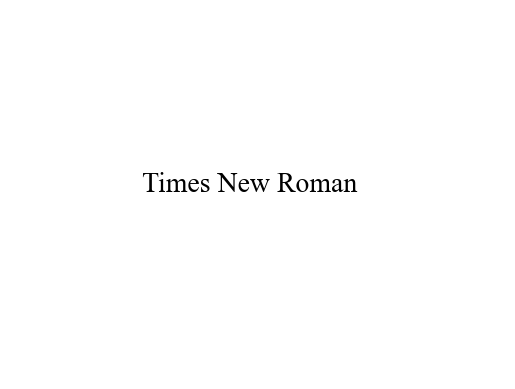

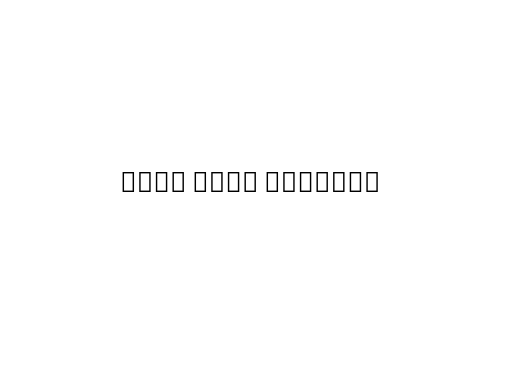

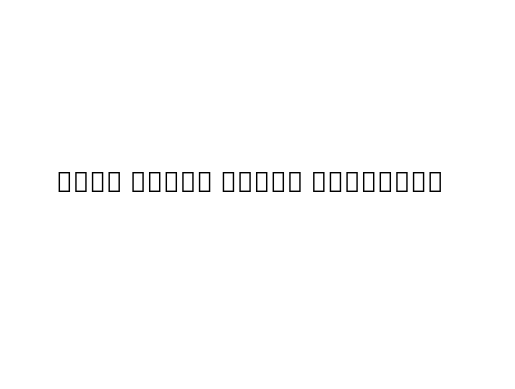

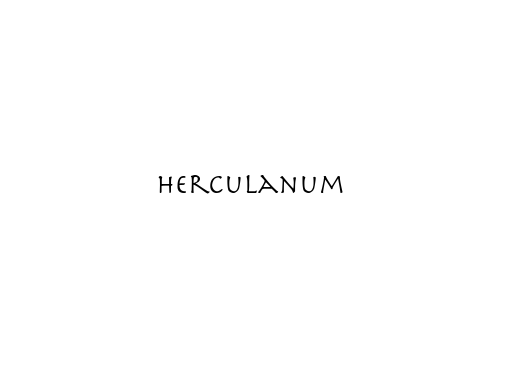

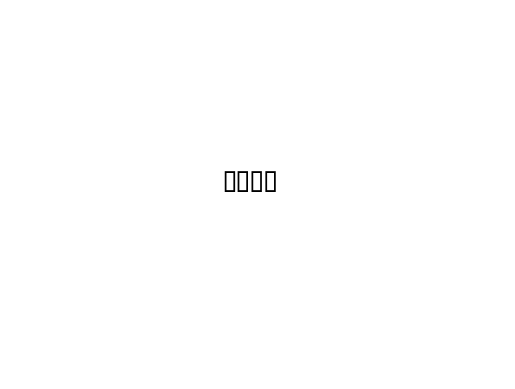

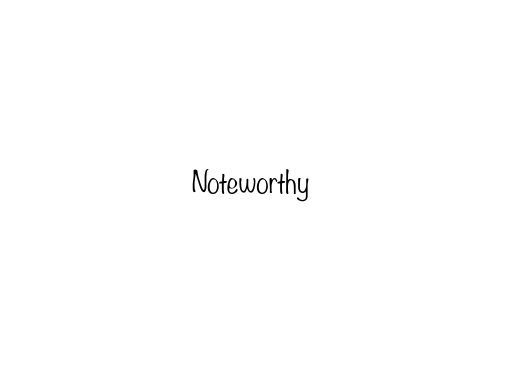

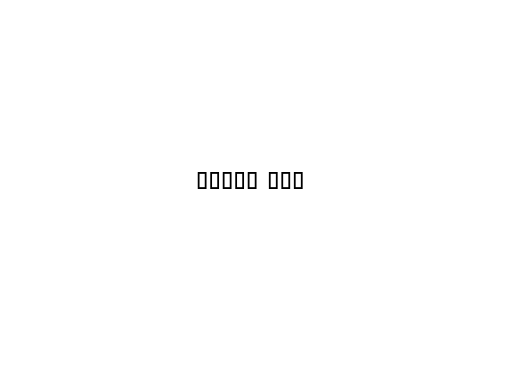

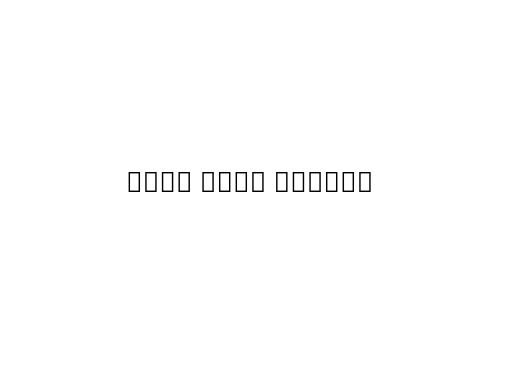

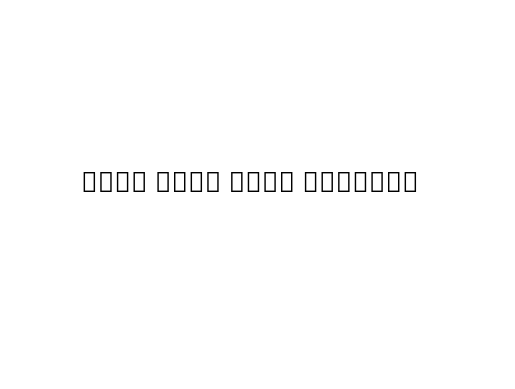

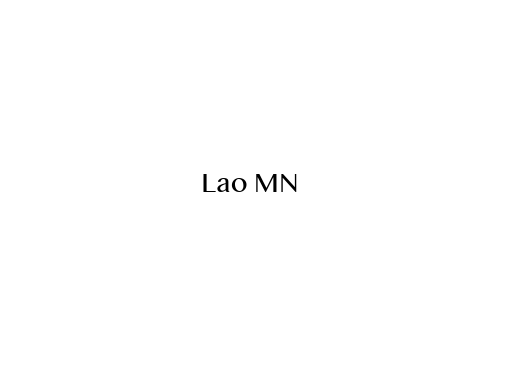

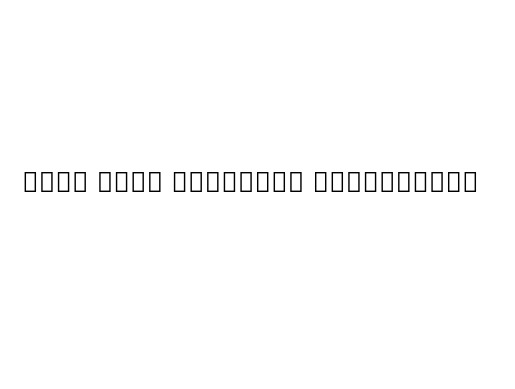

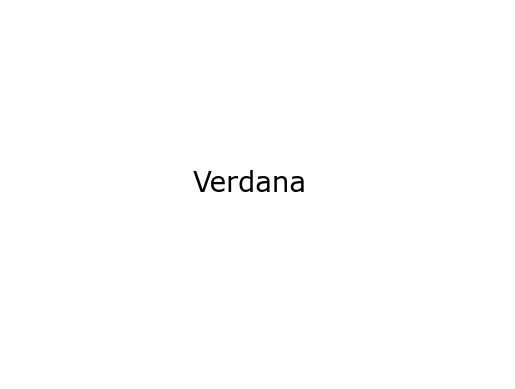

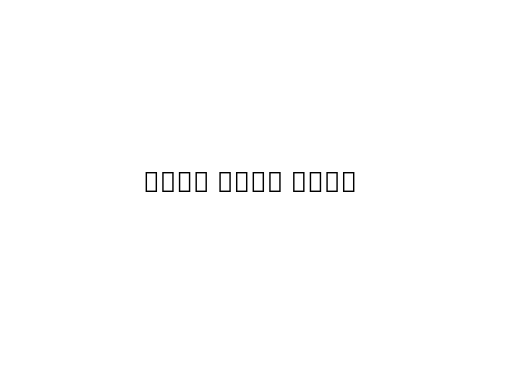

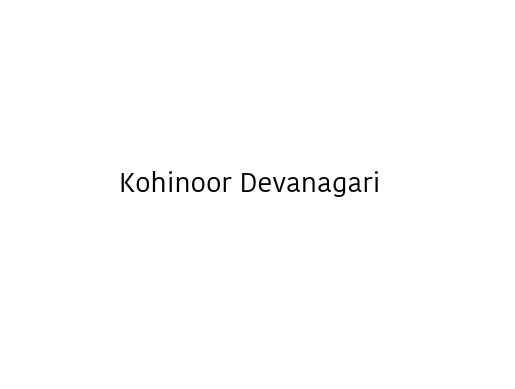

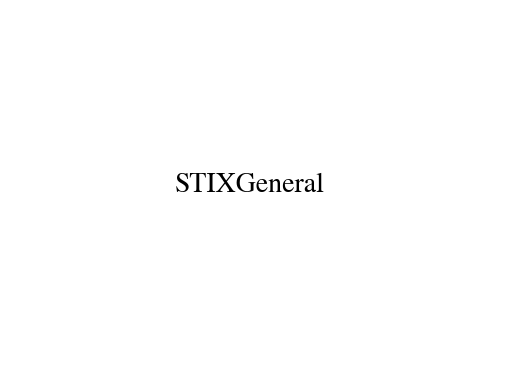

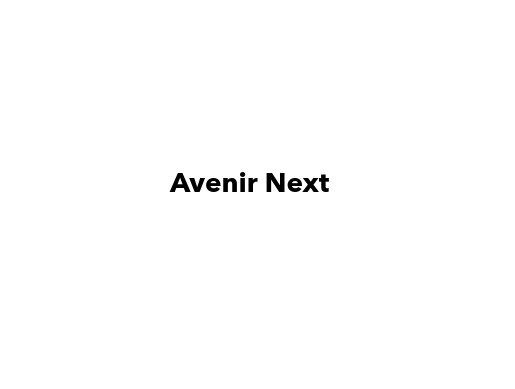

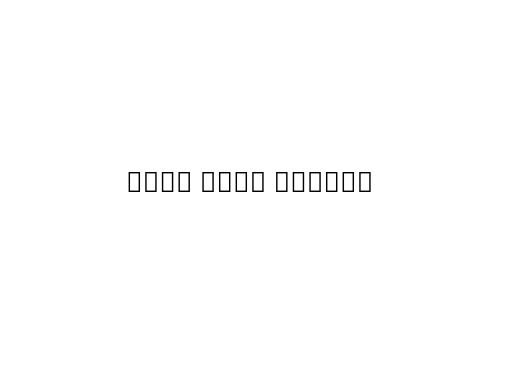

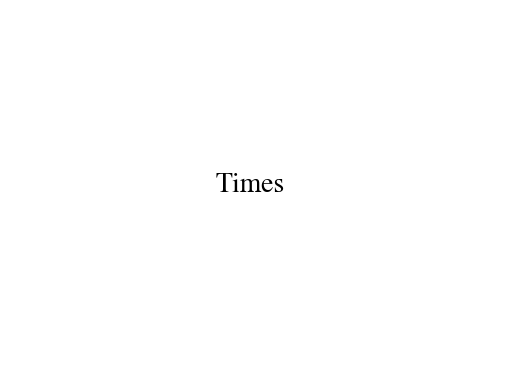

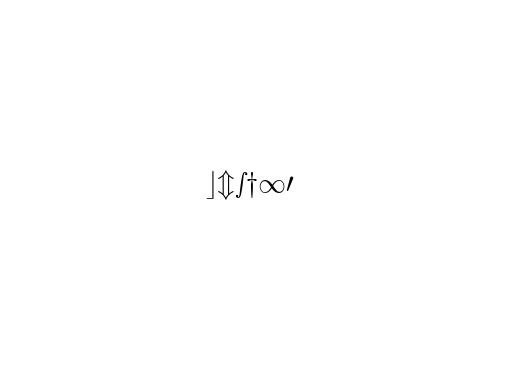

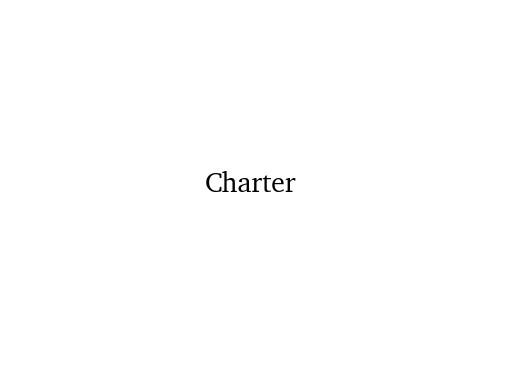

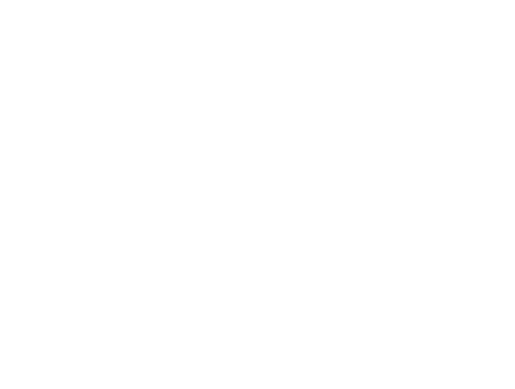

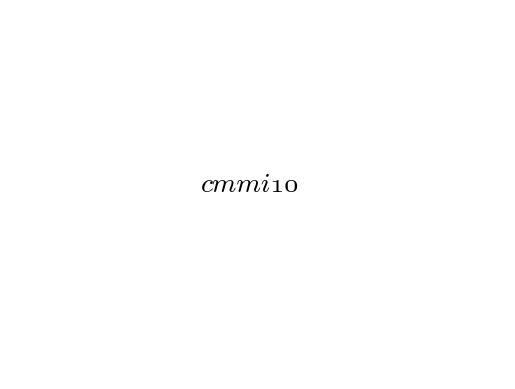

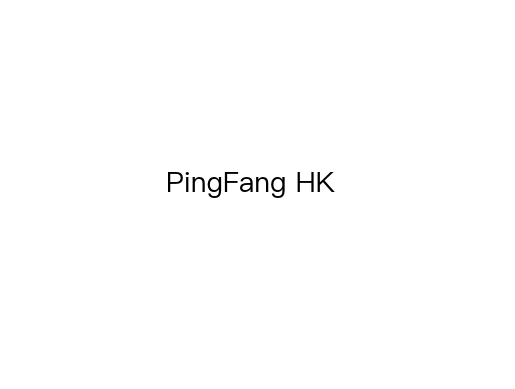

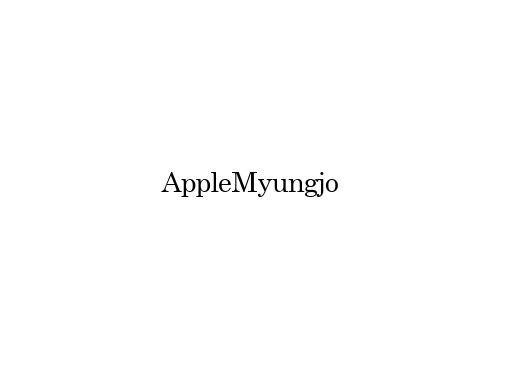

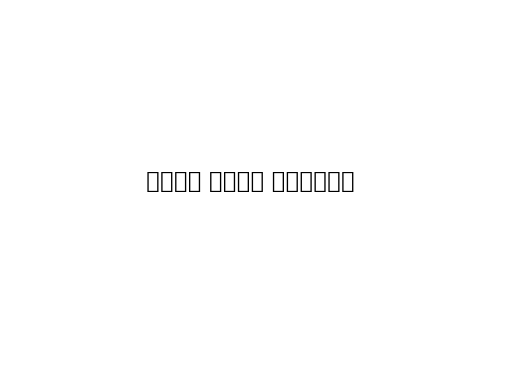

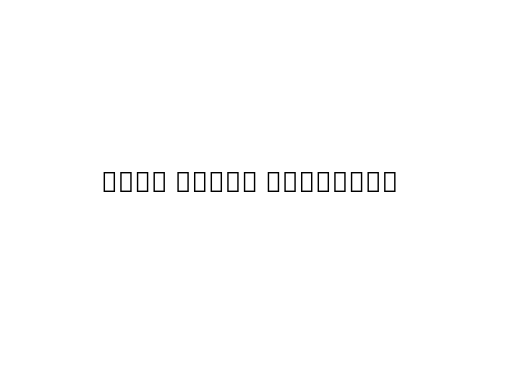

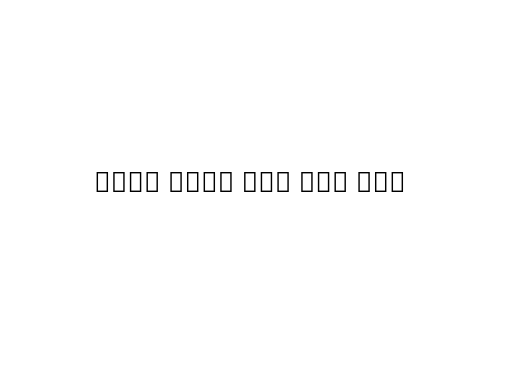

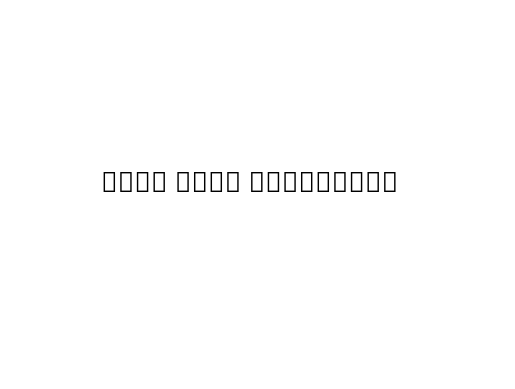

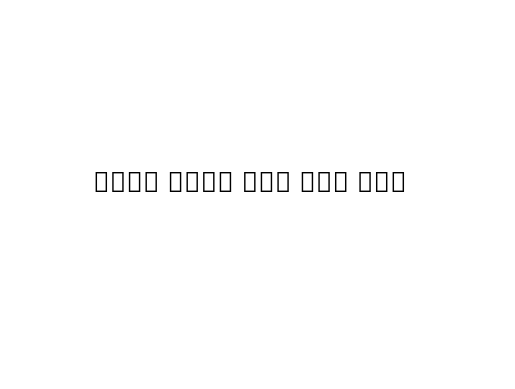

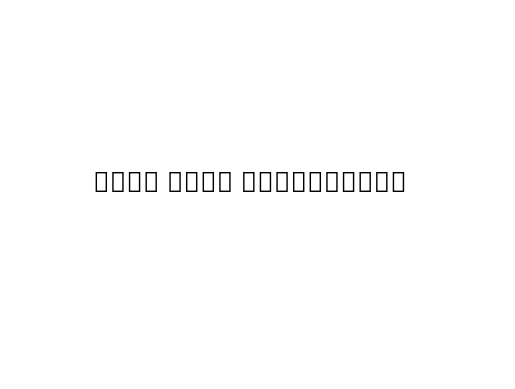

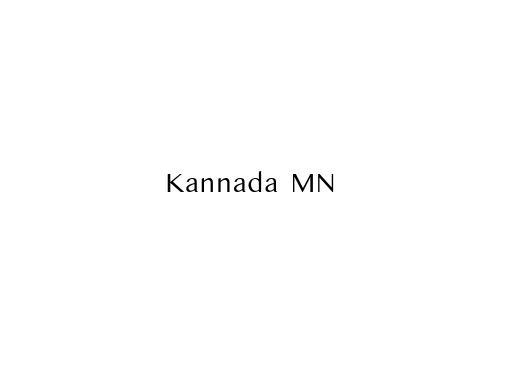

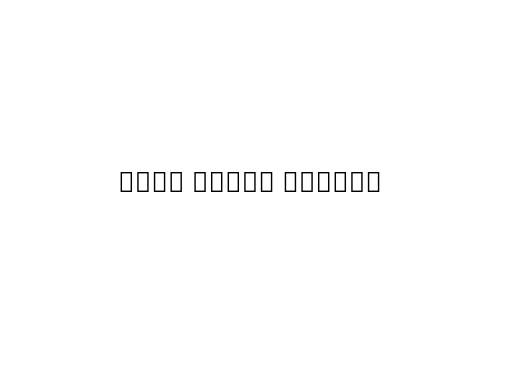

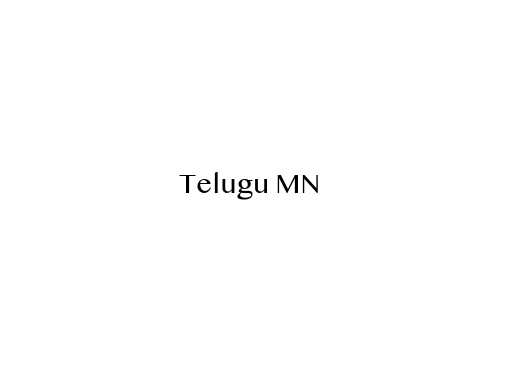

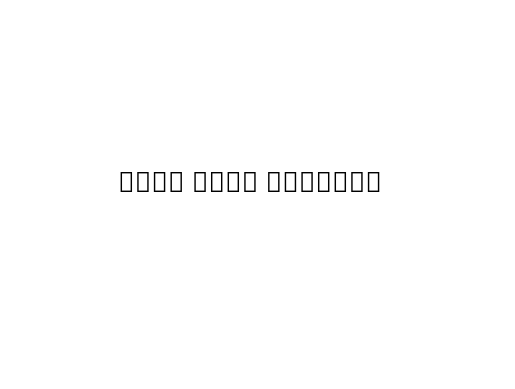

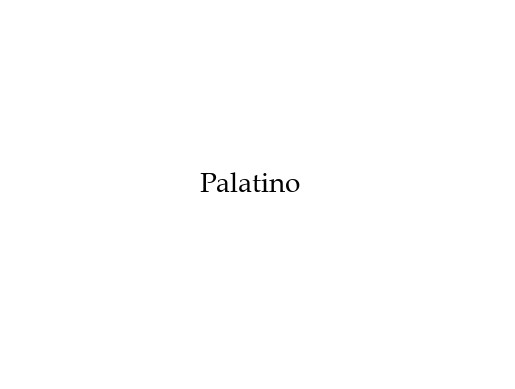

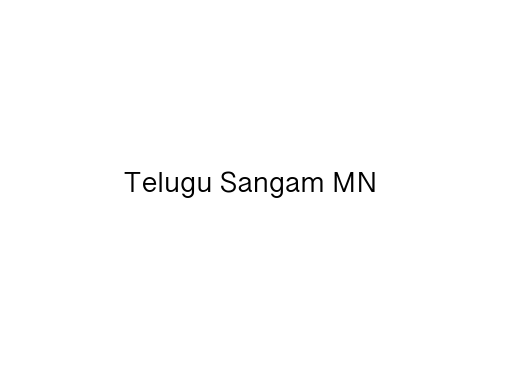

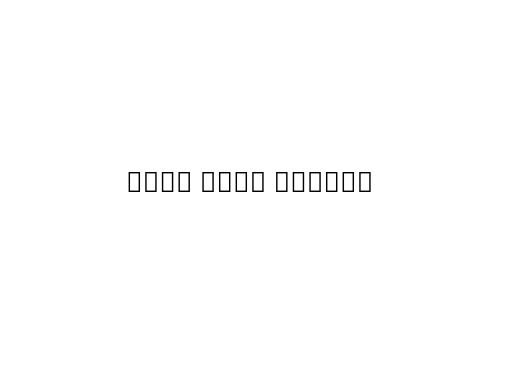

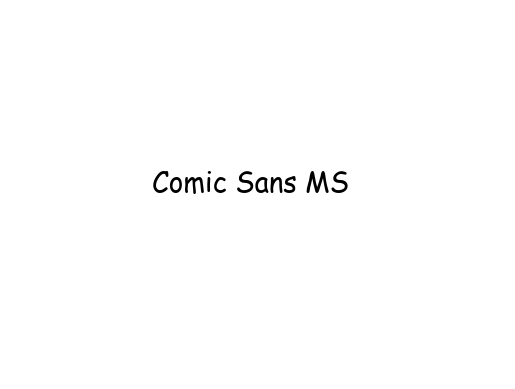

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120 (x) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


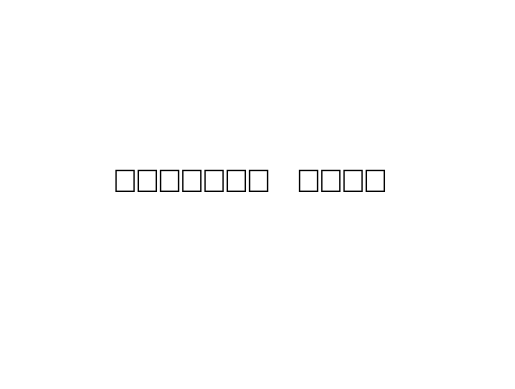

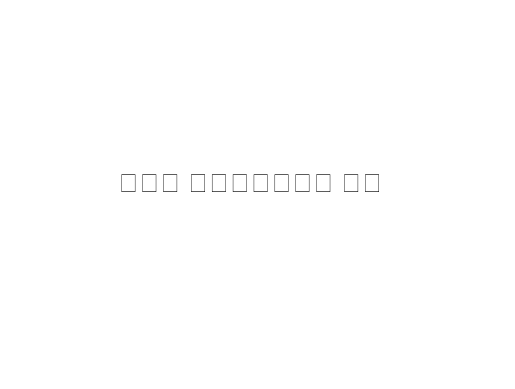

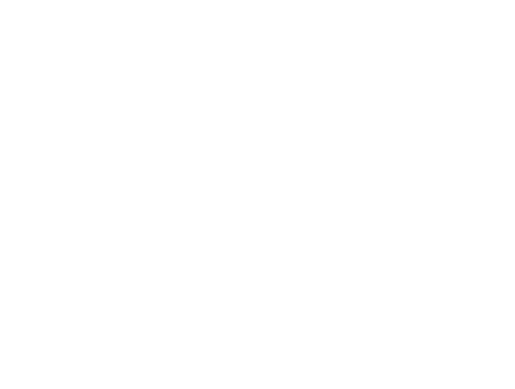

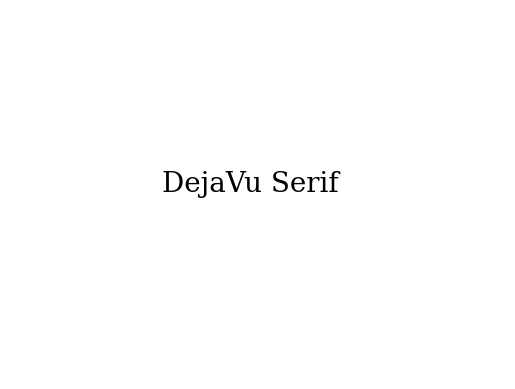

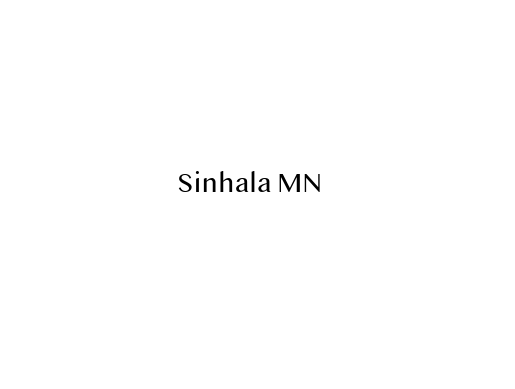

In [151]:
font_list = font_manager.get_font_names()
for f in font_list:
    plt.plot()
    plt.gcf().text(0.5, 0.5,
                   s = f,
                   size = 20,
                   ha = 'center',
                   fontname = f)
    plt.axis('off')
    plt.show()

In [152]:
savepy("get-fonts")

In [153]:
# DATES

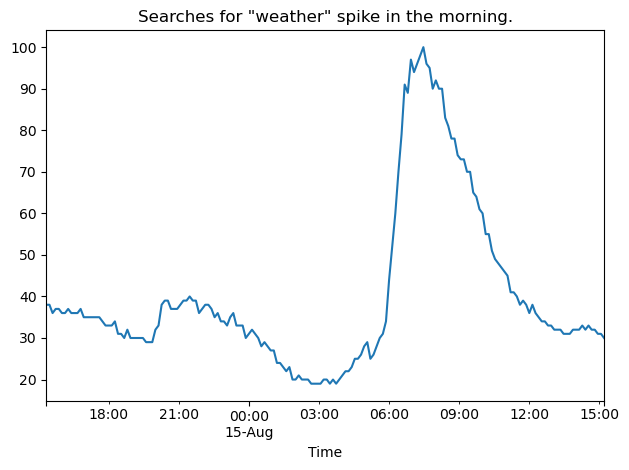

In [154]:
url = 'https://github.com/alexanderthclark/MPL-Data/raw/main/WeatherAug1415Trends.csv'
df = pd.read_csv(url, parse_dates = ['Time'])

fig, ax = plt.figure(), plt.axes()
df.set_index("Time").plot(ax = ax)
ax.set_title("Searches for \"weather\" spike in the morning.") 
ax.legend().set_visible(False)
#truncate
plt.tight_layout()
plt.savefig("pd-dates.pdf")
plt.show()

In [155]:
savepy("pd-dates")

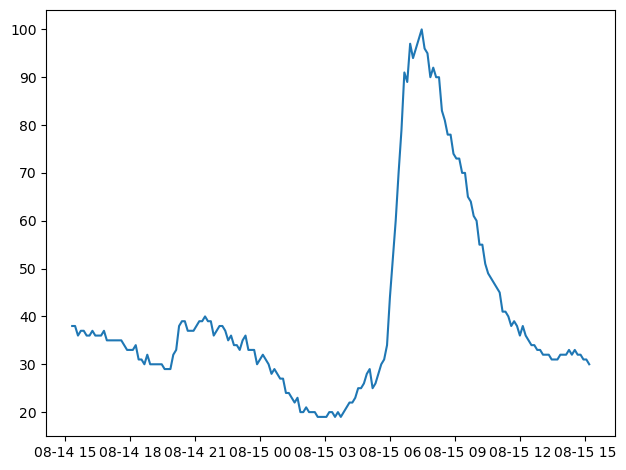

In [156]:
fig, ax = plt.figure(), plt.axes()
ax.plot(df.Time, df.weather)
#truncate
plt.tight_layout()
plt.savefig("ax-dates.pdf")
plt.show()

In [157]:
savepy('ax-dates')

Text(0.5, 1.0, 'Searches for "weather" spike in the morning.')

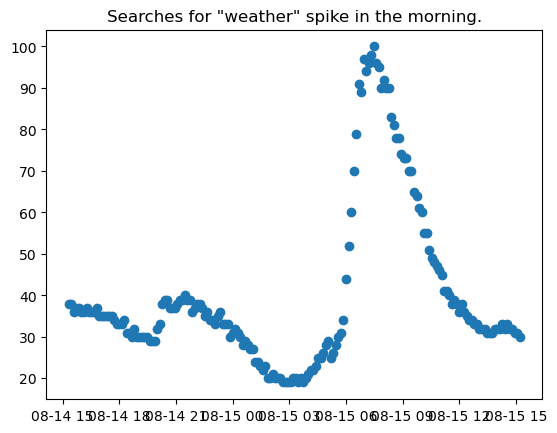

In [158]:
# Discouraged
url = 'https://github.com/alexanderthclark/MPL-Data/raw/main/WeatherAug1415Trends.csv'
df = pd.read_csv(url, parse_dates = ['Time'])

fig, ax = plt.figure(), plt.axes()

ax.plot_date(df.Time, df.weather)
ax.set_title("Searches for \"weather\" spike in the morning.") 

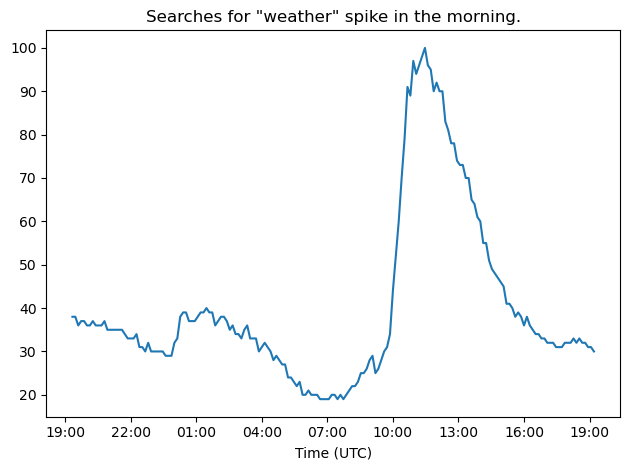

In [159]:
fig, ax = plt.figure(), plt.axes()
xformatter = mdates.DateFormatter('%H:%M')
ax.plot(df.Time, df.weather)
ax.set_title("Searches for \"weather\" spike in the morning.")
ax.set_xlabel("Time (UTC)")
ax.xaxis.set_major_formatter(xformatter)
#truncate
plt.tight_layout()
plt.savefig("date-fmt.pdf")
plt.show()

In [160]:
savepy('date-fmt')

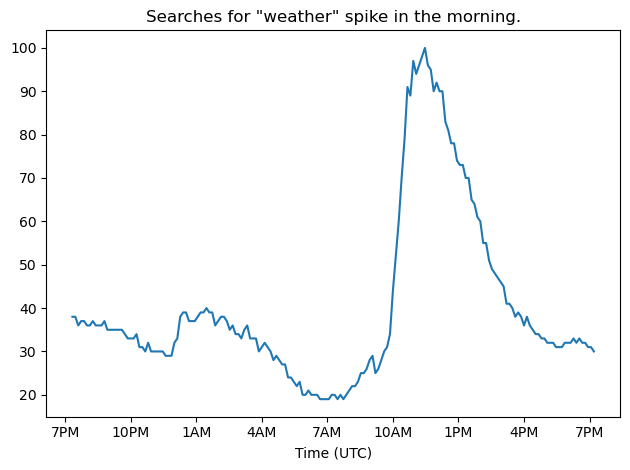

In [161]:
fig, ax = plt.figure(), plt.axes()
xformatter = mdates.DateFormatter('%-I%p')
ax.plot(df.Time, df.weather)
ax.set_title("Searches for \"weather\" spike in the morning.")
ax.set_xlabel("Time (UTC)")
ax.xaxis.set_major_formatter(xformatter)
#truncate
plt.tight_layout()
plt.savefig("date-fmt2.pdf")
plt.show()

In [162]:
savepy('date-fmt2')

In [163]:
# COLORS chapter

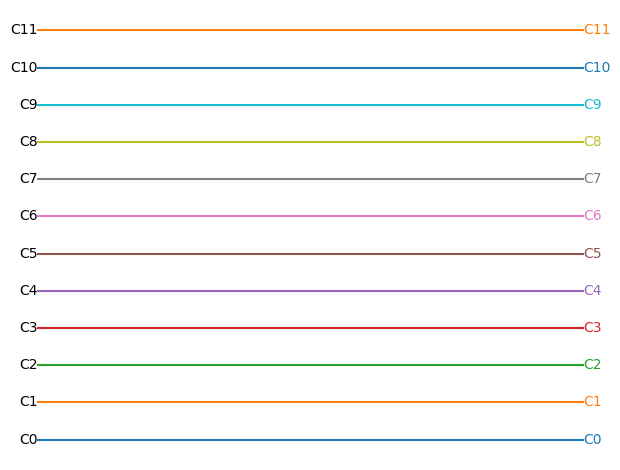

In [164]:
fig, ax = plt.figure(), plt.axes()
for i in range(12):
    # Plot color automatically cycles through color map
    ax.plot([0,1], np.ones(2)*i)
    
    # Text with default color on the left
    ax.text(0, i, 'C' + str(i), 
    va = 'center', ha = 'right')
    
    # Text with variable color on the right
    ax.text(1, i, 'C' + str(i), 
    va = 'center', ha = 'left',
    color = 'C'+str(i))
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("colors.pdf")
plt.show()

In [165]:
savepy('colors')

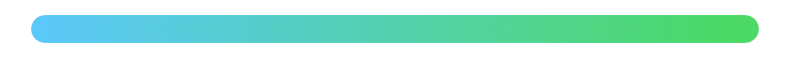

In [166]:
# Set Colors
green = 76, 217, 100
green = np.array(green)/255
blue = 90, 200, 250
blue = np.array(blue)/255

# How many color changes
segments = 100
interval_starts = np.linspace(0, 1, segments)

fig, ax = plt.subplots(figsize = (8,8))

colors = dict()
for i in range(3):
    colors[i] = np.linspace(blue[i], green[i], segments)
    
for i in range(segments-1):
    rgb = colors[0][i], colors[1][i], colors[2][i]
    x = interval_starts[i], interval_starts[i+1]
    y = (0.5, 0.5)
    ax.plot(x, y, color = rgb,
            linewidth = 20, 
            solid_capstyle = 'round')

ax.set_aspect('equal')
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("gradient.pdf")
plt.show()

In [167]:
savepy('gradient')

In [ ]:
# Set Colors
blue = mpl.colors.ColorConverter().to_rgb('C0')
orange = mpl.colors.ColorConverter().to_rgb('C1')

n_colors = 10
color_strings = dict()
for i in range(n_colors):
    color_strings[i] = 'C'+str(i)
segments = 1000 # How many color changes

fig, ax = plt.subplots(figsize = (14,8))

for c in range(n_colors - 1):
    color1 = mpl.colors.ColorConverter().to_rgb(color_strings[c])
    color2 = mpl.colors.ColorConverter().to_rgb(color_strings[c+1])
    
    interval_starts = np.linspace(c, c+1, segments)
    colors = dict()
    for i in range(3):
        colors[i] = np.linspace(color1[i], color2[i], segments)

    for i in range(segments-1):

        rgb = colors[0][i], colors[1][i], colors[2][i]

        x = interval_starts[i], interval_starts[i+1]
        y = [0.3,0.5]

        ax.plot(x, y,
                color = rgb,
                linewidth = 20, 
                solid_capstyle = 'round')
    
    ax.text(c, .51,
            s = 'C'+str(c),
            va = 'bottom',
            size = 12,
            ha = 'center')
        
ax.text(9, .51,
        s = 'C9',
        va = 'bottom',
        size = 12,
        ha = 'center')

ax.set_aspect('equal')
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("color-map.pdf")
plt.show()

In [ ]:
savepy("color-map")

In [ ]:
light_gray = [.98]*3
fig = plt.figure(figsize = (6,6),
                 facecolor = light_gray)
ax = plt.axes(projection='3d',
              facecolor = light_gray)

# control how many cubes/color changes
pieces = 10 
grid = np.linspace(0, 1, pieces)[:-1]
width = grid[1] - grid[0]

# Make smaller cube units
for x in grid:
    for y in grid:
        for z in grid:
            vertices = list()
            for prod in product([x,x+width],[y,y+width], [z,z+width]):
                vertices.append(list(prod))

            faces = list()
            for key, face in enumerate([x,y,z]):
                # face is 0
                helper0 = [x for x in vertices if x[key] == face]
                helper1 = [x for x in vertices if x[key] == face + width]
                helper0.sort()
                helper0 = helper0[0:2] + helper0[::-1][0:2]
                helper1.sort()
                helper1 = helper1[0:2] + helper1[::-1][0:2]
                faces.append((helper0))
                faces.append(helper1)

            facecolor = (x + width / 2,
                         y + width / 2,
                         z + width / 2)
            pc = Poly3DCollection(faces,
                                  facecolor = facecolor,
                                  edgecolor = 'black')
            ax.add_collection3d(pc) 

# Label Axes
ax.set_xlabel("Red")
ax.set_ylabel('Green')
ax.set_zlabel("Blue")

# Set Ticks
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([0,1])
# Change padding
ax.xaxis.set_tick_params(pad = 0.1)
ax.yaxis.set_tick_params(pad = 0.1)
ax.zaxis.set_tick_params(pad = 0.1)
# Change azimuth
angle = 45 # + 180 # for second cube
ax.view_init(elev = None, azim = angle)
# Zoom out so labels are not cut off
ax.set_box_aspect([1,1,1], zoom = 0.86)
#truncate
plt.tight_layout()
plt.savefig("color-cube.pdf")
plt.show()

In [ ]:
savepy('color-cube')

In [ ]:
light_gray = [.98]*3
fig = plt.figure(figsize = (6,6),
                 facecolor = light_gray)
ax = plt.axes(projection='3d',
              facecolor = light_gray)

# control how many cubes/color changes
pieces = 10 
grid = np.linspace(0, 1, pieces)[:-1]
width = grid[1] - grid[0]

# Make smaller cube units
for x in grid:
    for y in grid:
        for z in grid:
            vertices = list()
            for prod in product([x,x+width],[y,y+width], [z,z+width]):
                vertices.append(list(prod))

            faces = list()
            for key, face in enumerate([x,y,z]):
                # face is 0
                helper0 = [x for x in vertices if x[key] == face]
                helper1 = [x for x in vertices if x[key] == face + width]
                helper0.sort()
                helper0 = helper0[0:2] + helper0[::-1][0:2]
                helper1.sort()
                helper1 = helper1[0:2] + helper1[::-1][0:2]
                faces.append((helper0))
                faces.append(helper1)

            facecolor = (x + width / 2,
                         y + width / 2,
                         z + width / 2)
            pc = Poly3DCollection(faces,
                                  facecolor = facecolor,
                                  edgecolor = 'black')
            ax.add_collection3d(pc) 

# Label Axes
ax.set_xlabel("Red")
ax.set_ylabel('Green')
ax.set_zlabel("Blue")

# Set Ticks
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([0,1])
# Change padding
ax.xaxis.set_tick_params(pad = 0.1)
ax.yaxis.set_tick_params(pad = 0.1)
ax.zaxis.set_tick_params(pad = 0.1)
# Change azimuth
angle = 45 + 180 # for second cube
ax.view_init(elev = None, azim = angle)
# Zoom out so labels are not cut off
ax.set_box_aspect([1,1,1], zoom = 0.86)
#truncate
plt.tight_layout()
plt.savefig("color-cube-back.pdf")
plt.show()

In [ ]:
#savepy('color-cube-back')